In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from utils import save_fig_for_raport, dataframe_to_latex_tabular 
from pandas.plotting import autocorrelation_plot
import pandas.plotting
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
raw_data = pd.read_csv('../datasets/raw/market_insights_overview_all_2022_04_26_filtered.csv', parse_dates=["date"])

# Filter away early 2018 data as it seems to contain errors
raw_data =raw_data .loc[raw_data ['date'] > '2018-12-01']

In [5]:
categories = pd.read_csv("../datasets/raw/solr_categories_all_2022_02_14.csv")
# Join market_insight table with category names
category_names = categories[[ "internal_doc_id", "title"]]
category_id_to_names_map = dict(map(lambda x: (x["internal_doc_id"], x["title"]), category_names.to_dict("records")))
category_name_to_id_map = dict(map(lambda x: (x["title"], x["internal_doc_id"]), category_names.to_dict("records")))

In [6]:

data_grouped = raw_data.groupby(['cat_id', "date"], as_index=False).sum()
data_grouped["date"] = pd.to_datetime(data_grouped["date"])
data_grouped["interest"] = data_grouped["hits"] + data_grouped["clicks"]

# Join with category names
data_grouped = pd.merge(data_grouped , category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
data_grouped.rename(columns={"title": "cat_name"}, inplace=True)
data_grouped.drop(columns=["internal_doc_id"], inplace=True, axis=1)

data_chosen_categories = data_grouped[["interest", "date", "cat_id", "cat_name"]]
data = data_chosen_categories

In [7]:
# Fill in all missing days
#data_grouped_filled_dates = data_chosen_categories.groupby(pd.Grouper(key="date", freq='D')).sum()

#data = data_grouped_filled_dates
#data.head()

In [8]:
# Pivot table by cat_id
data_by_cat_id = data.pivot(index=["date"], columns=["cat_id", "cat_name"])["interest"]

In [9]:
corr_categories = [2, 6, 9, 10, 11, 13, 20]
non_corr_categories = [ 12532,
 11694,
 11716,
 11950,
 11195,
 11998,
 274,
 11407,
 46,
 11326,
 11335,
 12197,
 11693,
 11780,
 12502,
 11866,
 11400,
 12256,
 10320,
 10030,
 ]
seasonal_categories_cat_name =["Vinterjakke",
"Vintersko",
"Langrennski",
"Skisko",
"Varmeovn",
"Snøfreser",
"Snøskuffe",]

seasonal_categories = list(map(lambda x: category_name_to_id_map[x], seasonal_categories_cat_name))
seasonal_categories

[12322, 11428, 11850, 11852, 273, 11036, 11213]

# Lag plot

# Lag plot

----------


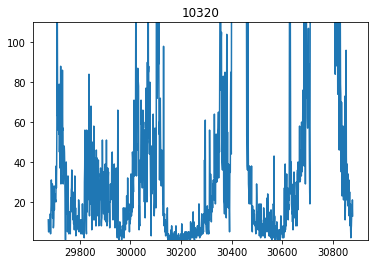

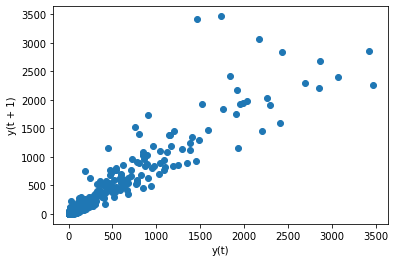

autocorr 0.9414593724401971
count    1205.000000
mean      134.969295
std       377.092505
min         1.000000
25%         8.000000
50%        22.000000
75%        55.000000
max      3469.000000
Name: interest, dtype: float64
----------


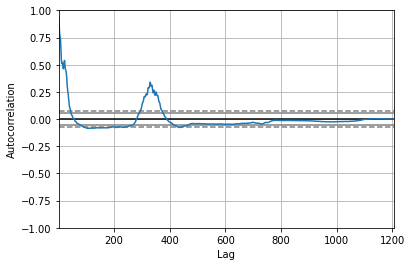

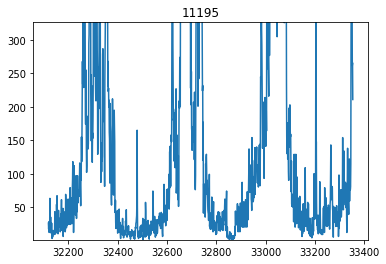

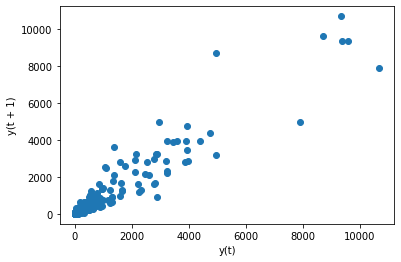

autocorr 0.9535753962484913
count     1236.000000
mean       257.661812
std        833.701241
min          1.000000
25%         23.000000
50%         53.000000
75%        163.250000
max      10677.000000
Name: interest, dtype: float64
----------


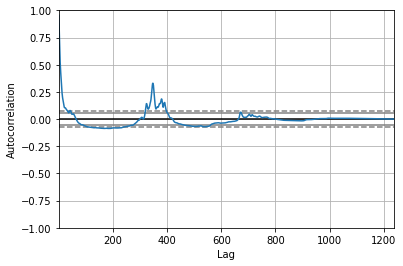

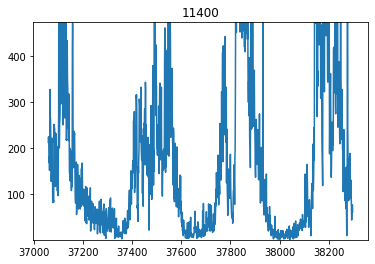

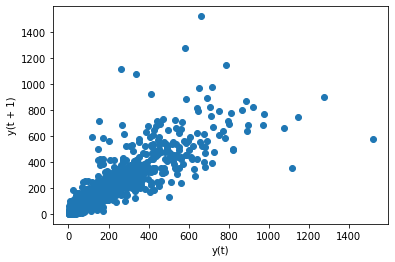

autocorr 0.857074641111908
count    1239.000000
mean      170.665052
std       189.033205
min         1.000000
25%        34.500000
50%       106.000000
75%       237.000000
max      1521.000000
Name: interest, dtype: float64


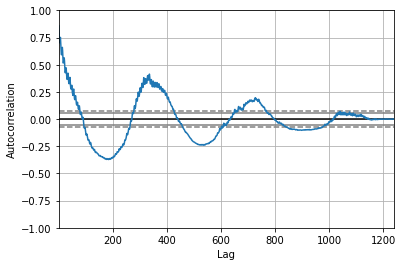

In [50]:

hard_list = [10320, 11195, 11400]
easy_list = [11780, 11716, 11694]
def show_series_info(list):
  for cat_id in list:
    print("----------")
    plt.show()
    filtered = data[data["cat_id"] == cat_id]["interest"]
    y_lim = ((filtered.describe()[6]))
    min_y = filtered.describe()[3]
    filtered.plot(title=cat_id).set_ylim(min_y, y_lim*2)
    plt.show()
    lag_plot(filtered)
    plt.show()
    print("autocorr", filtered.autocorr())
    print(filtered.describe())
    autocorrelation_plot(filtered)
show_series_info(hard_list)

----------


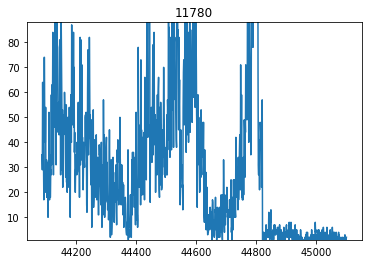

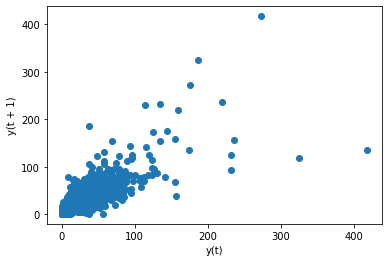

autocorr 0.7875147399199549
count    1017.000000
mean       30.639135
std        36.250367
min         1.000000
25%         4.000000
50%        21.000000
75%        44.000000
max       417.000000
Name: interest, dtype: float64
----------


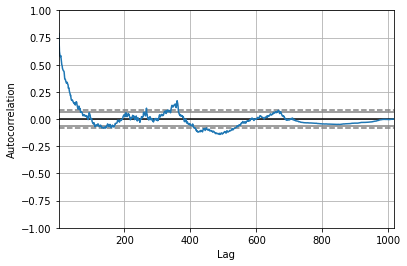

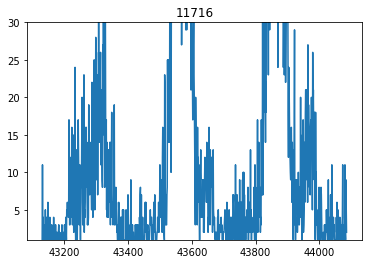

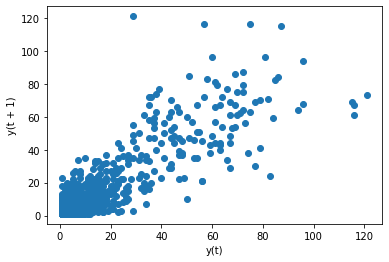

autocorr 0.8613041401597404
count    955.000000
mean      13.343455
std       19.482921
min        1.000000
25%        2.000000
50%        5.000000
75%       15.000000
max      121.000000
Name: interest, dtype: float64
----------


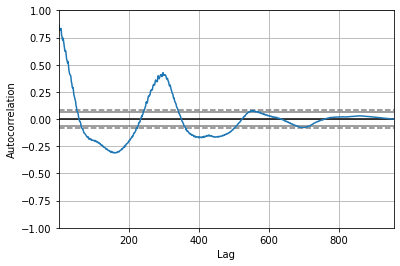

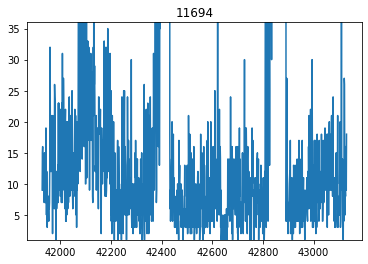

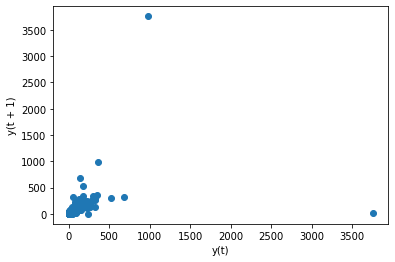

autocorr 0.3514891052819501
count    1203.000000
mean       27.433084
std       122.042665
min         1.000000
25%         6.000000
50%        10.000000
75%        18.000000
max      3756.000000
Name: interest, dtype: float64


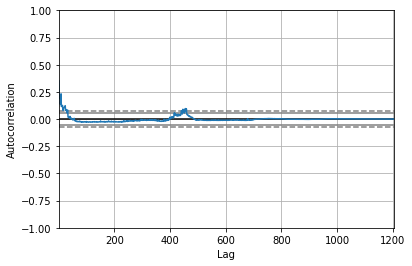

In [51]:
show_series_info(easy_list)

# Data set 1 lag plot

----------


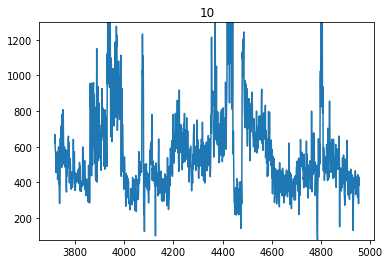

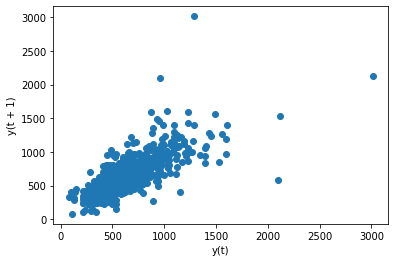

autocorr 0.7842971932656314
count    1239.000000
mean      561.418079
std       241.043751
min        78.000000
25%       404.500000
50%       508.000000
75%       649.000000
max      3015.000000
Name: interest, dtype: float64


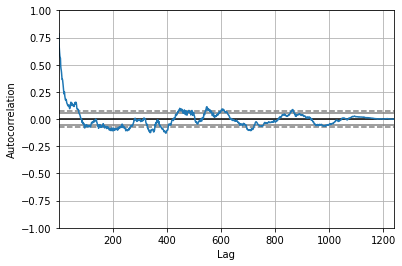

In [54]:
data_set_1_easy = [10,]
show_series_info(data_set_1_easy)

----------


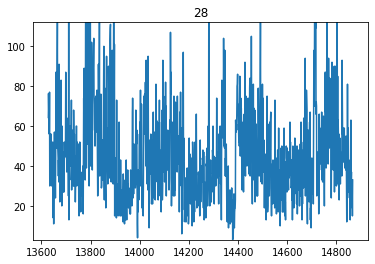

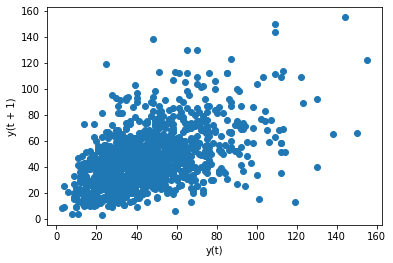

autocorr 0.5245606199320285
count    1239.000000
mean       44.808717
std        22.154175
min         3.000000
25%        29.000000
50%        41.000000
75%        56.000000
max       155.000000
Name: interest, dtype: float64
----------


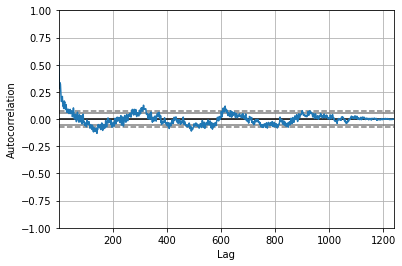

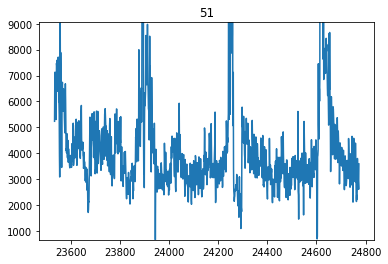

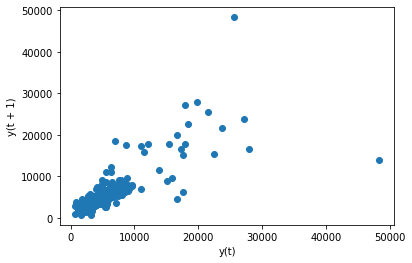

autocorr 0.8015299676654122
count     1239.000000
mean      4213.889427
std       2686.716213
min        650.000000
25%       3101.500000
50%       3666.000000
75%       4527.000000
max      48323.000000
Name: interest, dtype: float64
----------


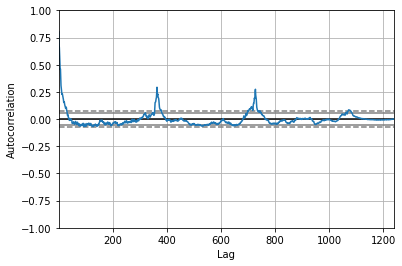

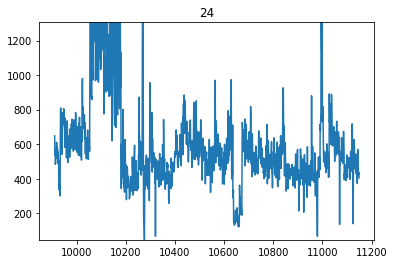

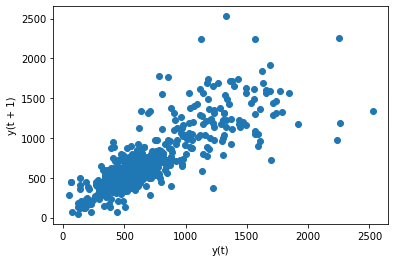

autocorr 0.8365466711579308
count    1239.000000
mean      598.046005
std       289.120214
min        47.000000
25%       440.500000
50%       532.000000
75%       652.500000
max      2529.000000
Name: interest, dtype: float64
----------


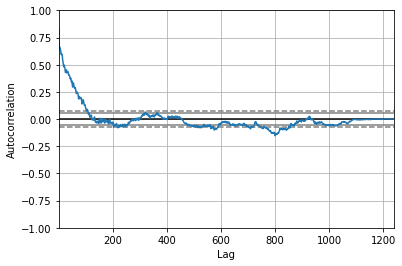

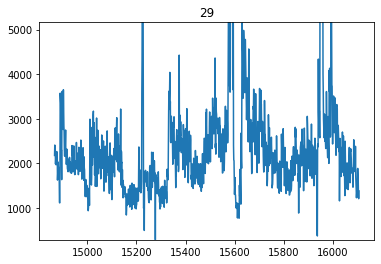

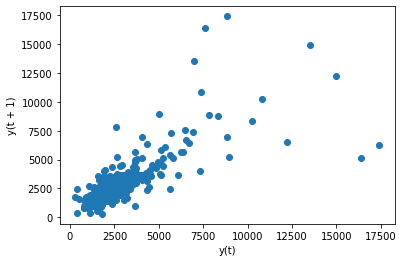

autocorr 0.795687680129101
count     1239.000000
mean      2303.111380
std       1297.629814
min        286.000000
25%       1685.000000
50%       2090.000000
75%       2581.500000
max      17418.000000
Name: interest, dtype: float64


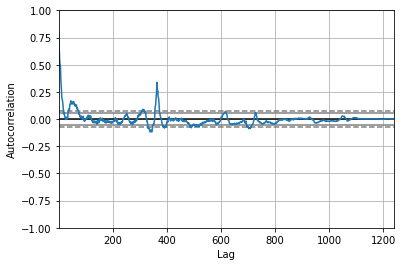

In [57]:
# HARd
data_set_1_hard = [28,51, 24, 29]
show_series_info(data_set_1_hard)

In [61]:
# Autotocorr vs mase
dataset_2_list = [12532,11694,11716,11950,11195,11998,274,11407,46,11326,11335,12197,
11693,
11780,
12502,
11866,
11400,
12256,
10320,
10030,
]
dataset_1_list = [
2,
6,
9,
10,
11,
13,
20,
22,
24,
26,
27,
28,
29,
32,
33,
34,
39,
41,
51,
54,
]

autocorrs = []
for cat_id in dataset_2_list:
  filtered = data[data["cat_id"] == cat_id]["interest"]

  autocorrs.append(filtered.autocorr())
autocorrs

autocorrs_dataset_1 = []
for cat_id in dataset_1_list:
  filtered = data[data["cat_id"] == cat_id]["interest"]
  autocorrs_dataset_1.append(filtered.autocorr())
autocorrs_dataset_1

[0.8302171357334407,
 0.8279863026121763,
 0.7430497141167107,
 0.7842971932656314,
 0.6037792085609635,
 0.7812766254465497,
 0.702489598649496,
 0.7787576470397074,
 0.8365466711579308,
 0.6842186198877358,
 0.7693482941295122,
 0.5245606199320285,
 0.795687680129101,
 0.8226302249866108,
 0.7735078308628796,
 0.7215752146160337,
 0.794503887755497,
 0.7020476590115092,
 0.8015299676654122,
 0.7981646694027662]

/tmp/ipykernel_13751/1160527005.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))


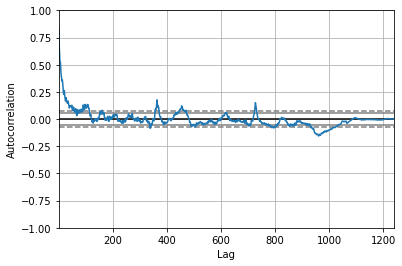

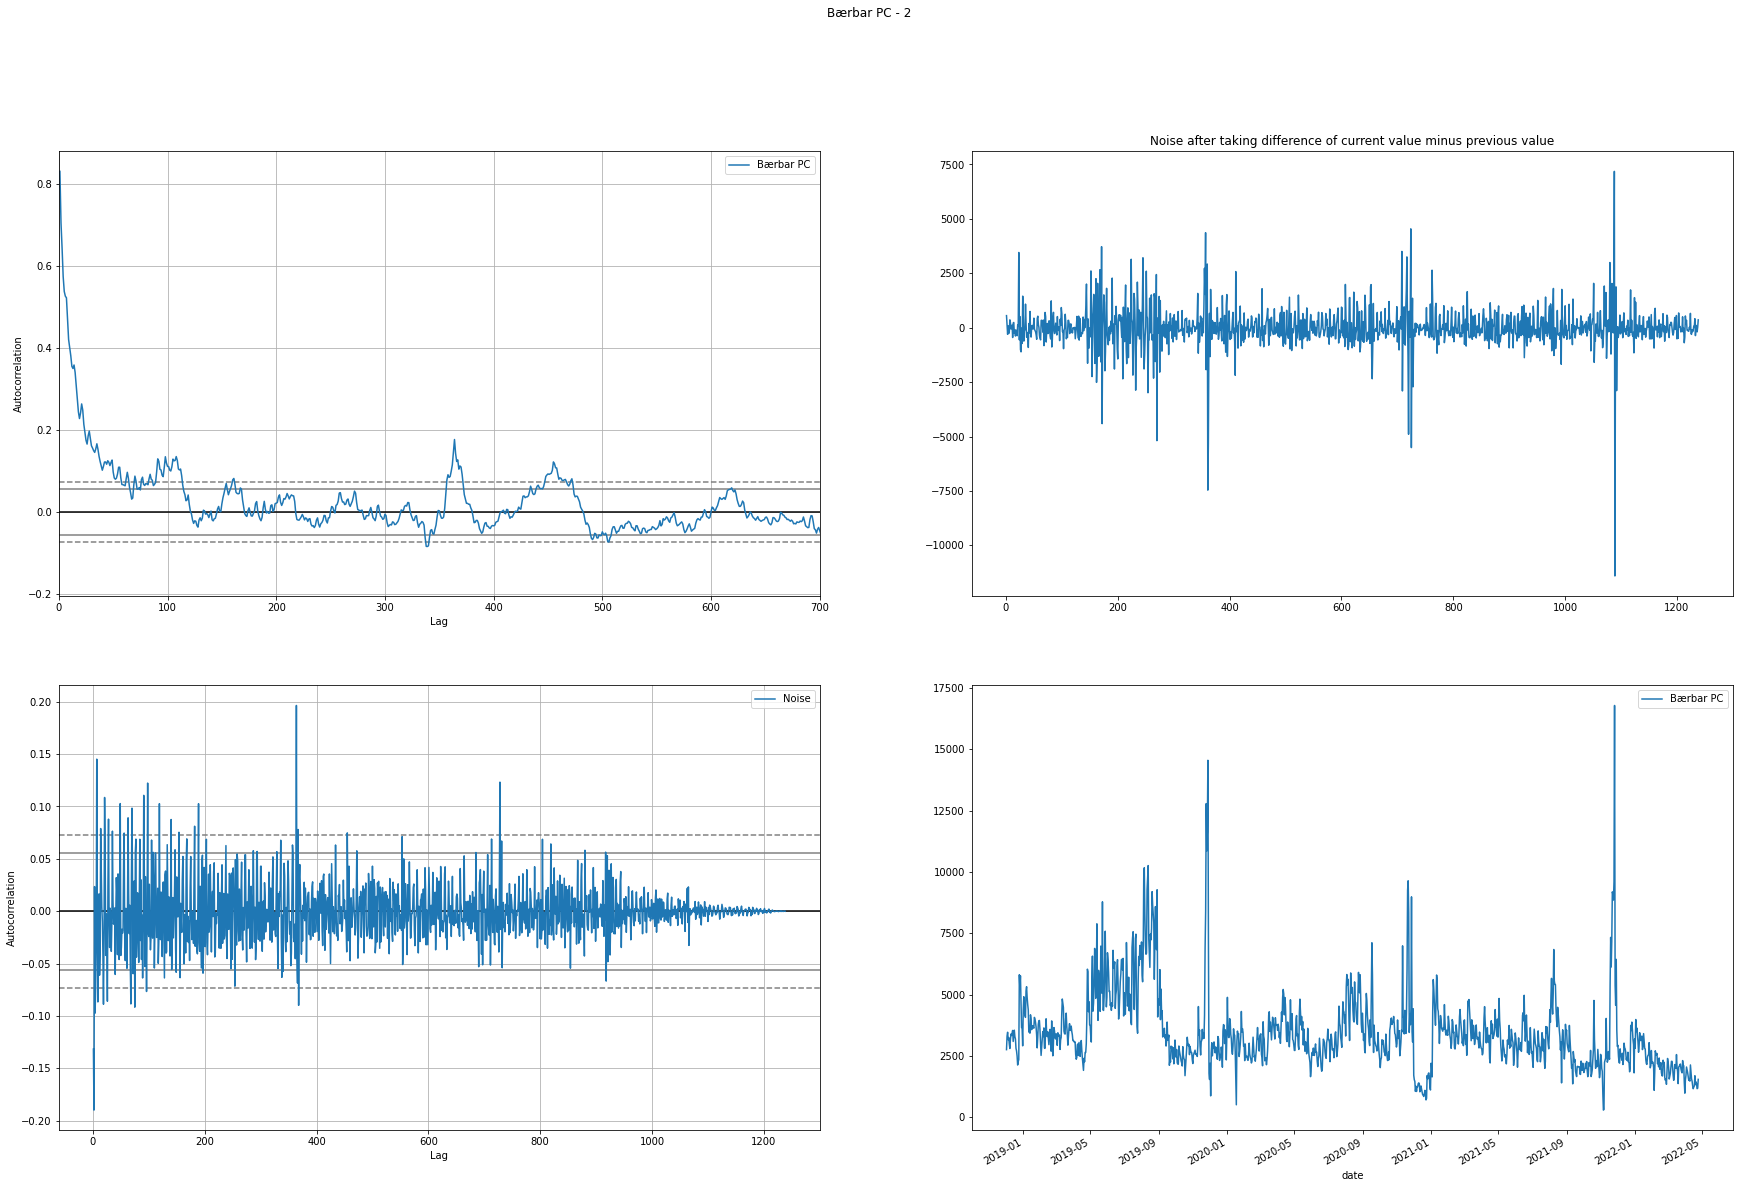

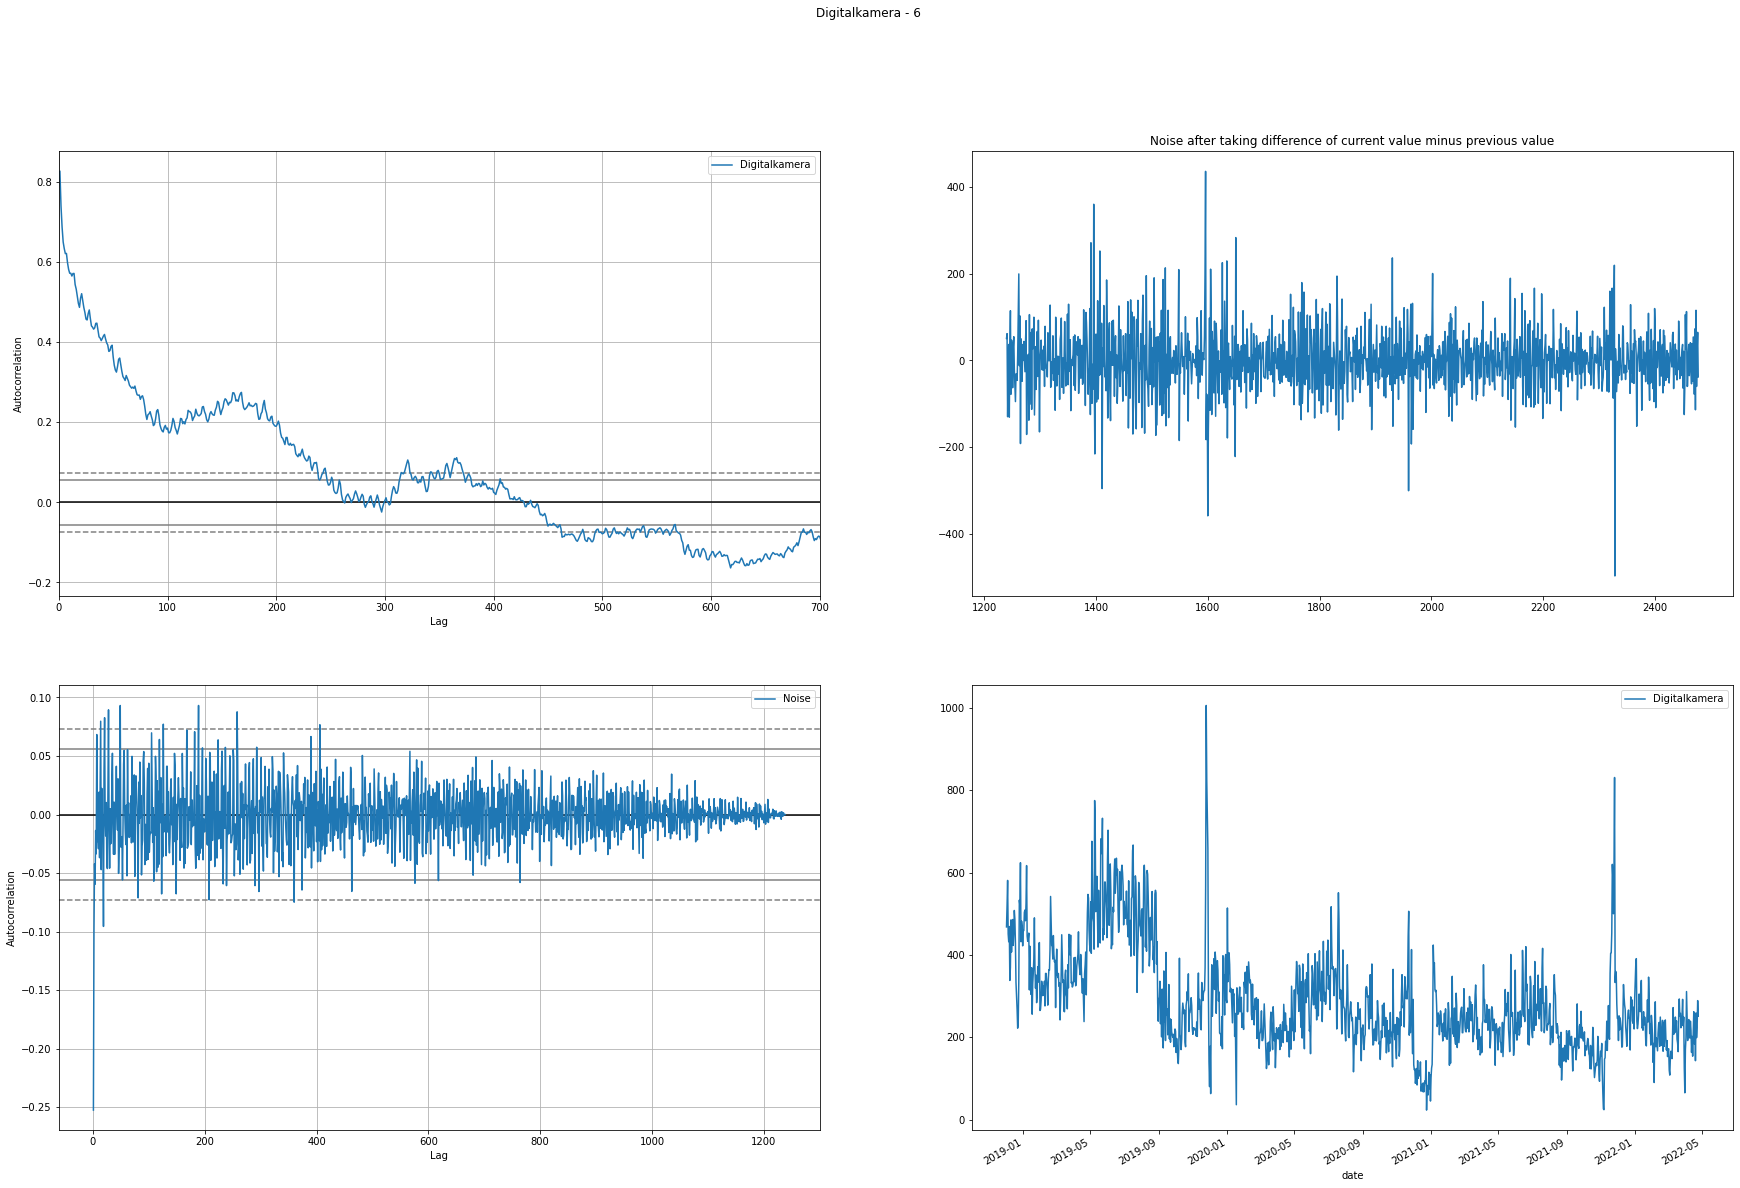

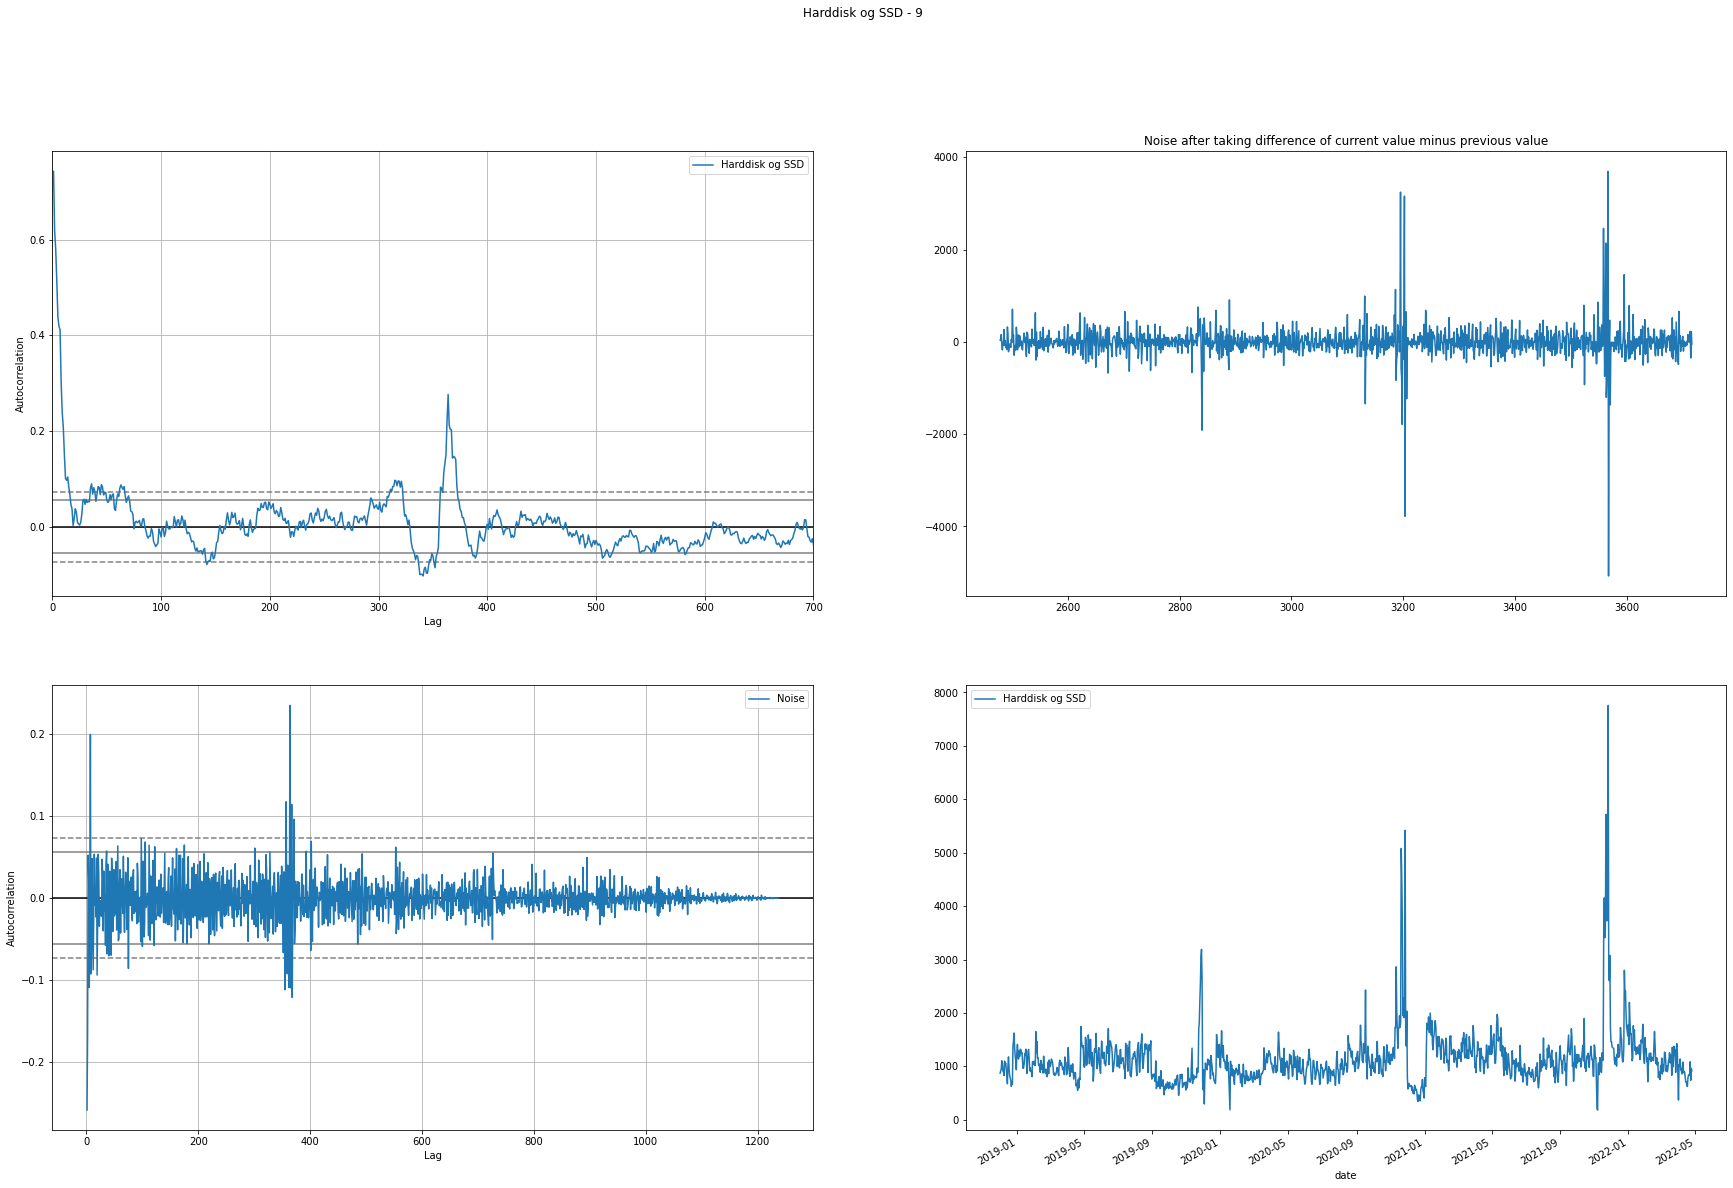

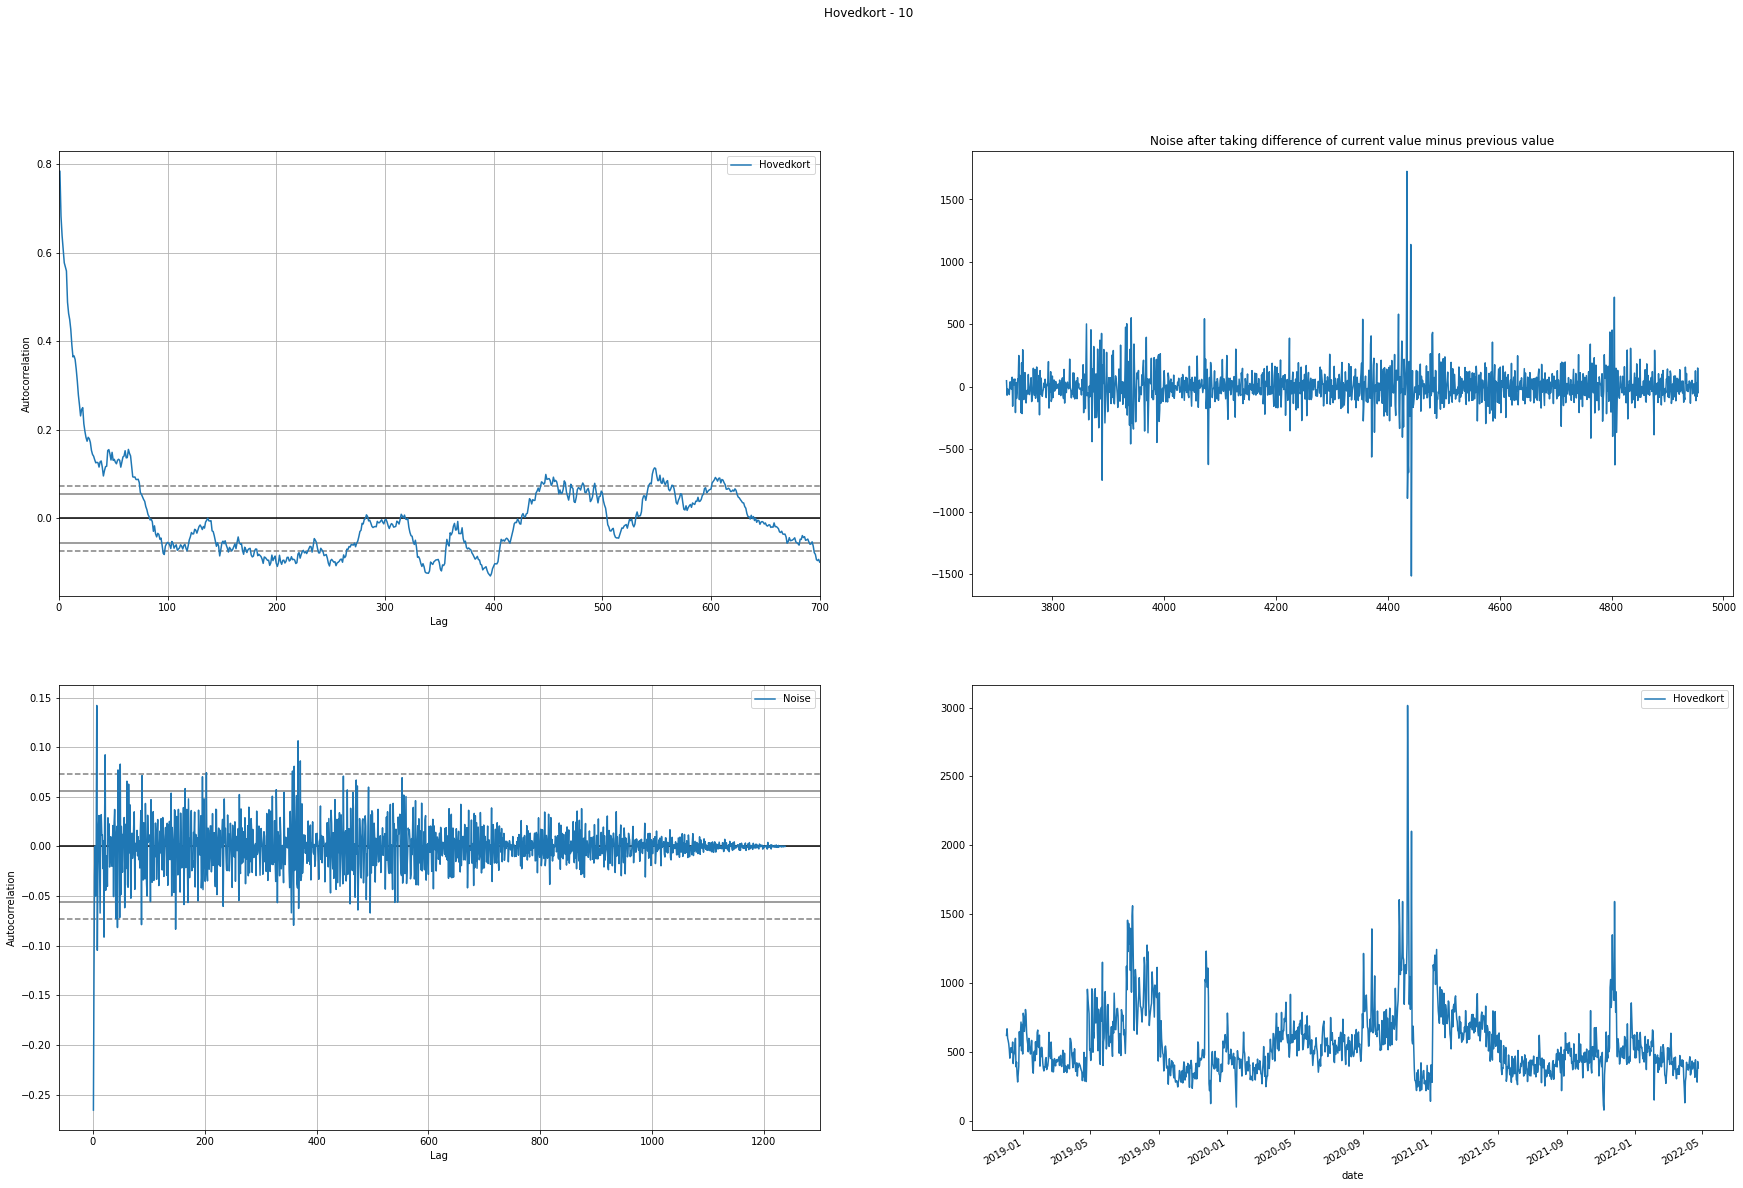

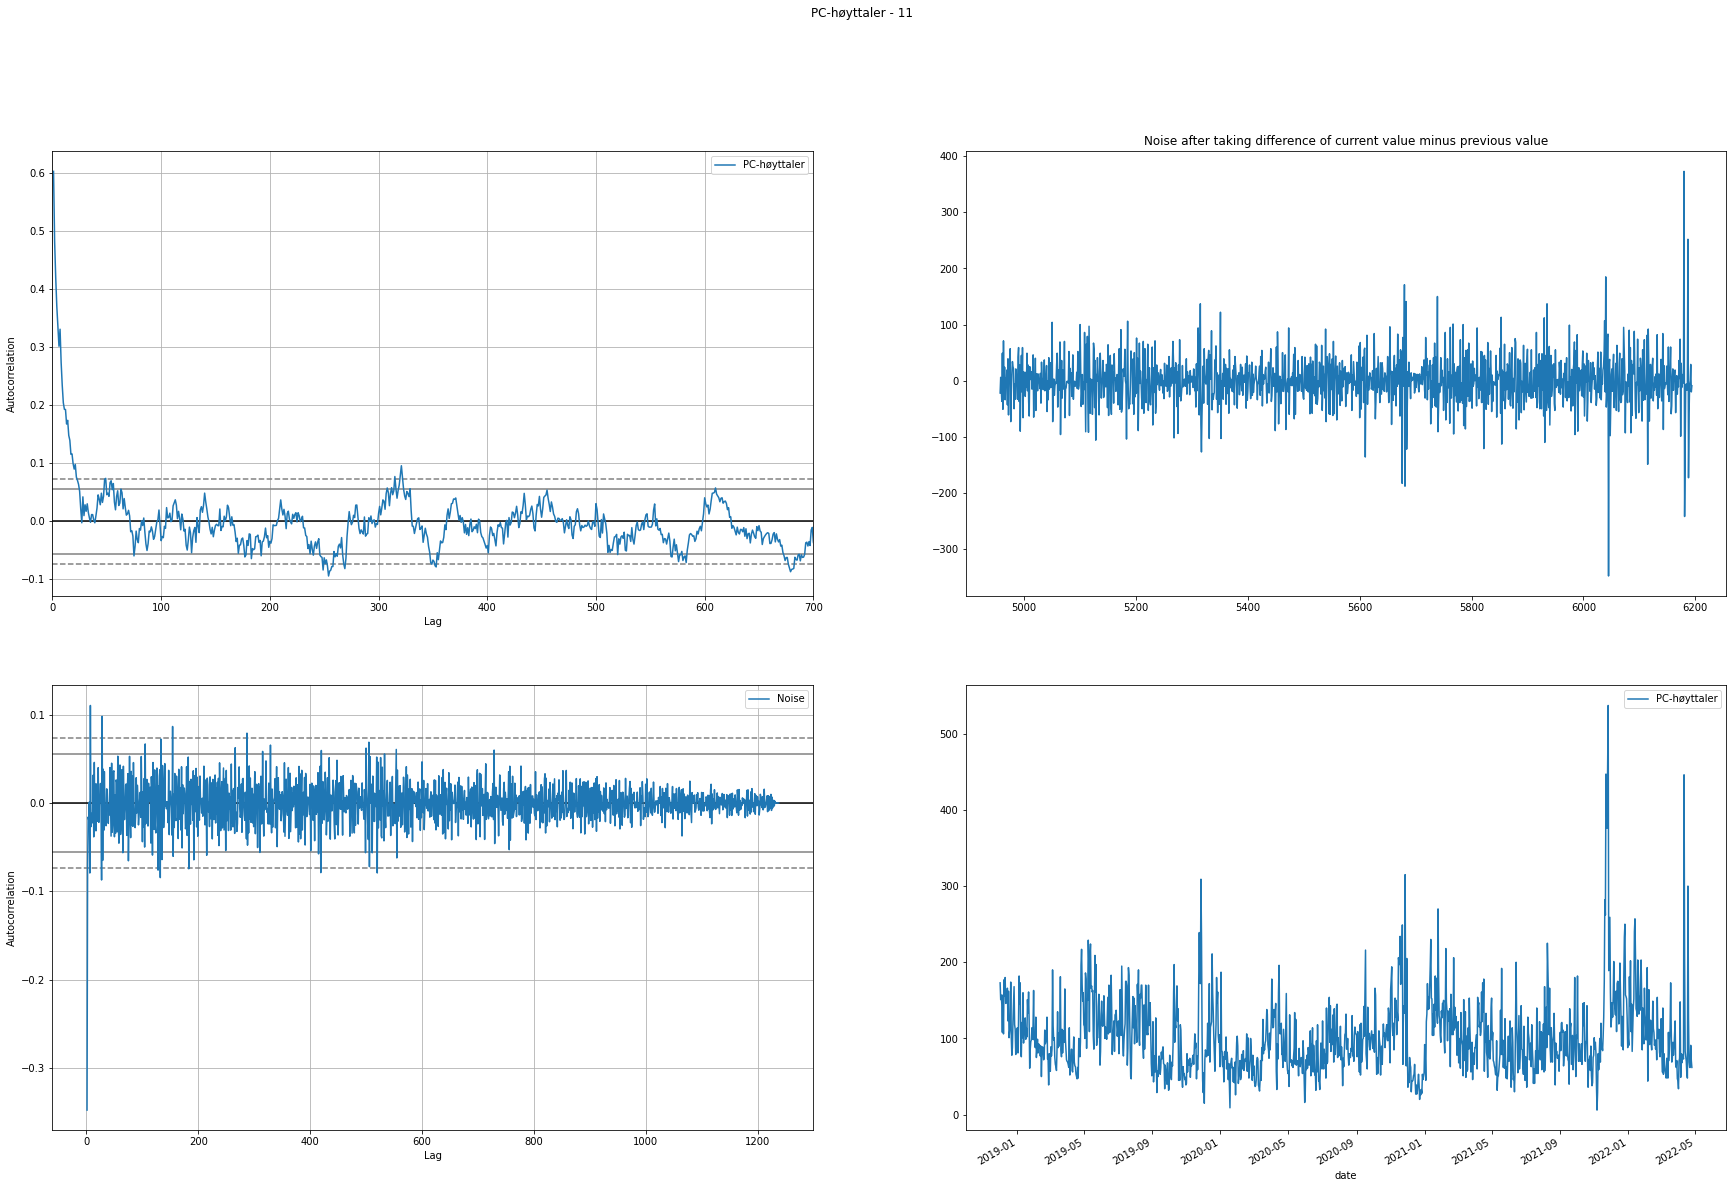

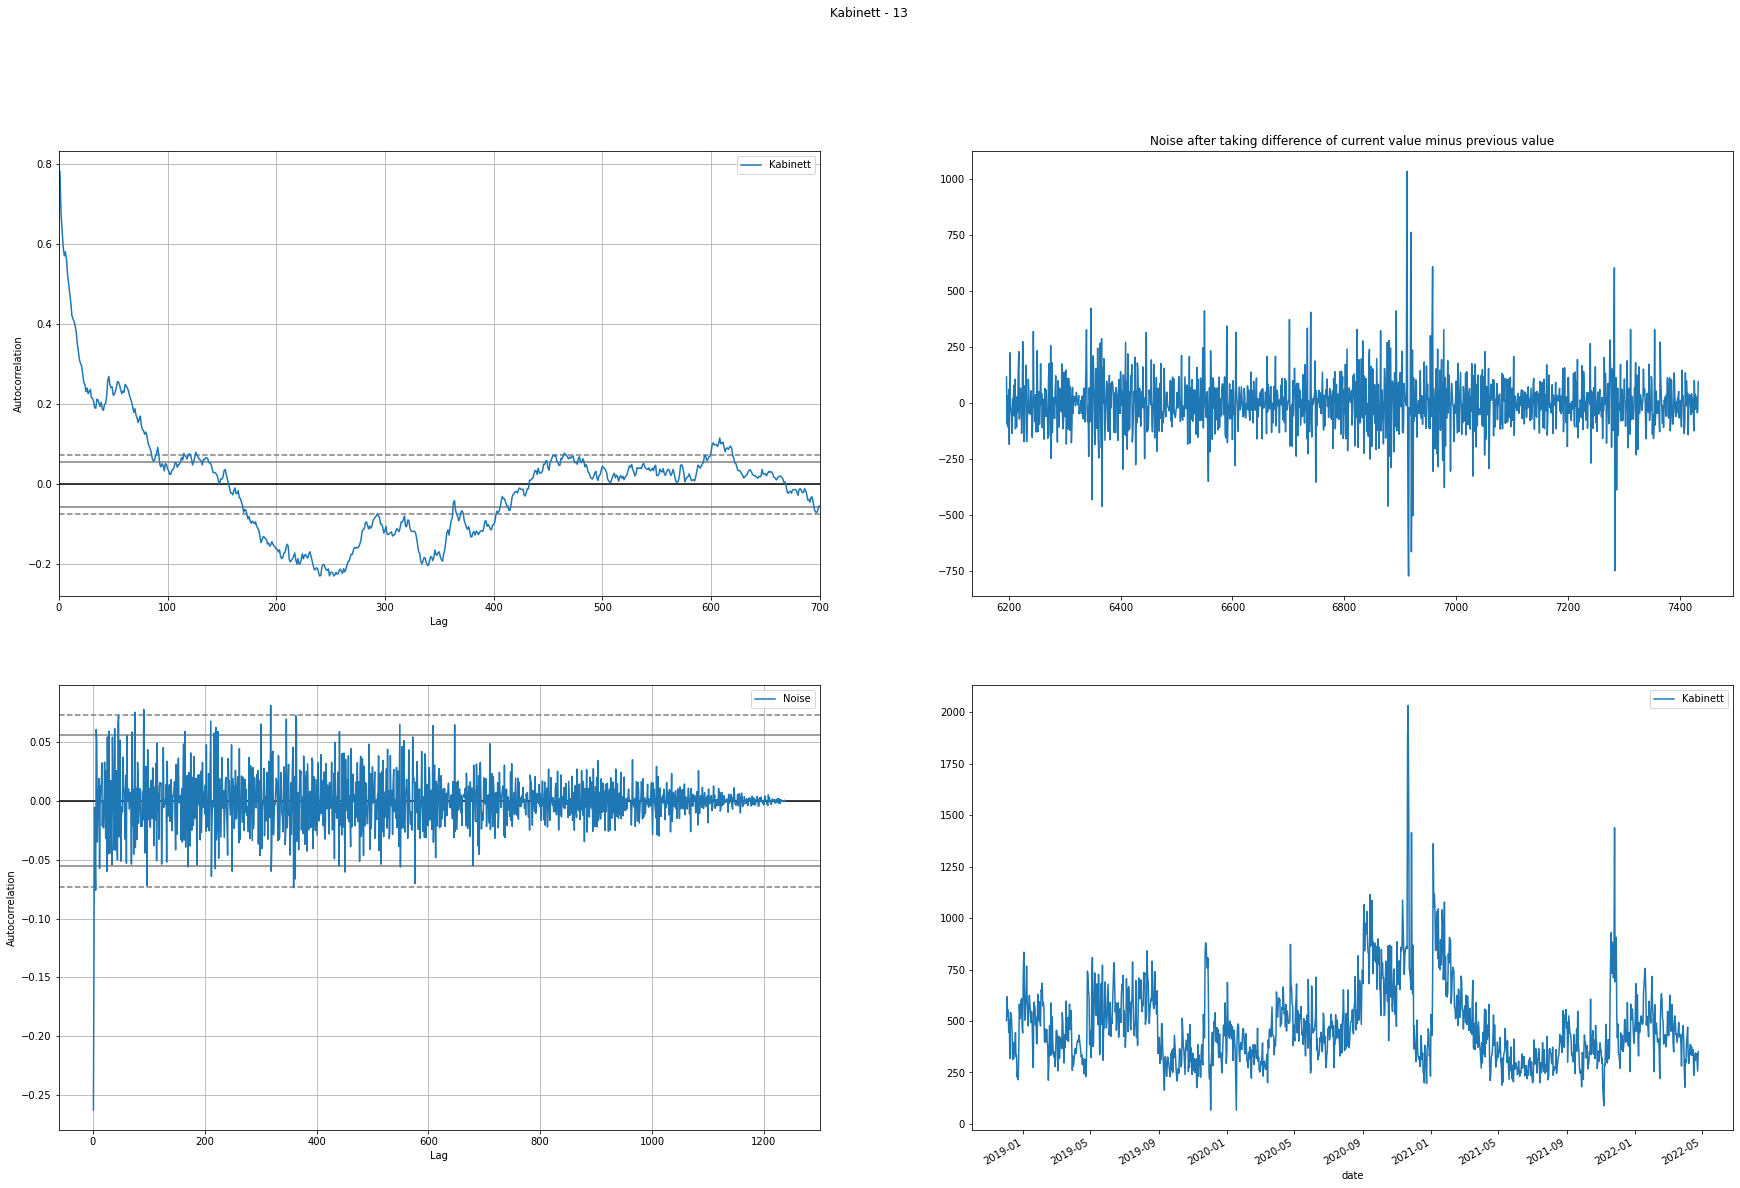

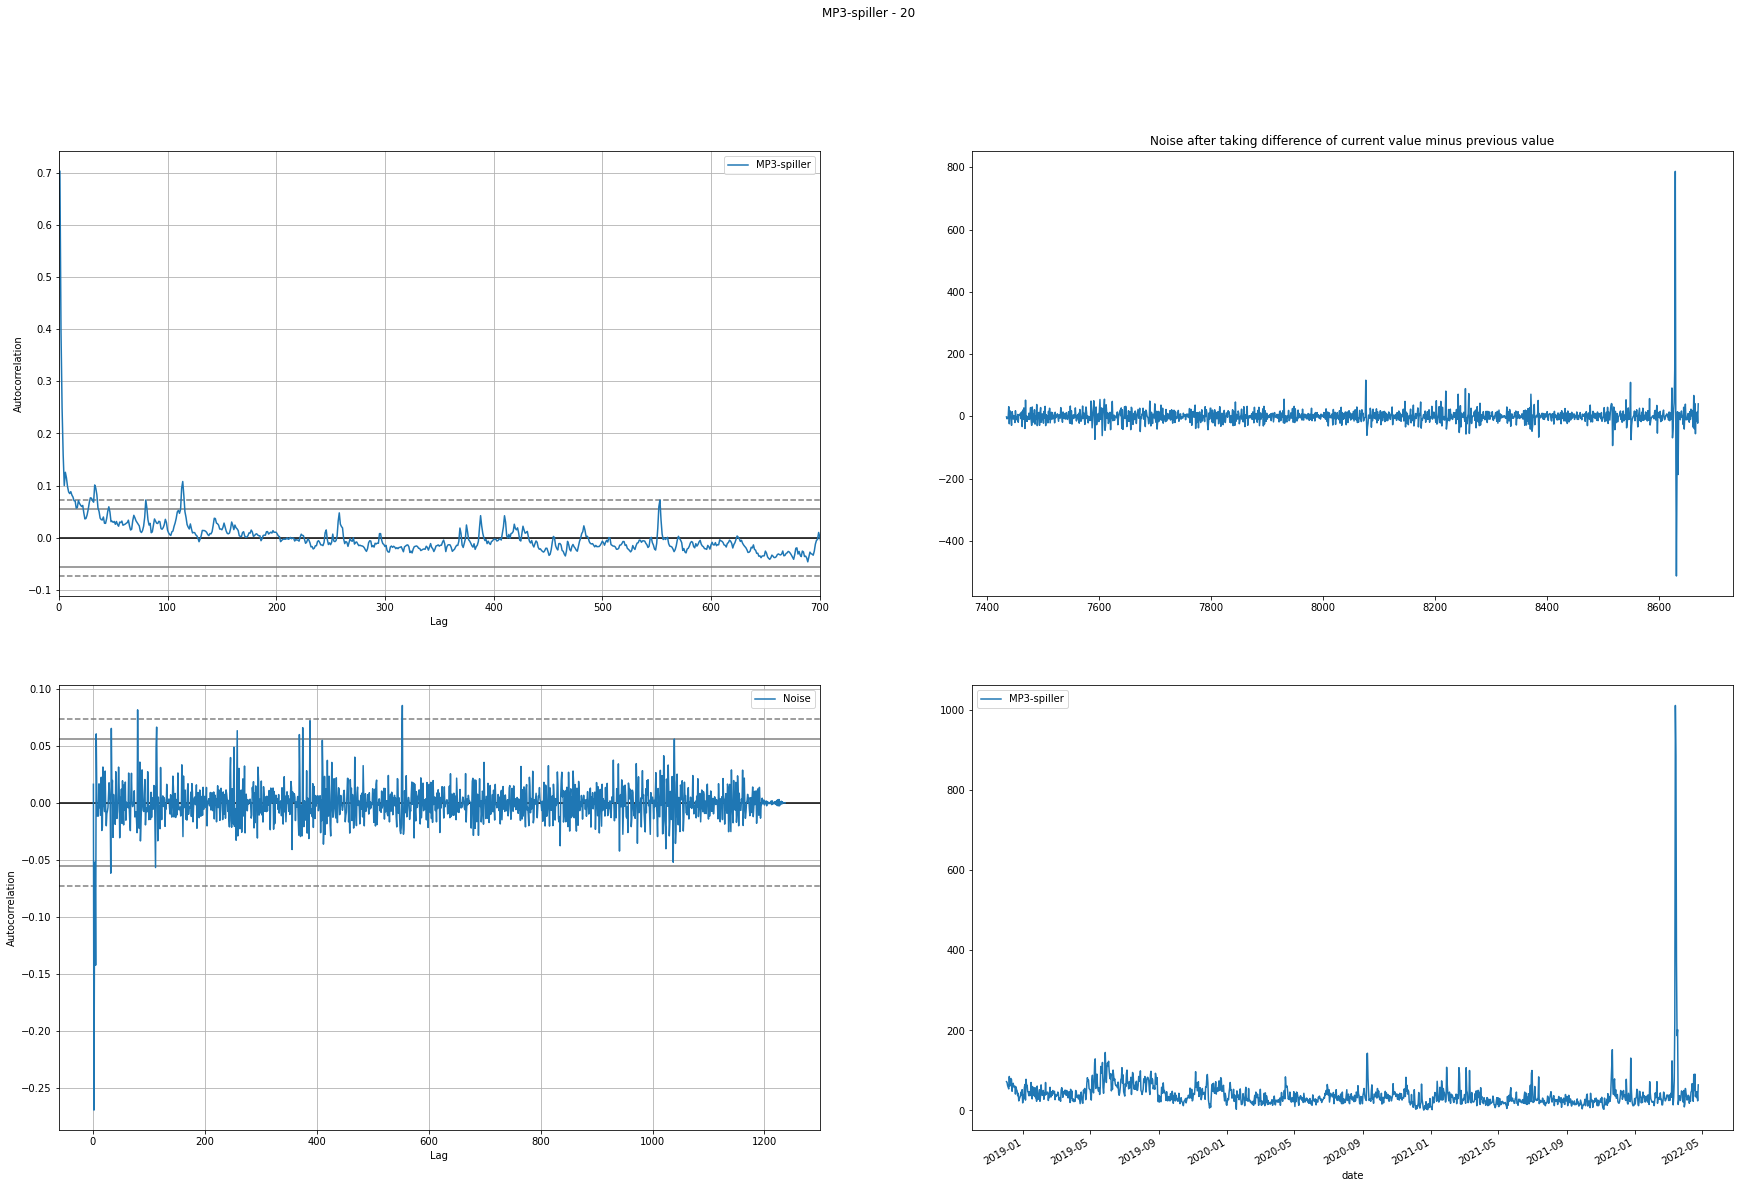

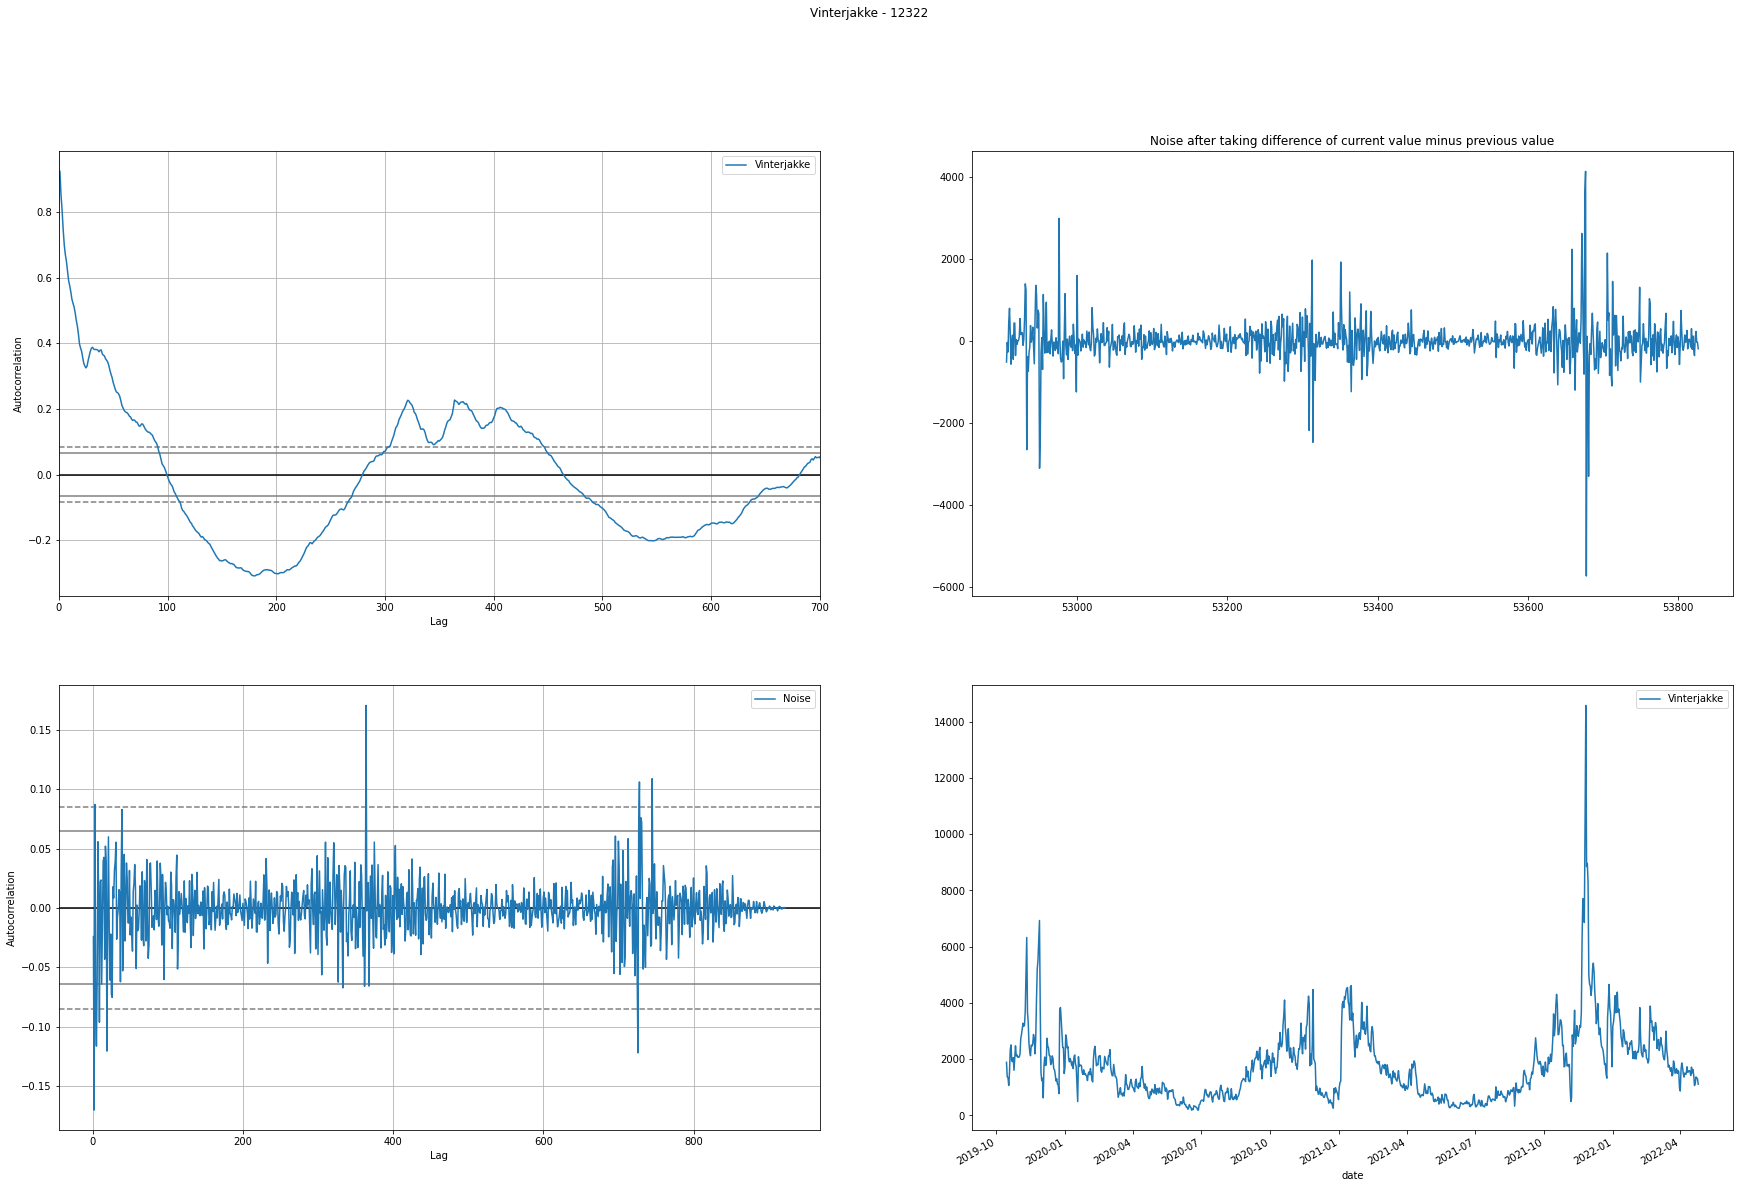

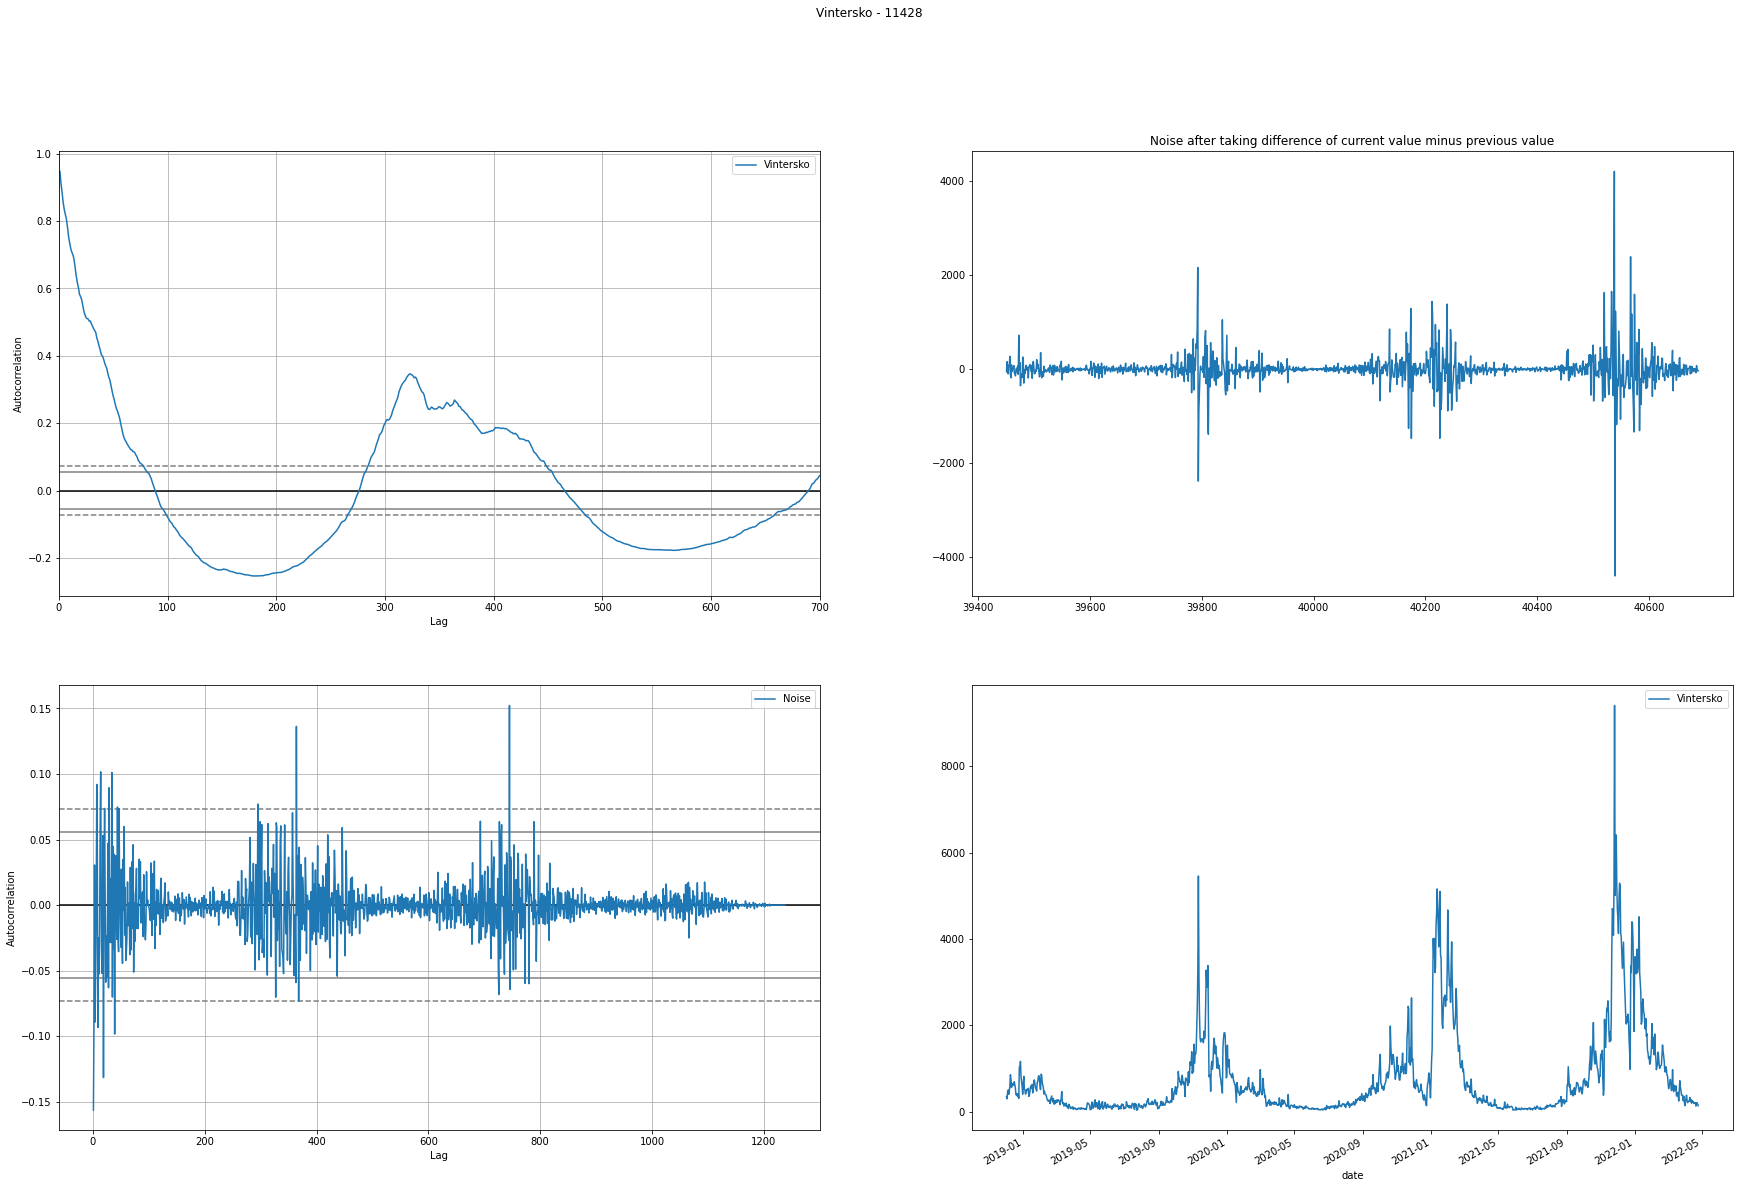

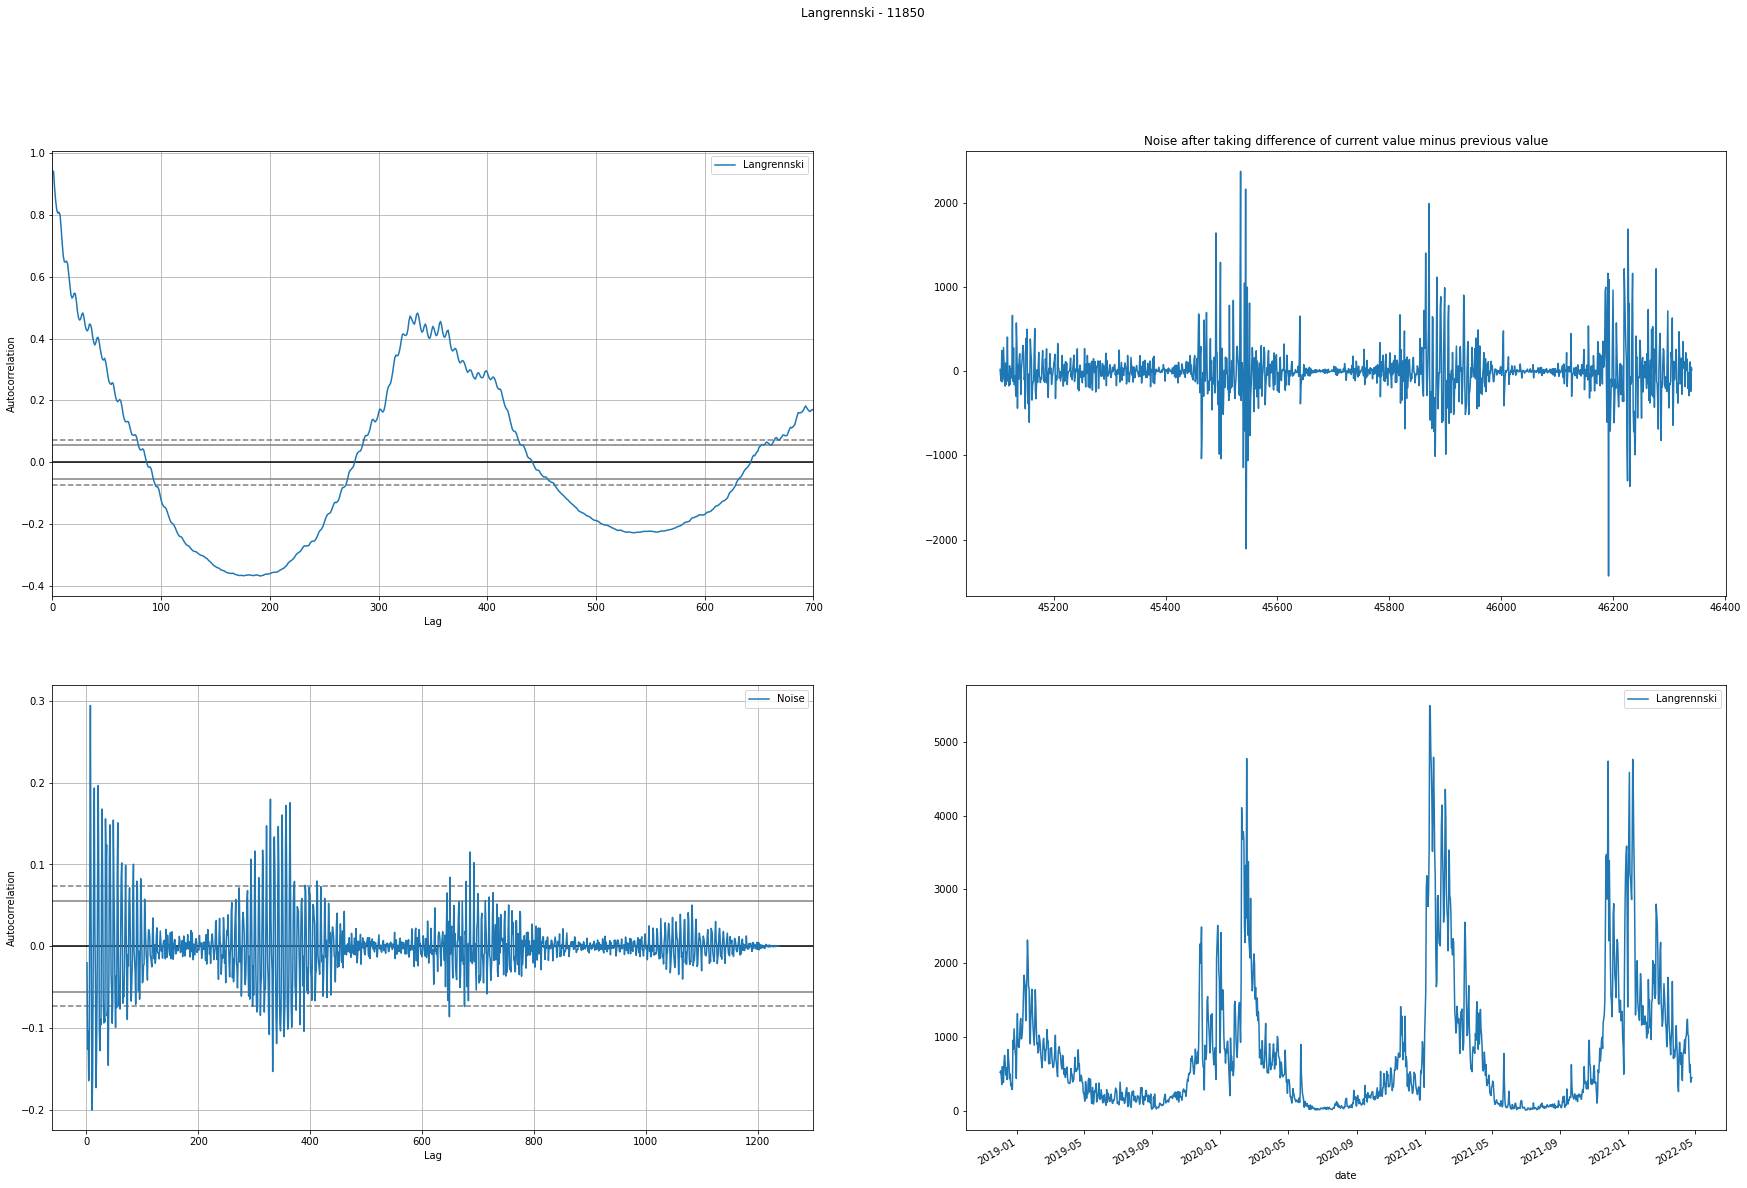

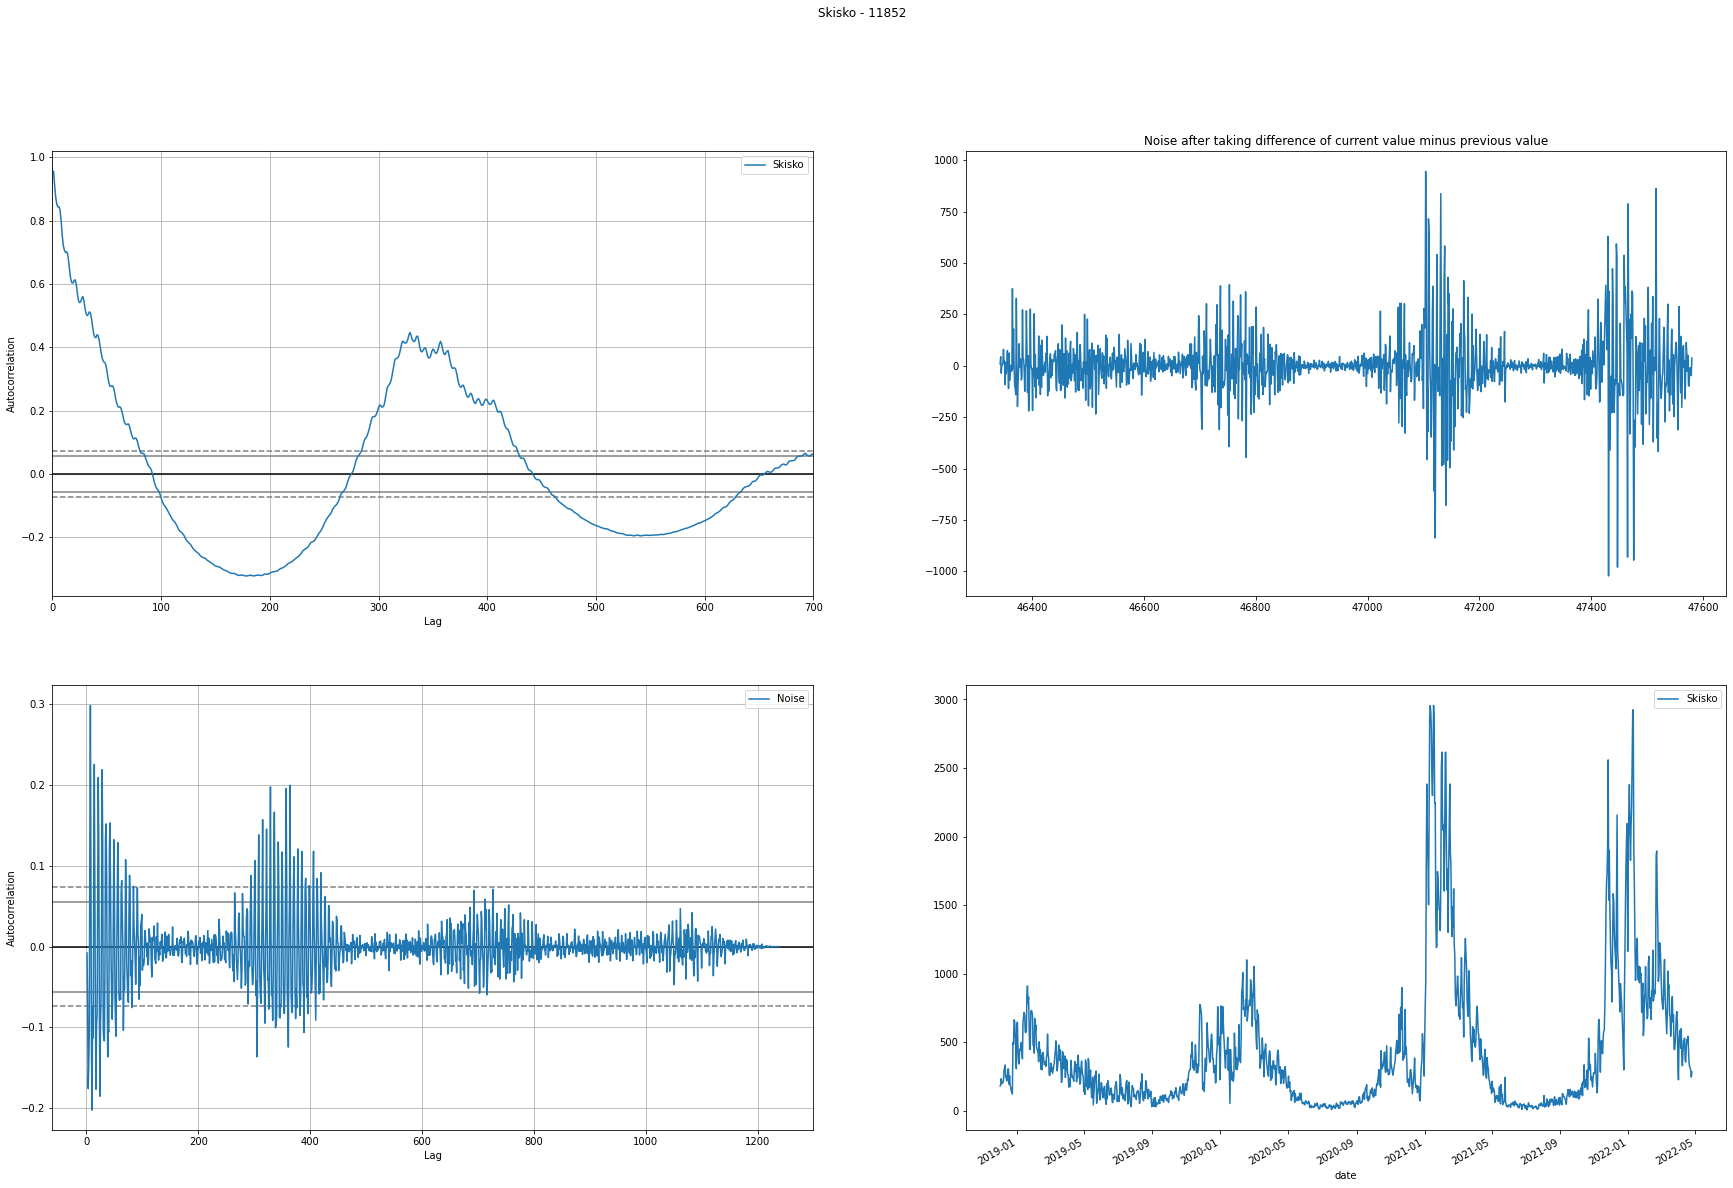

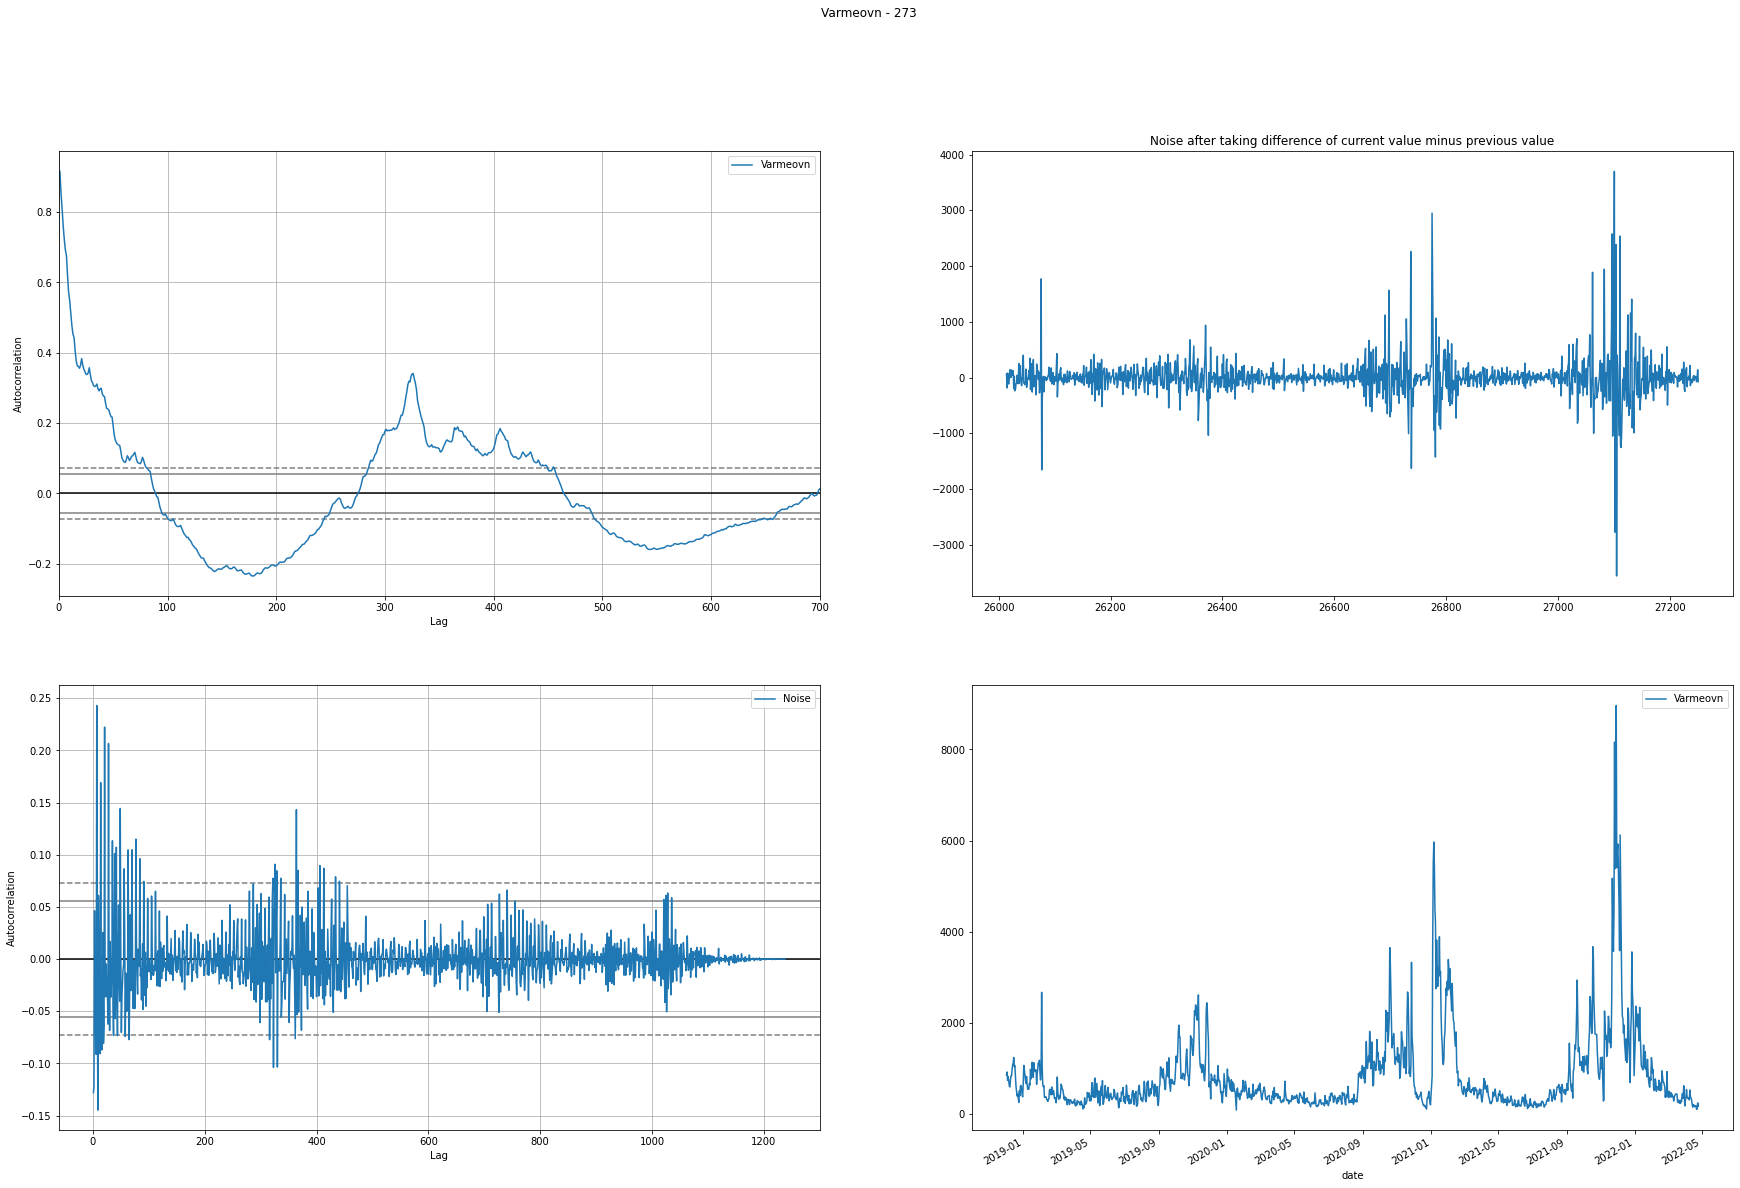

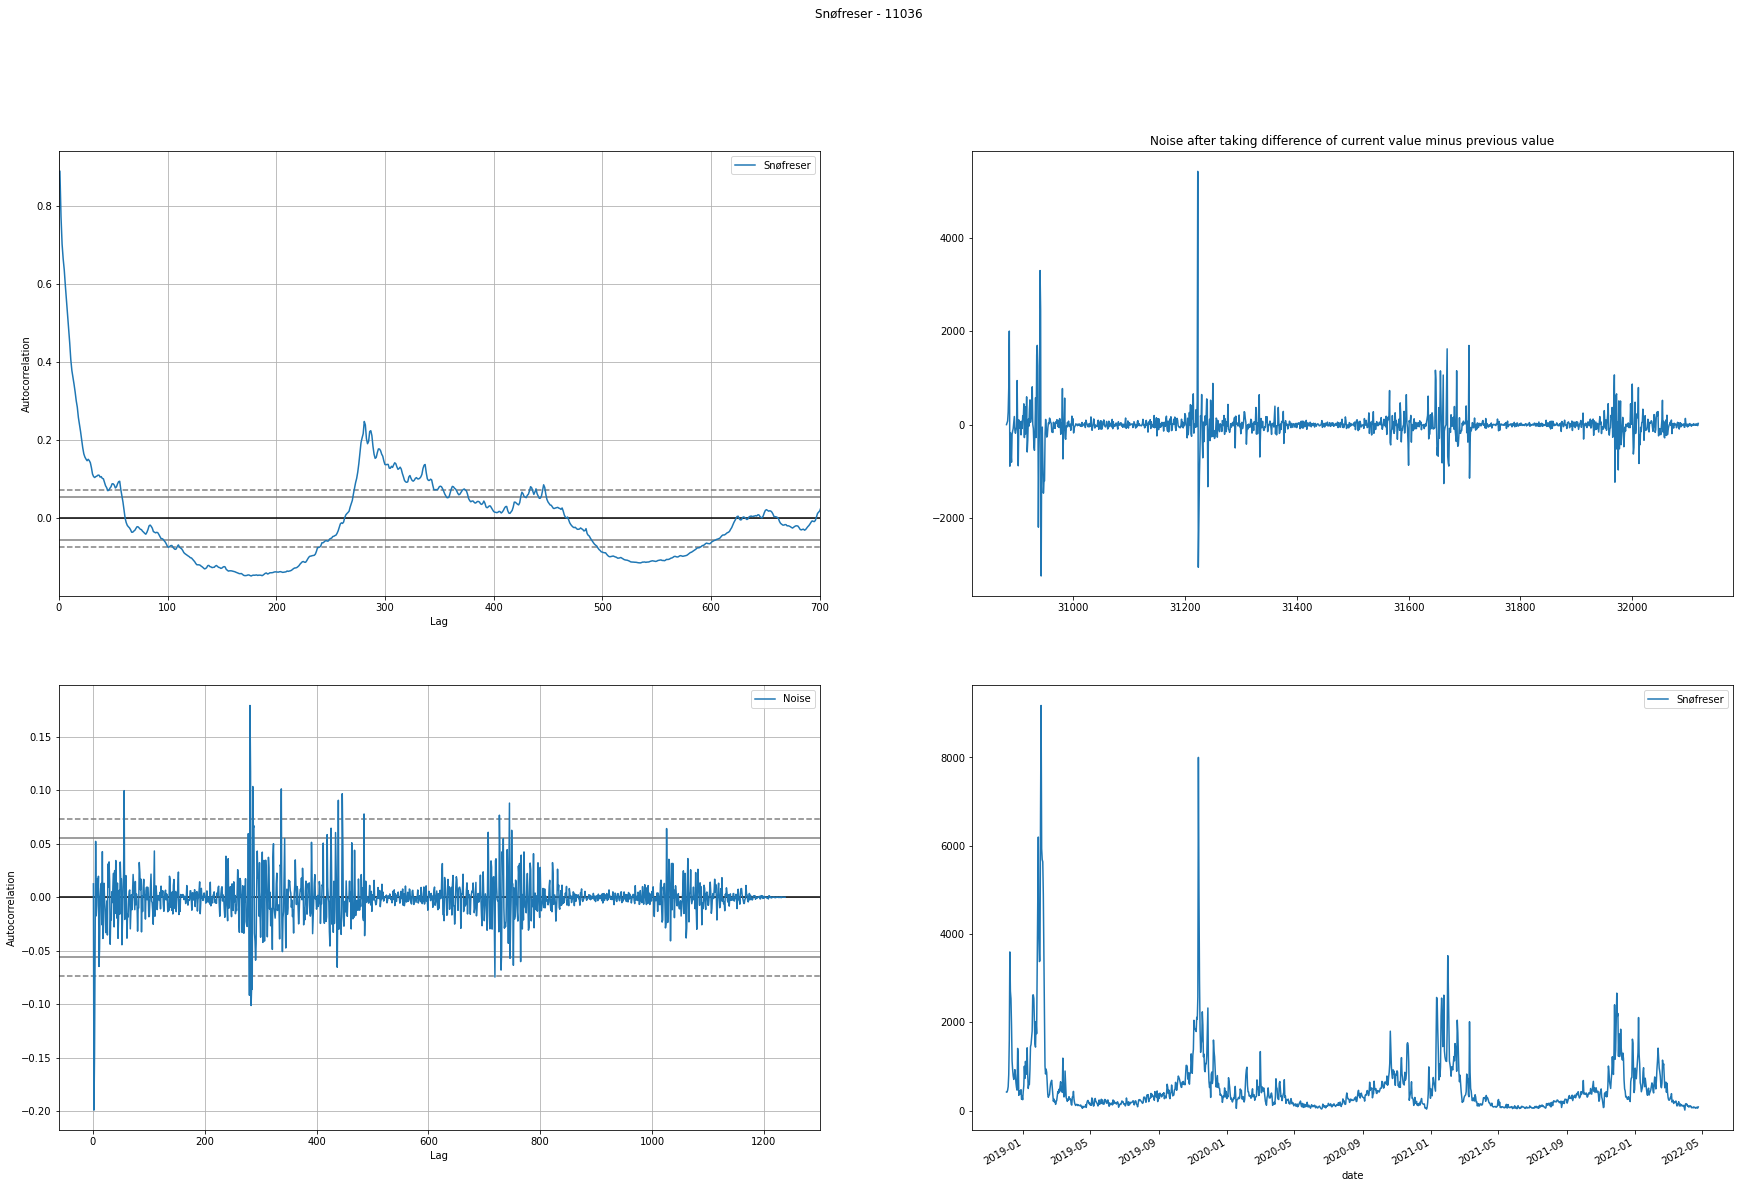

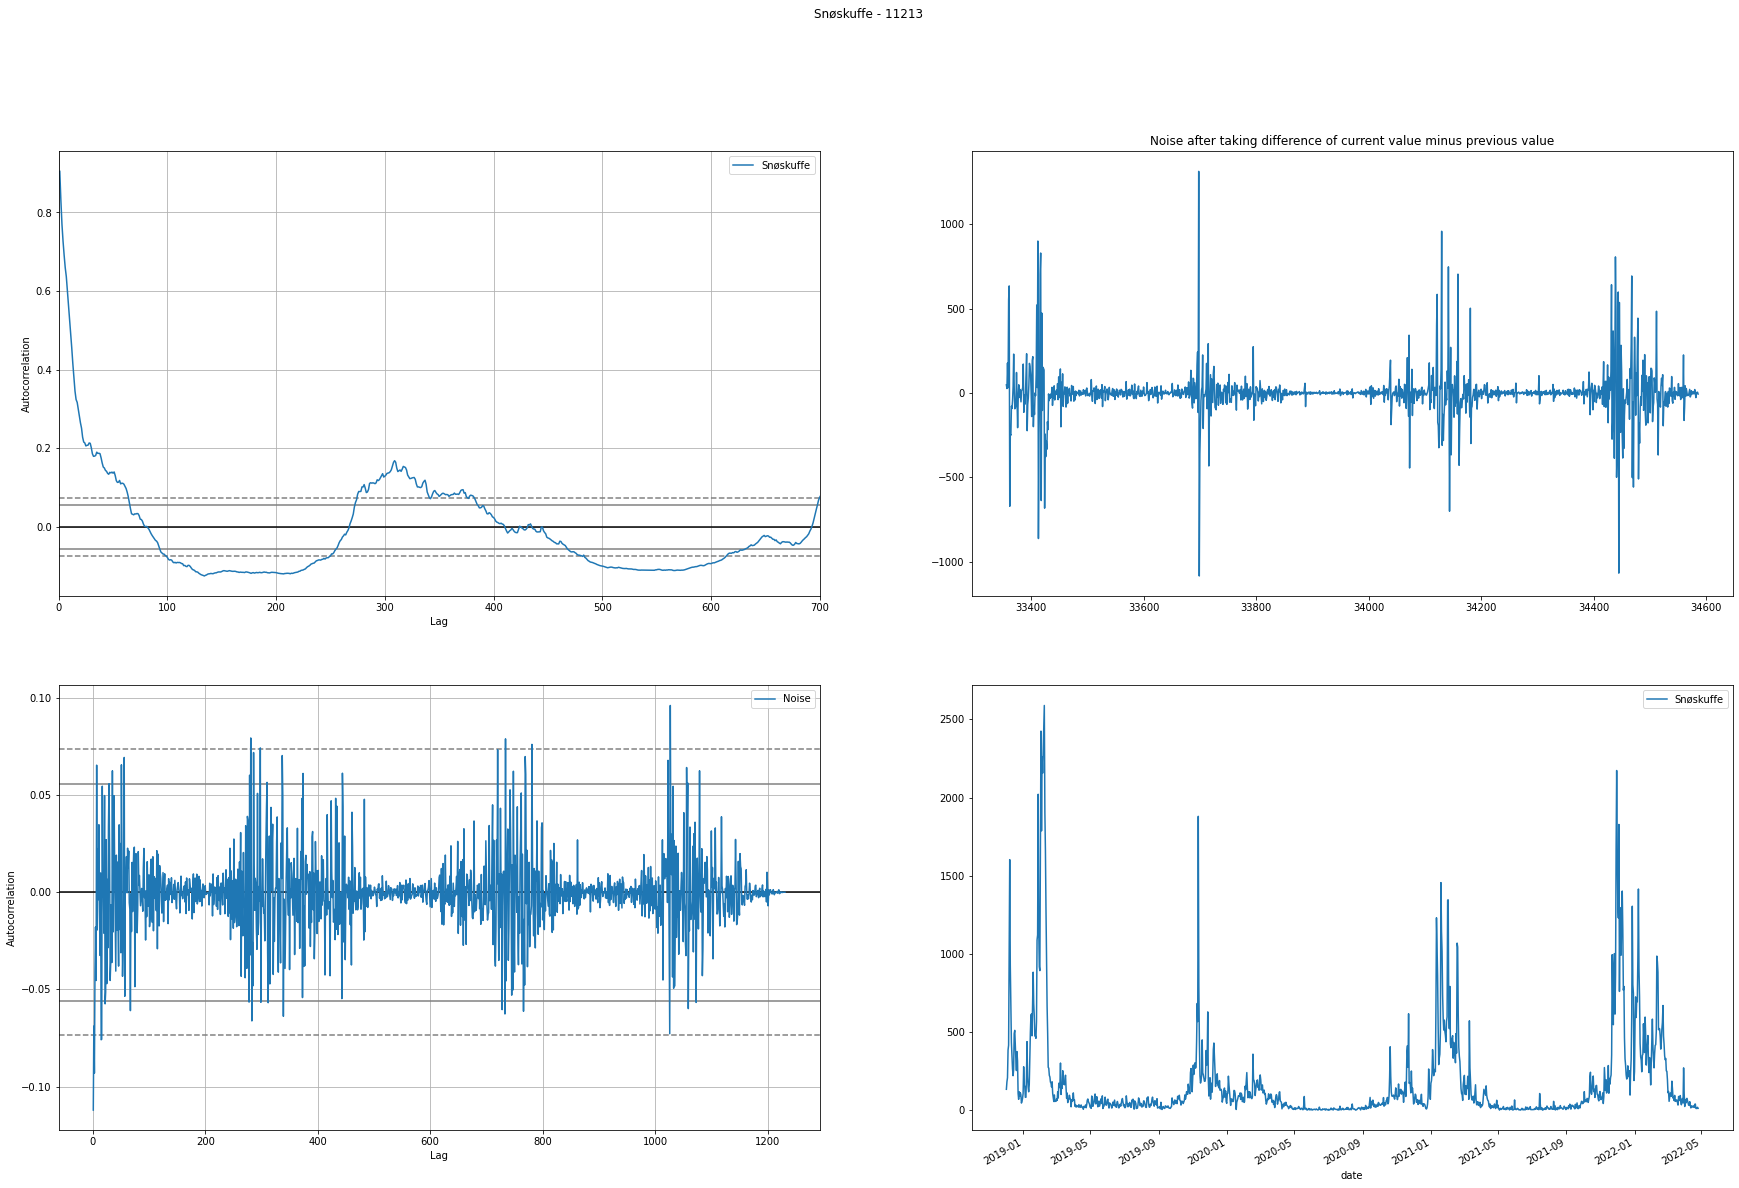

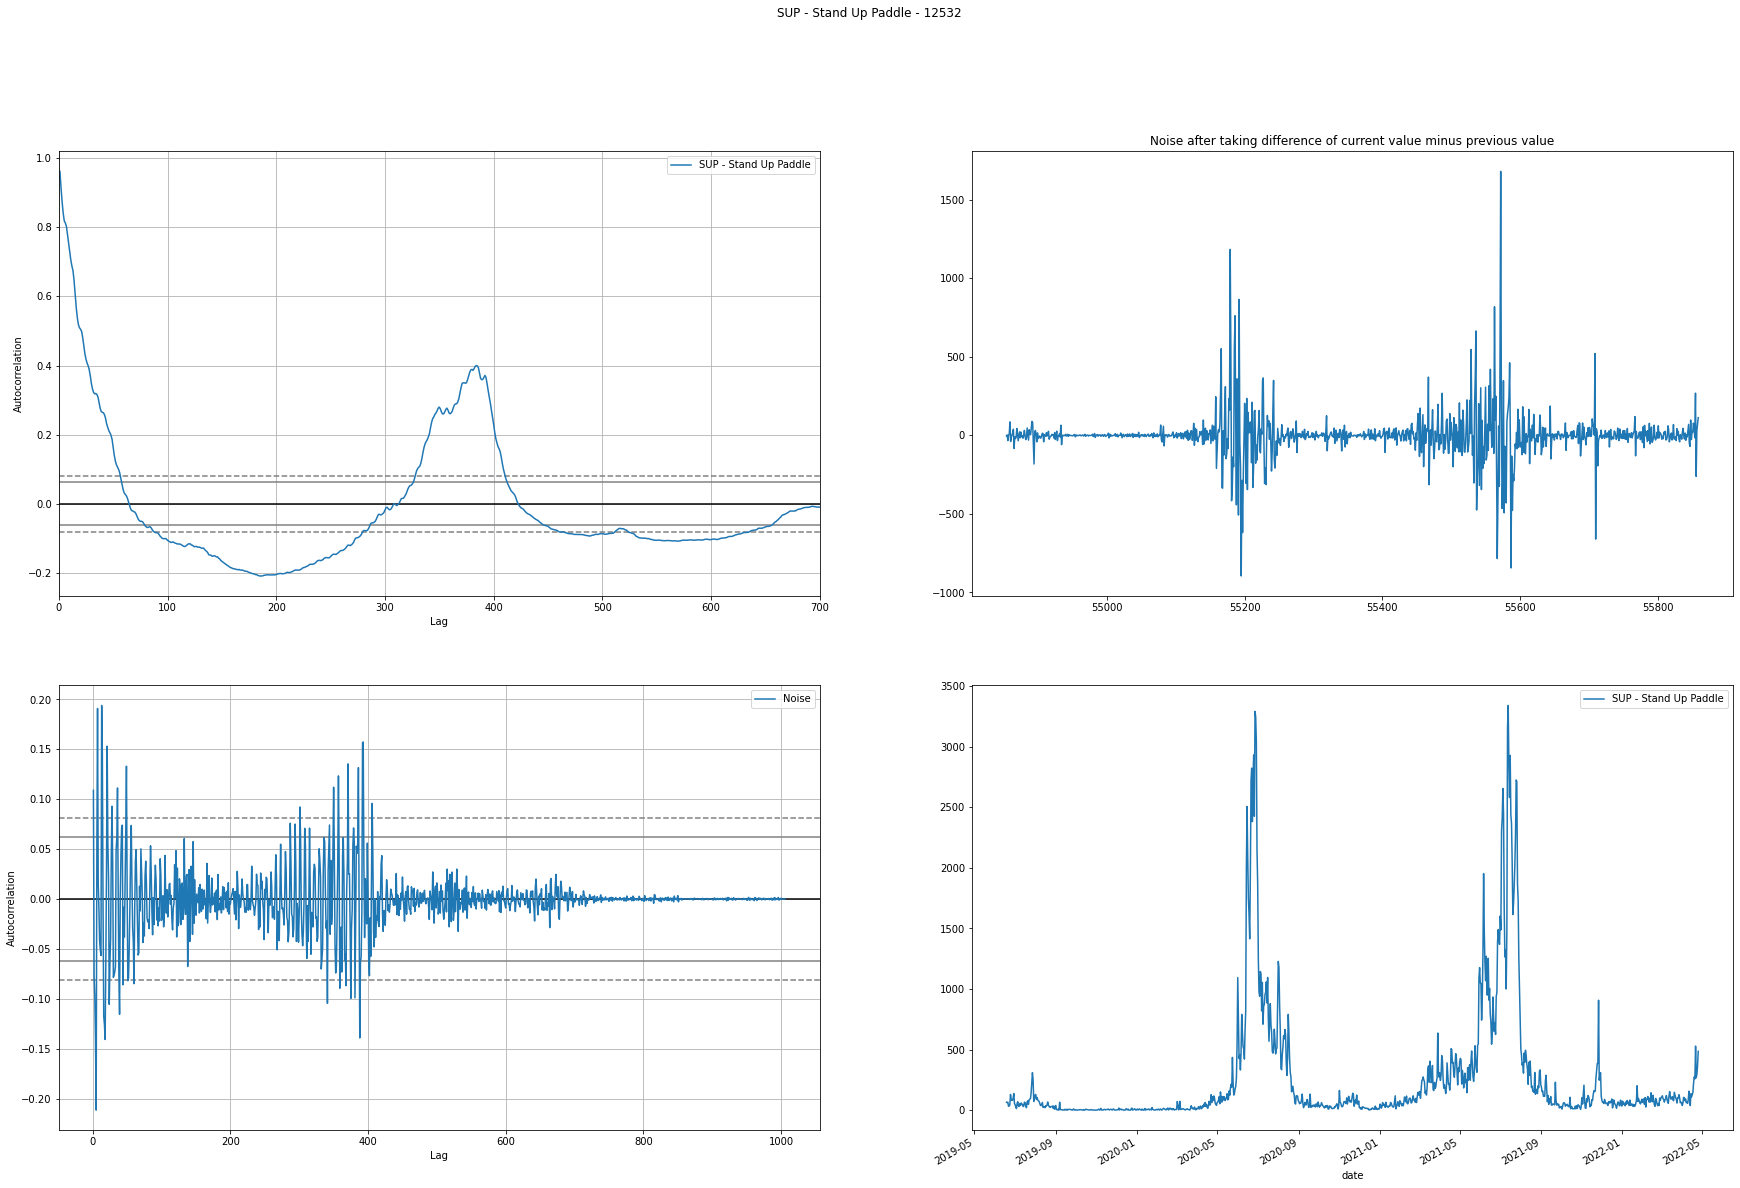

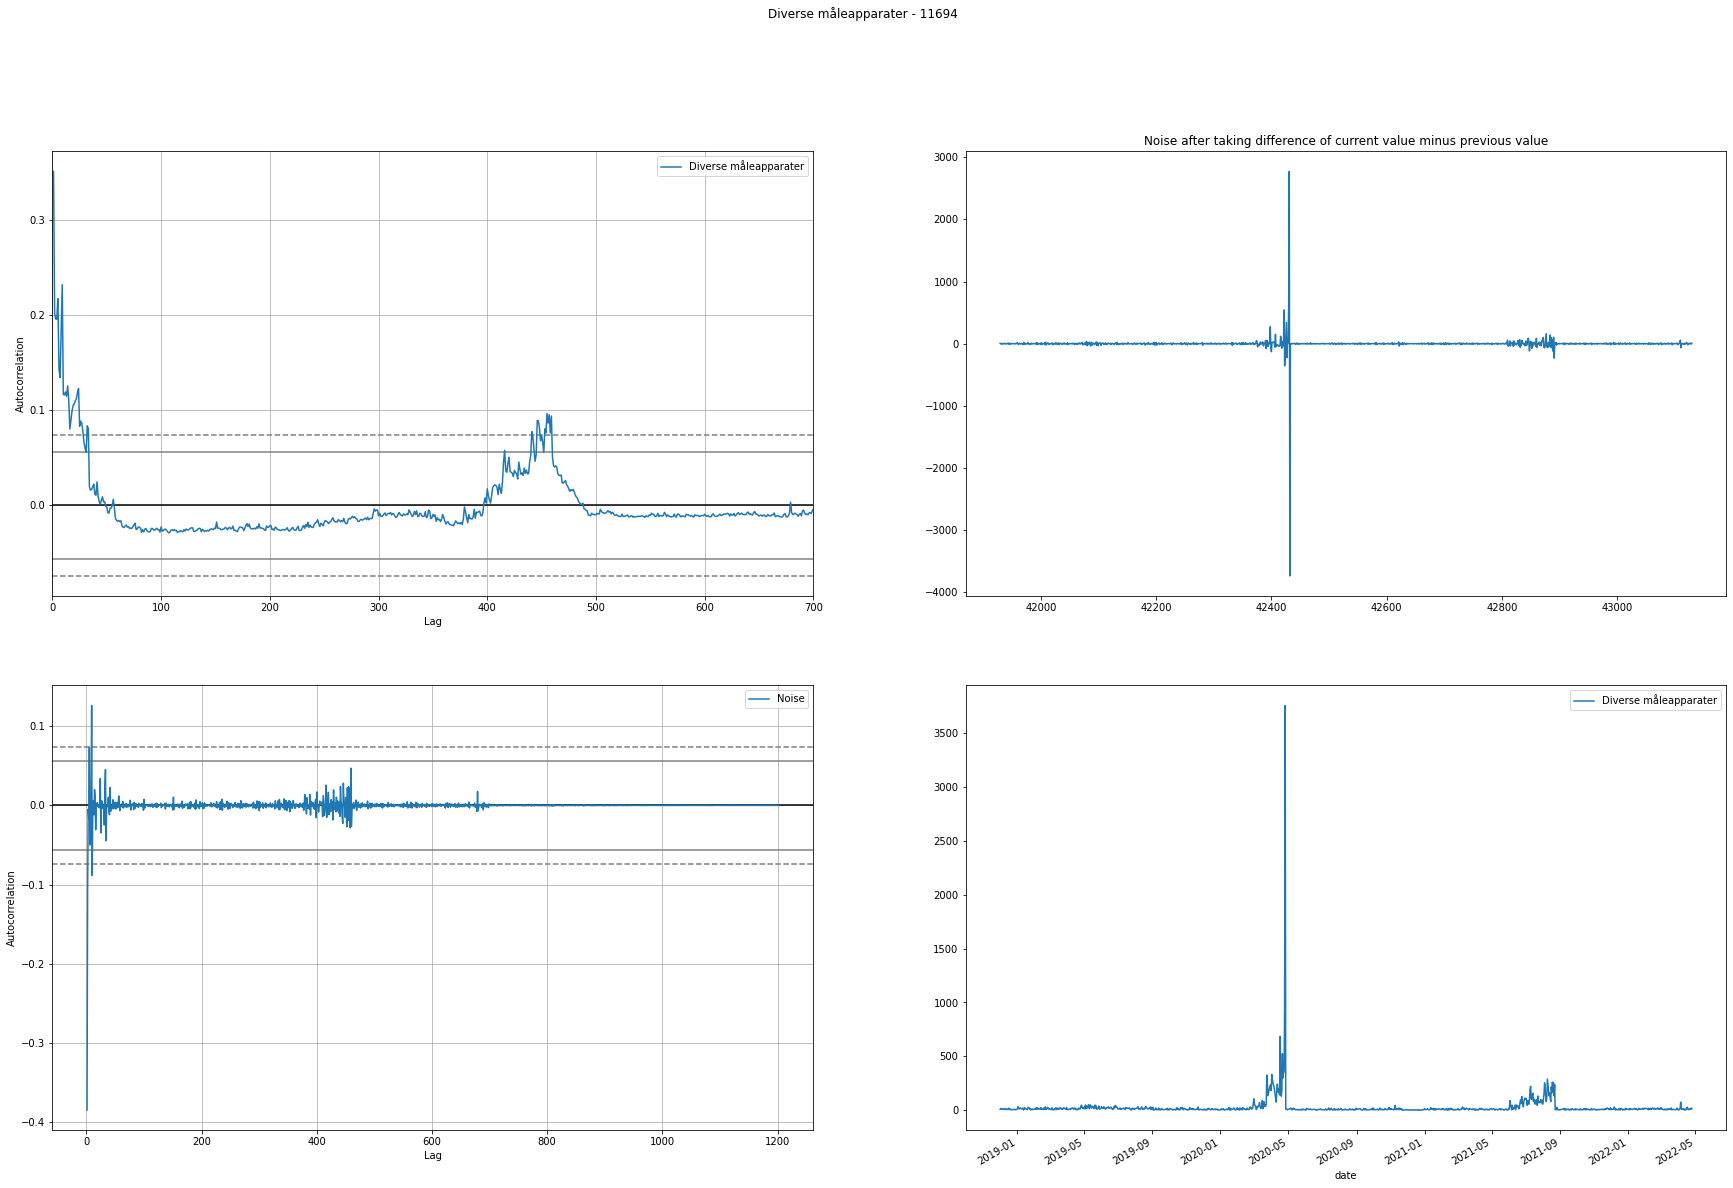

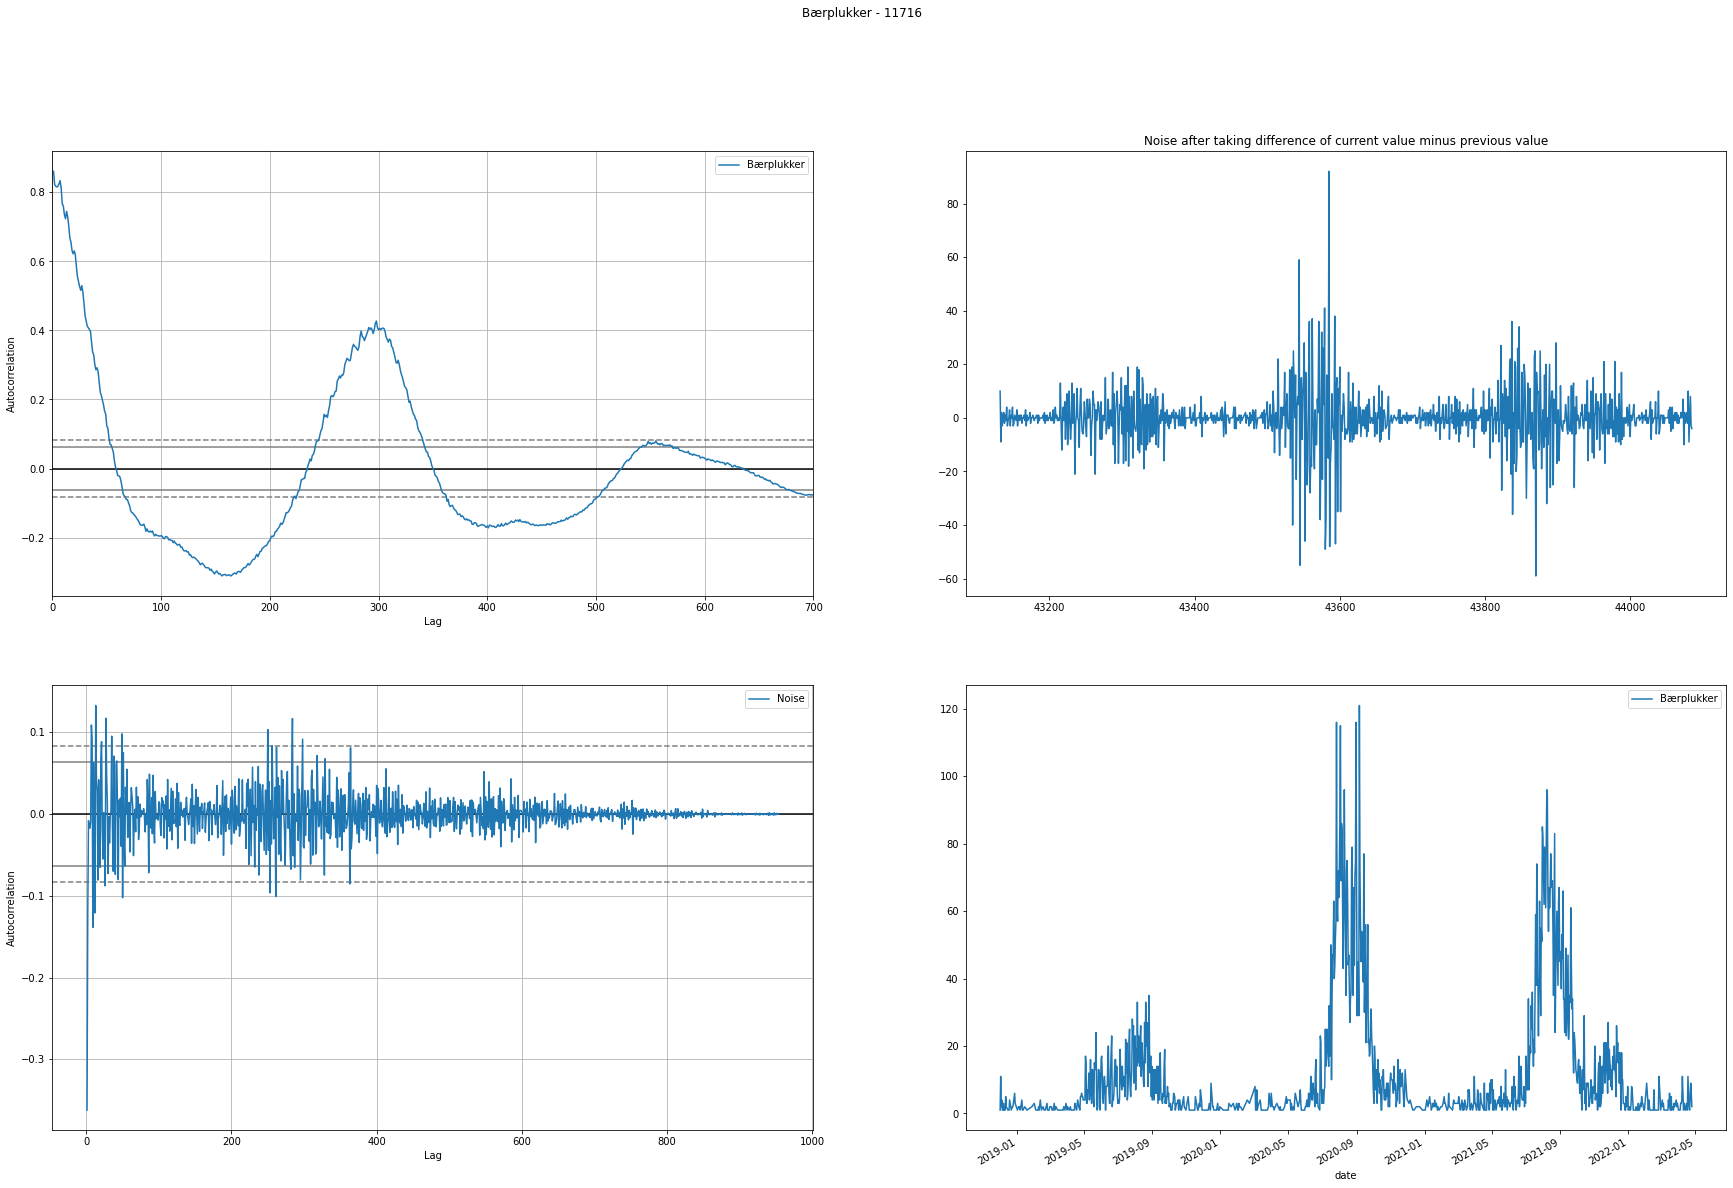

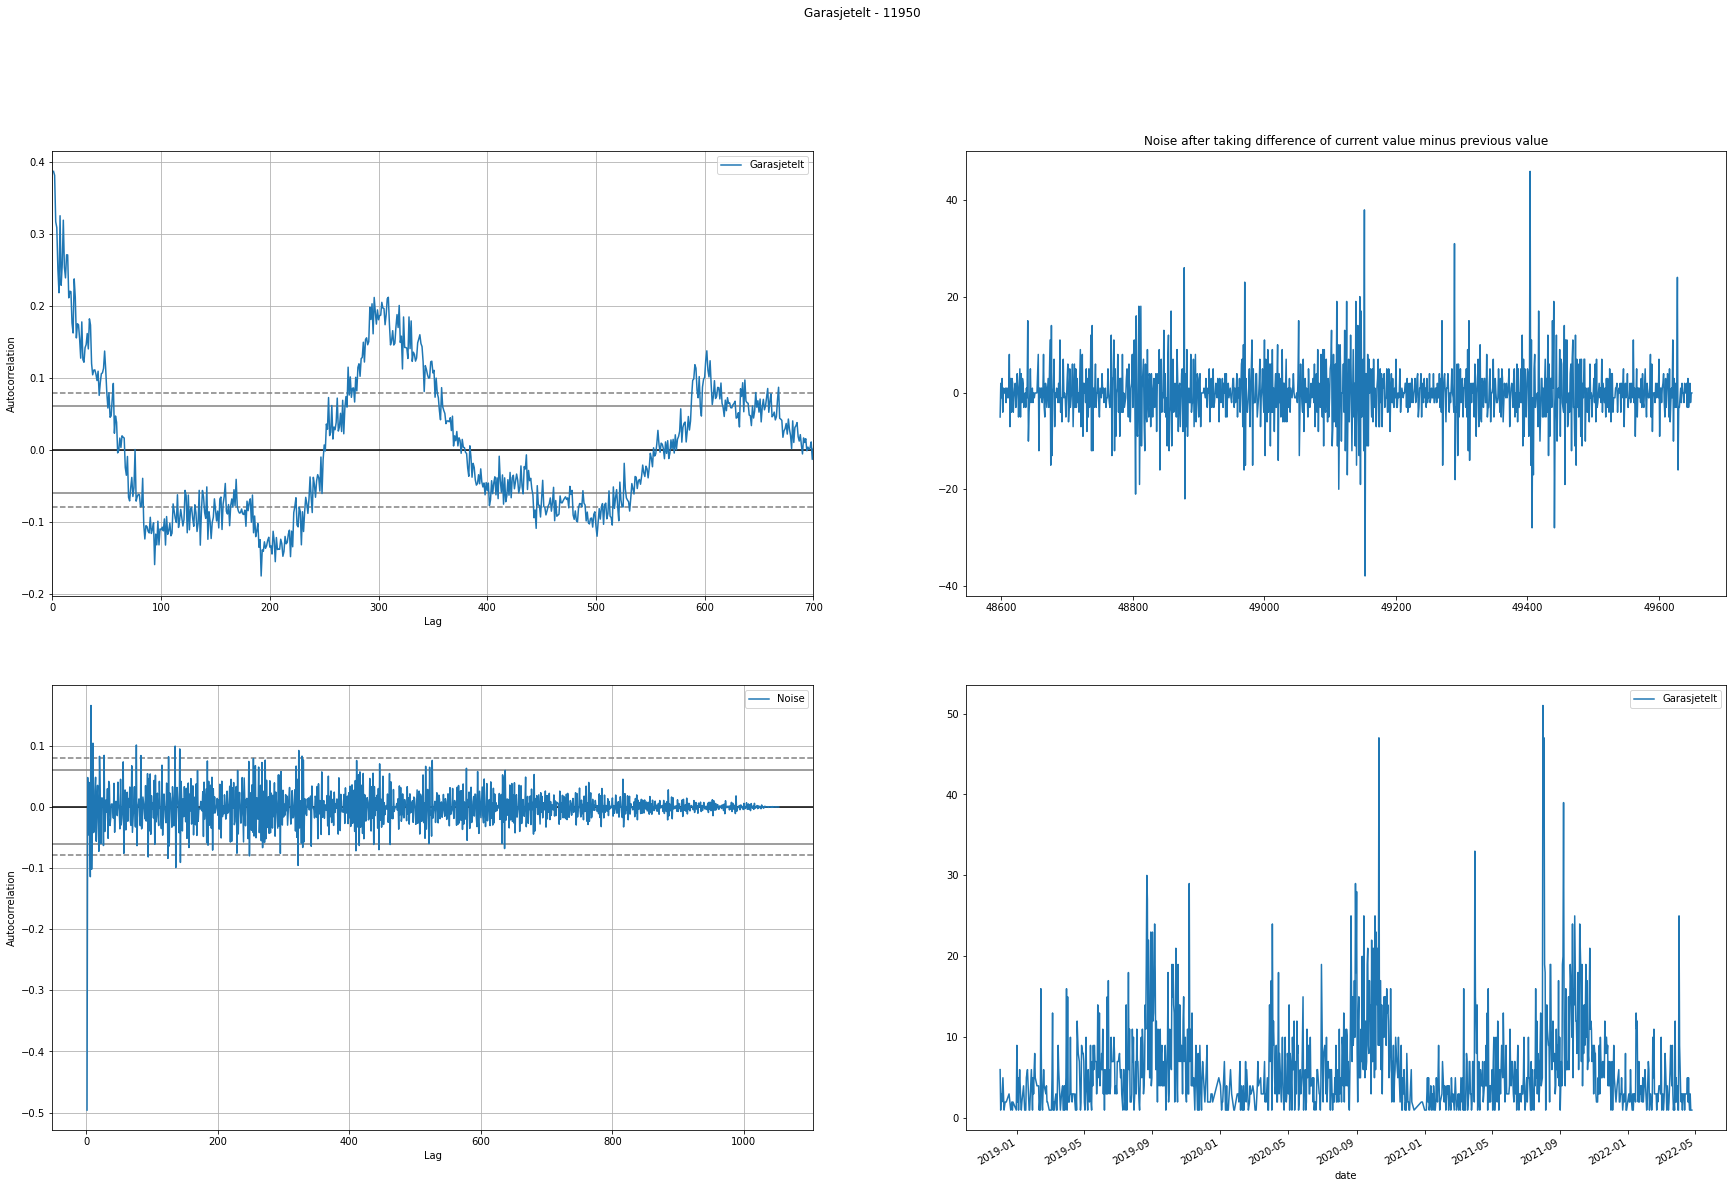

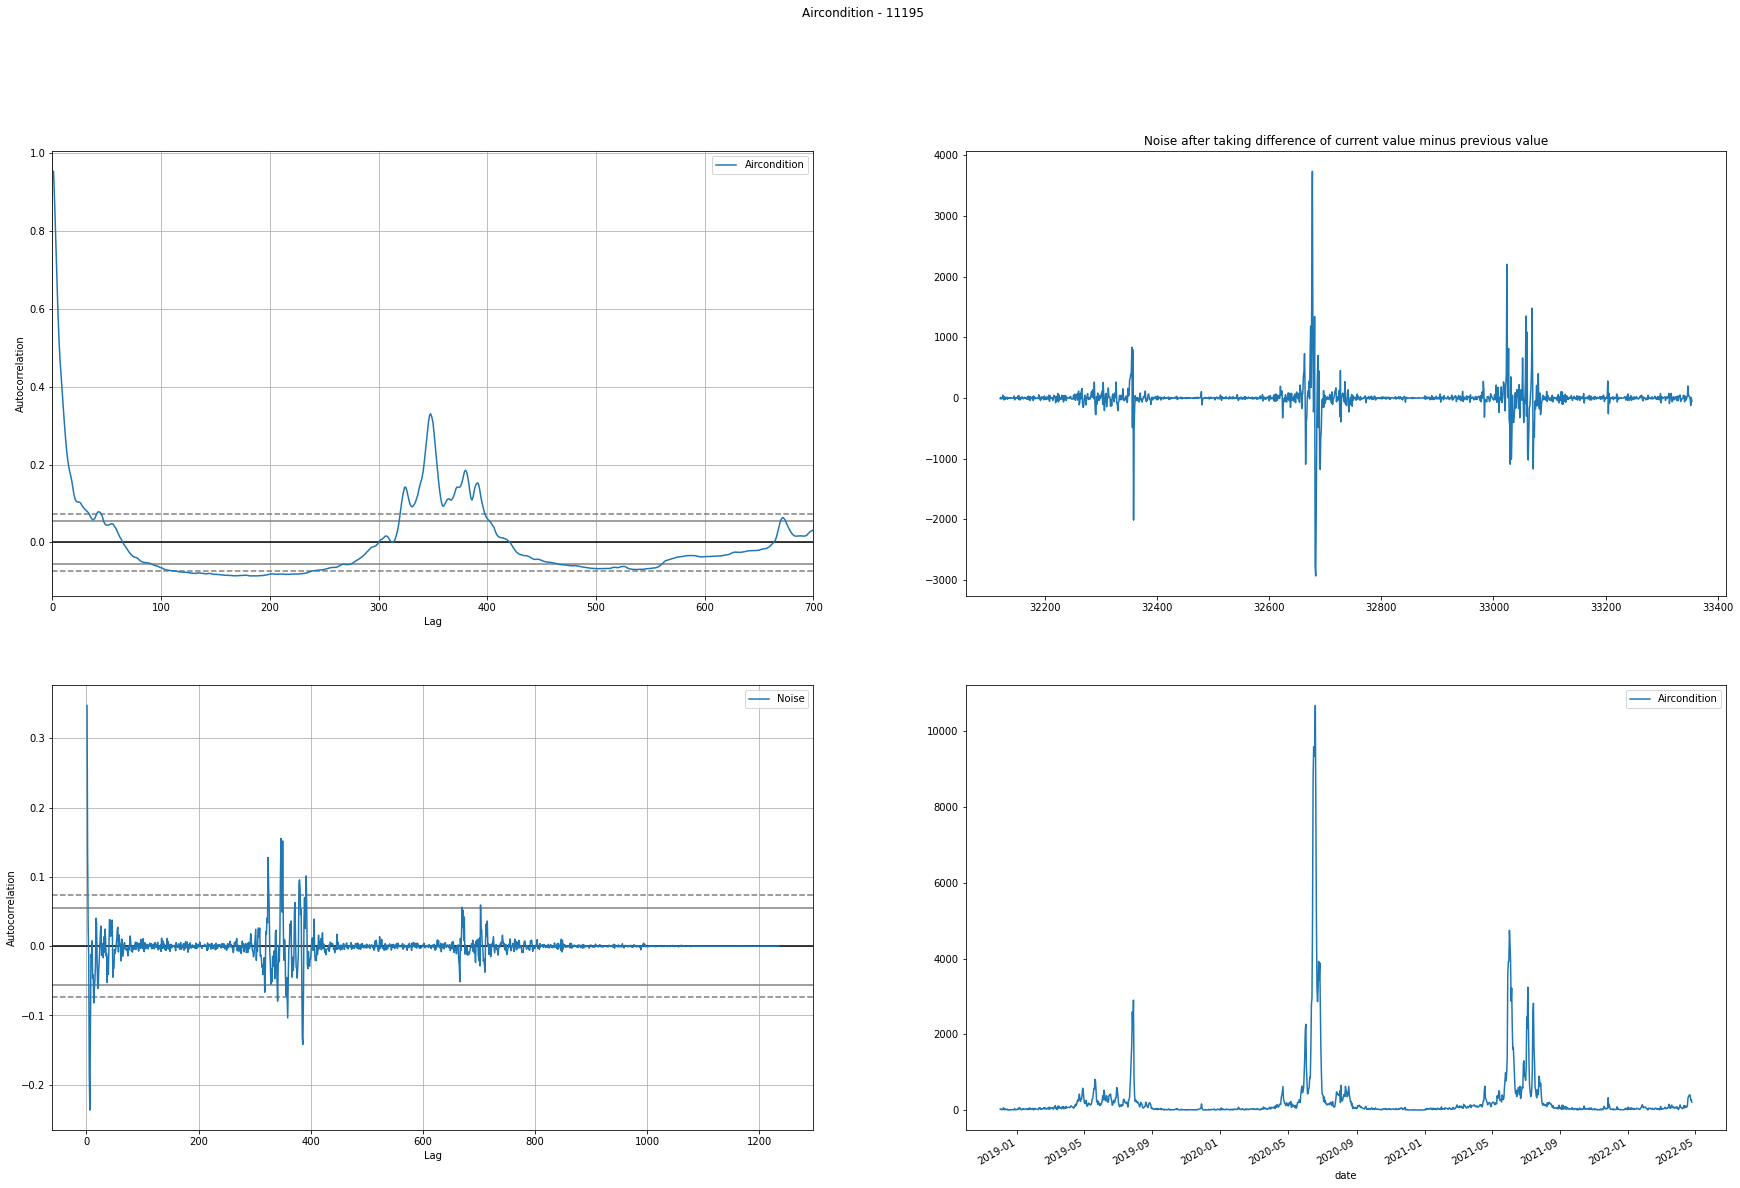

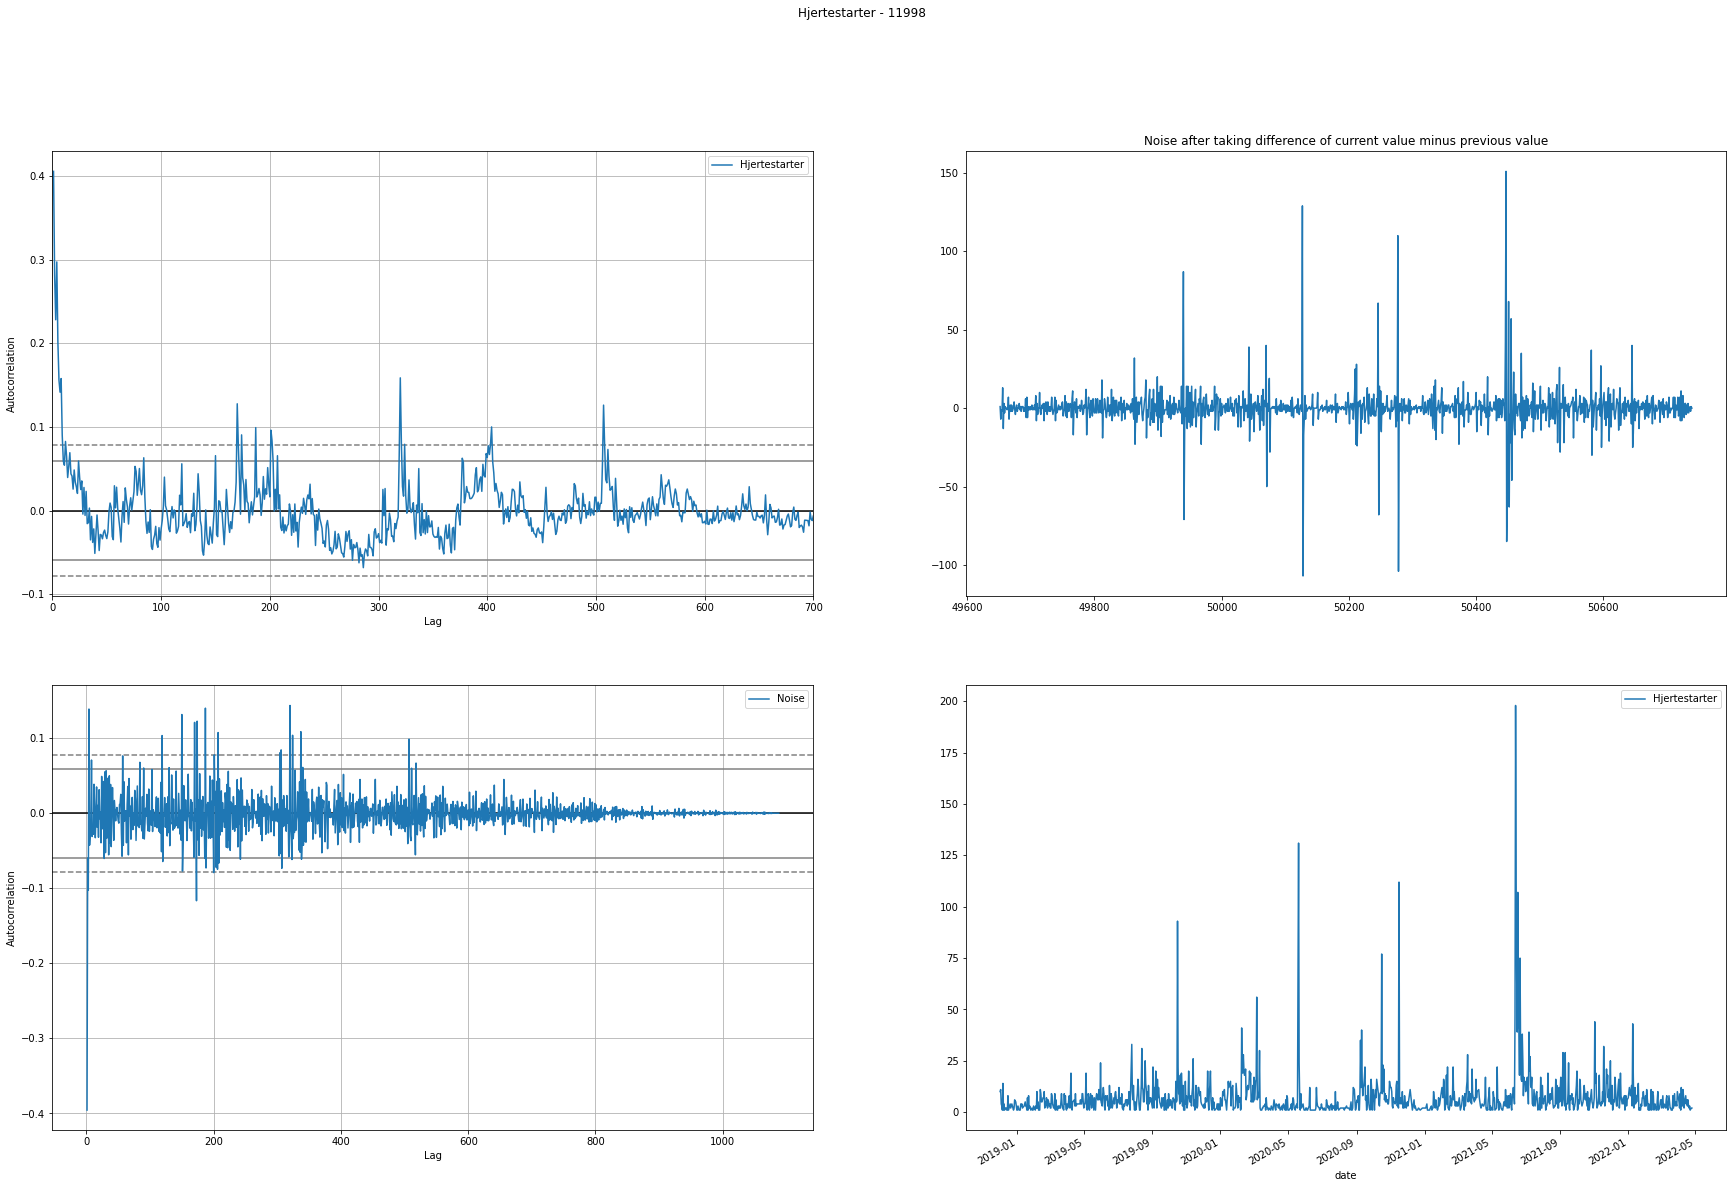

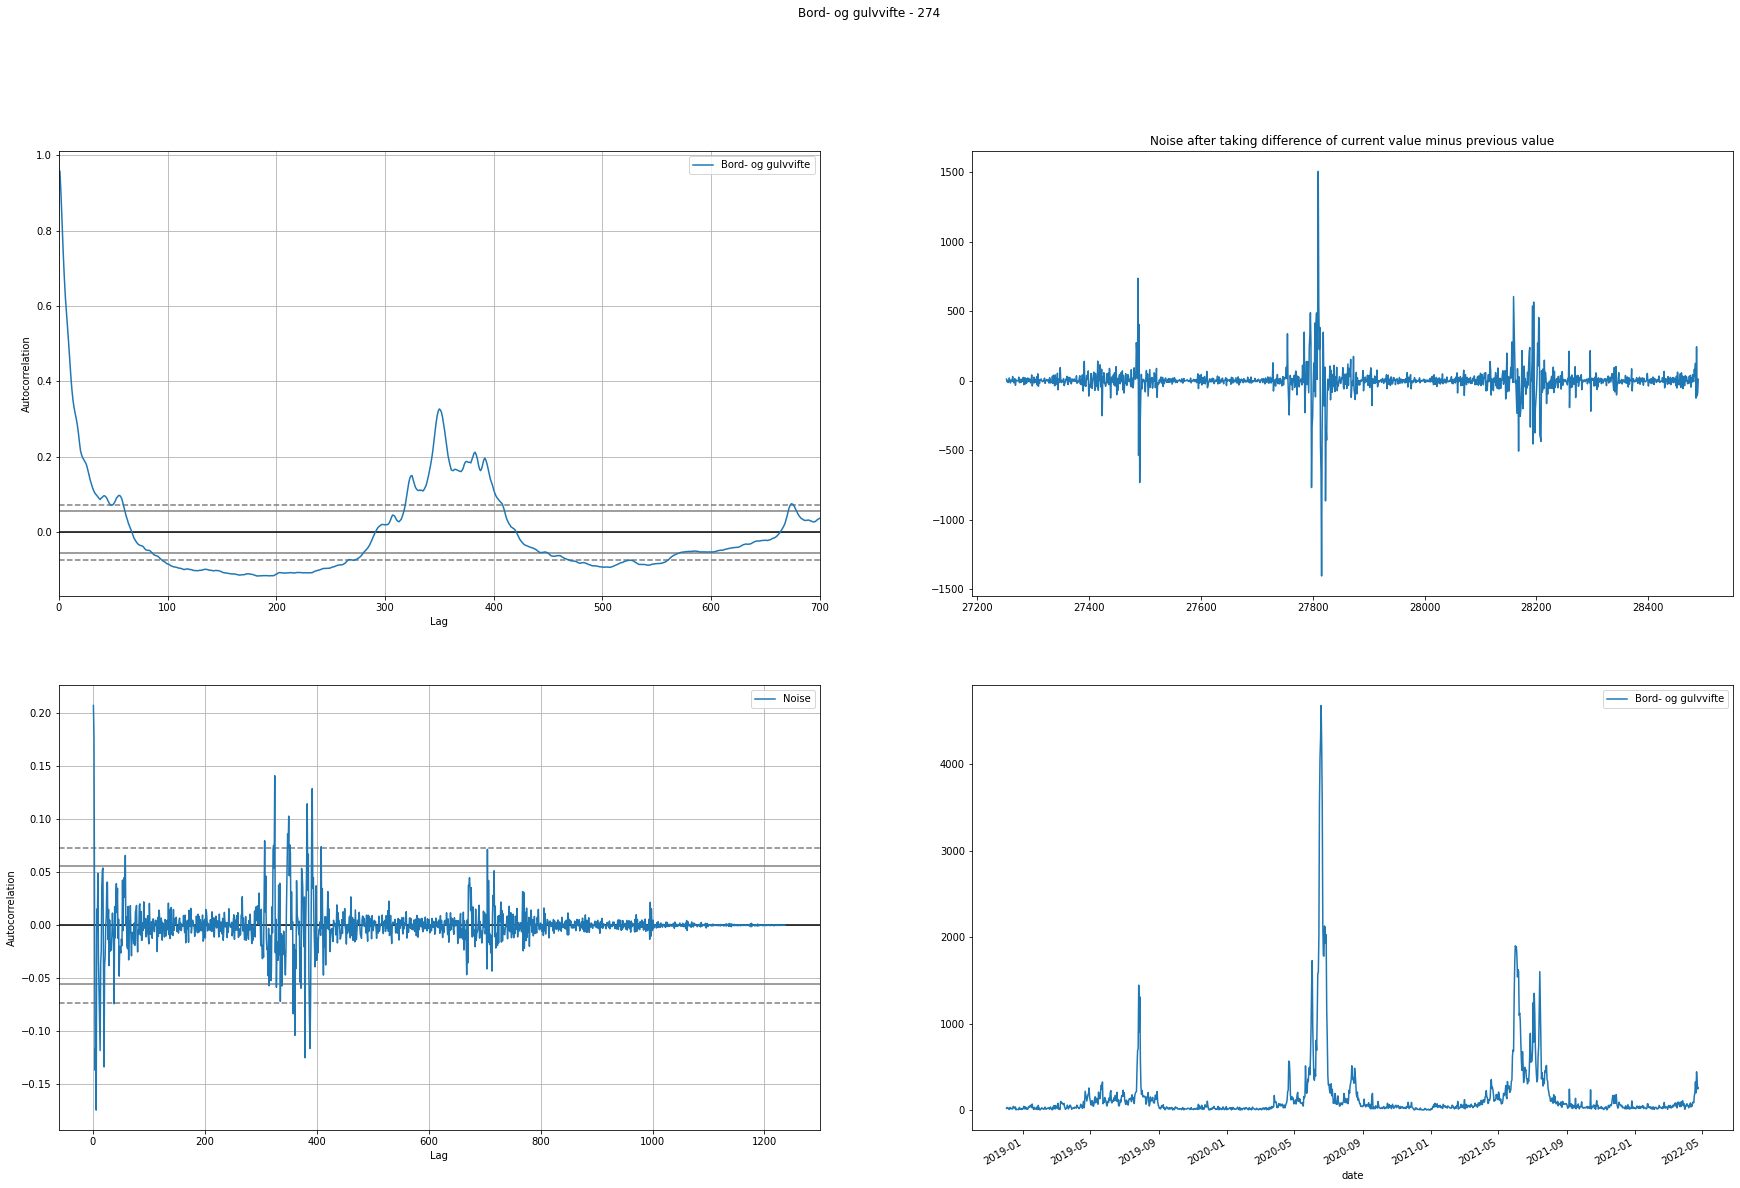

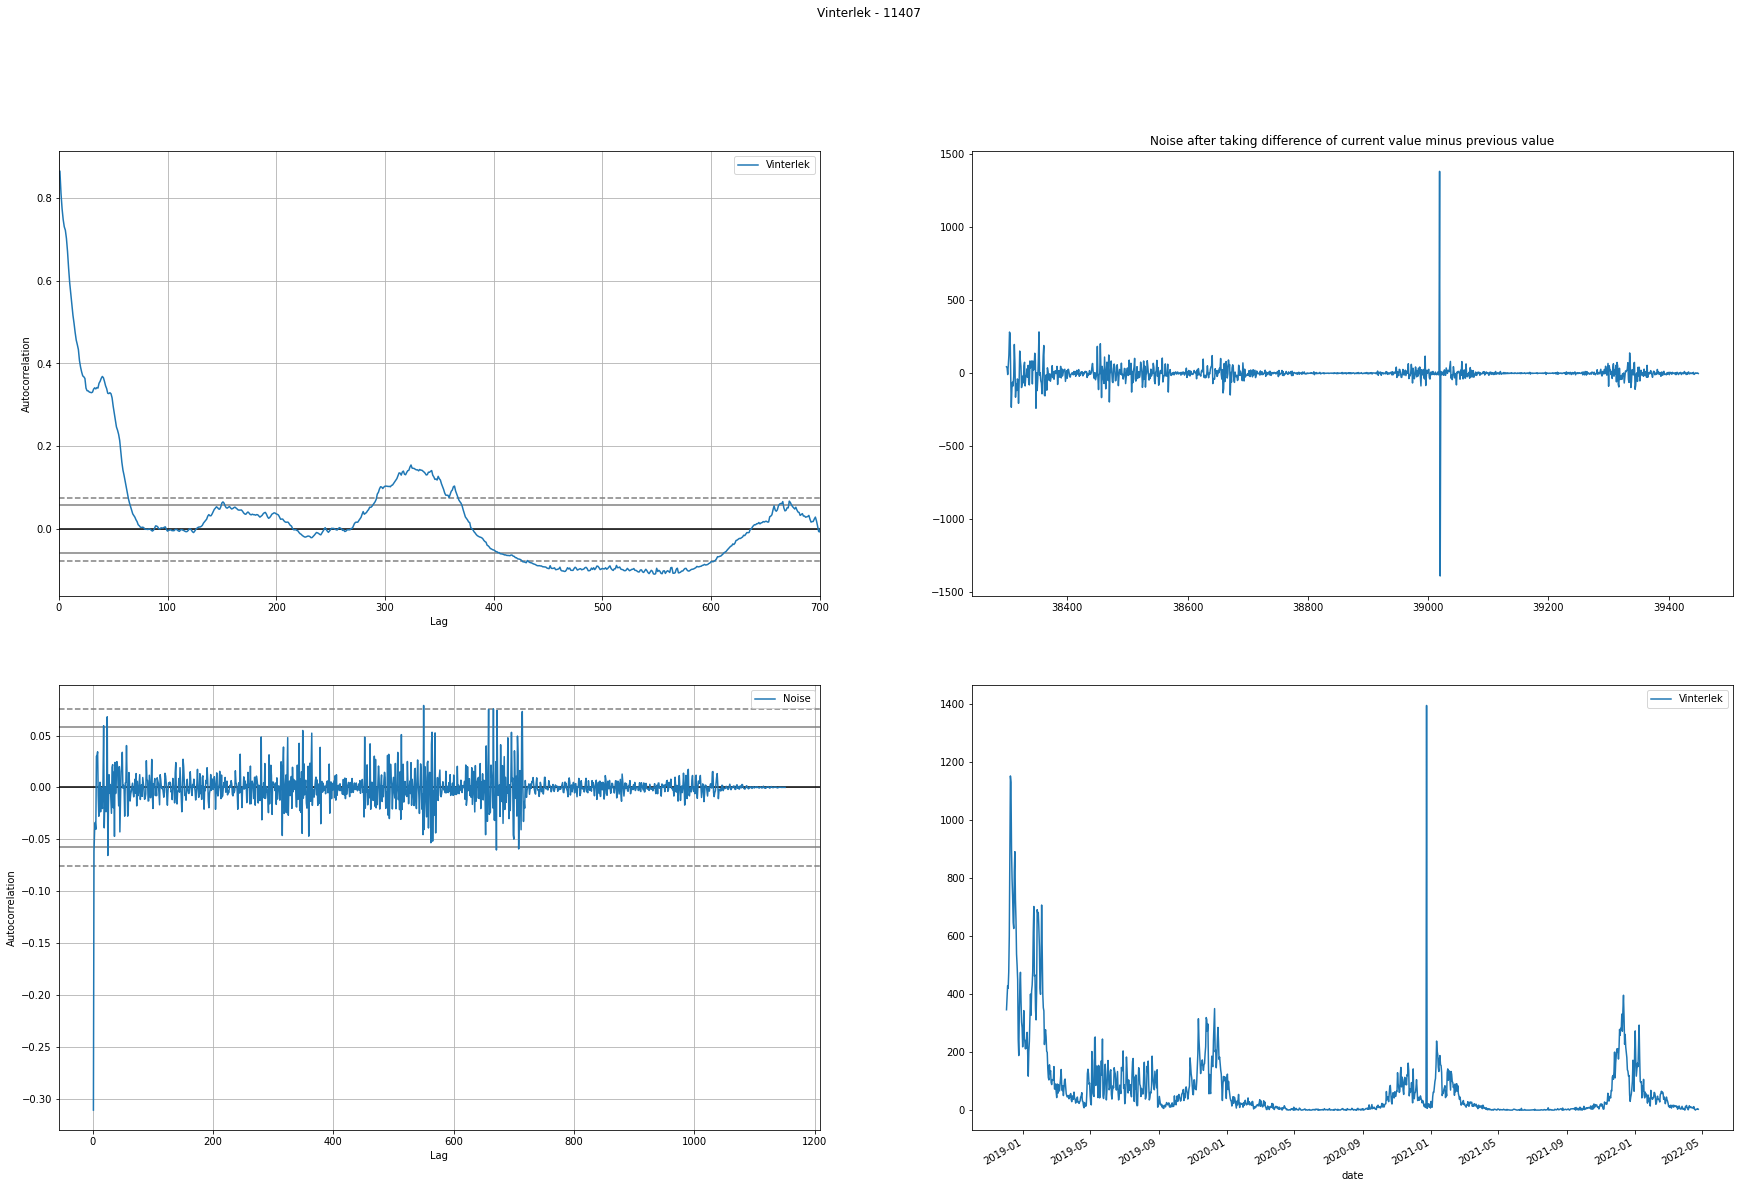

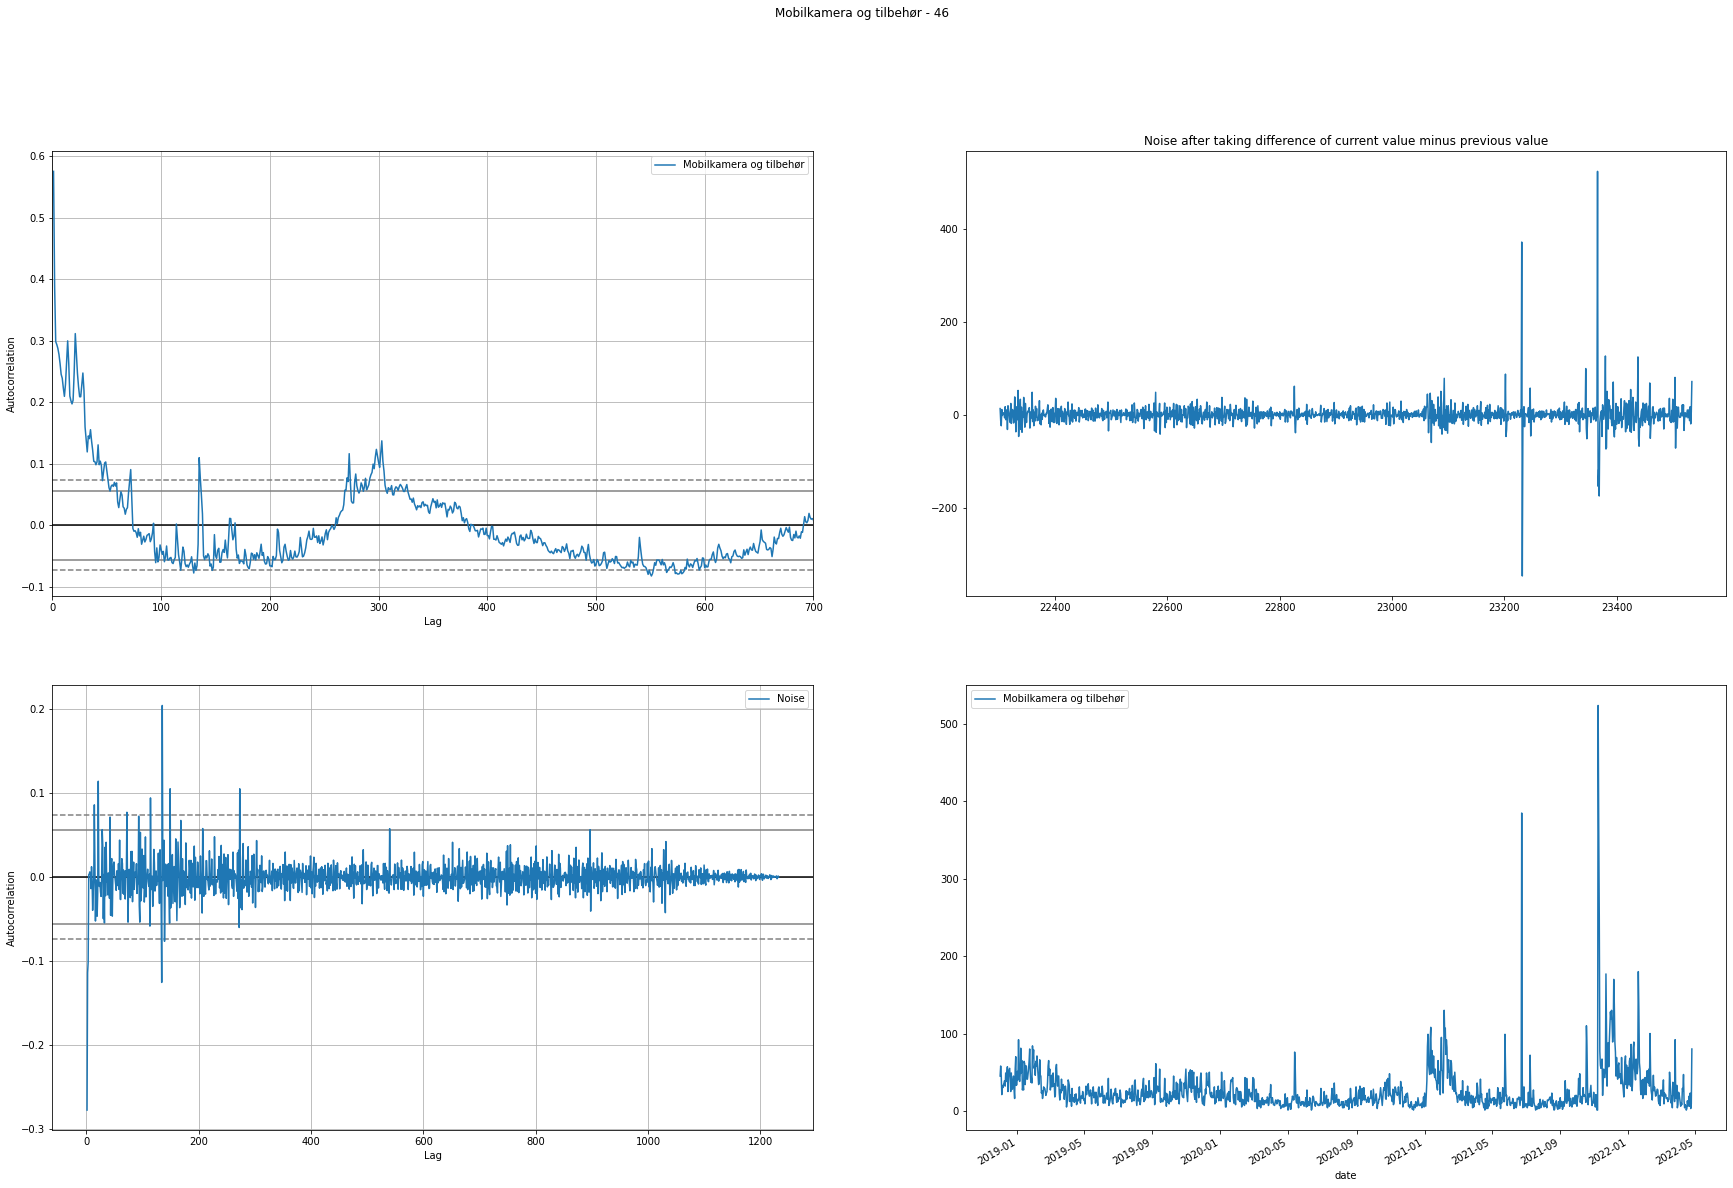

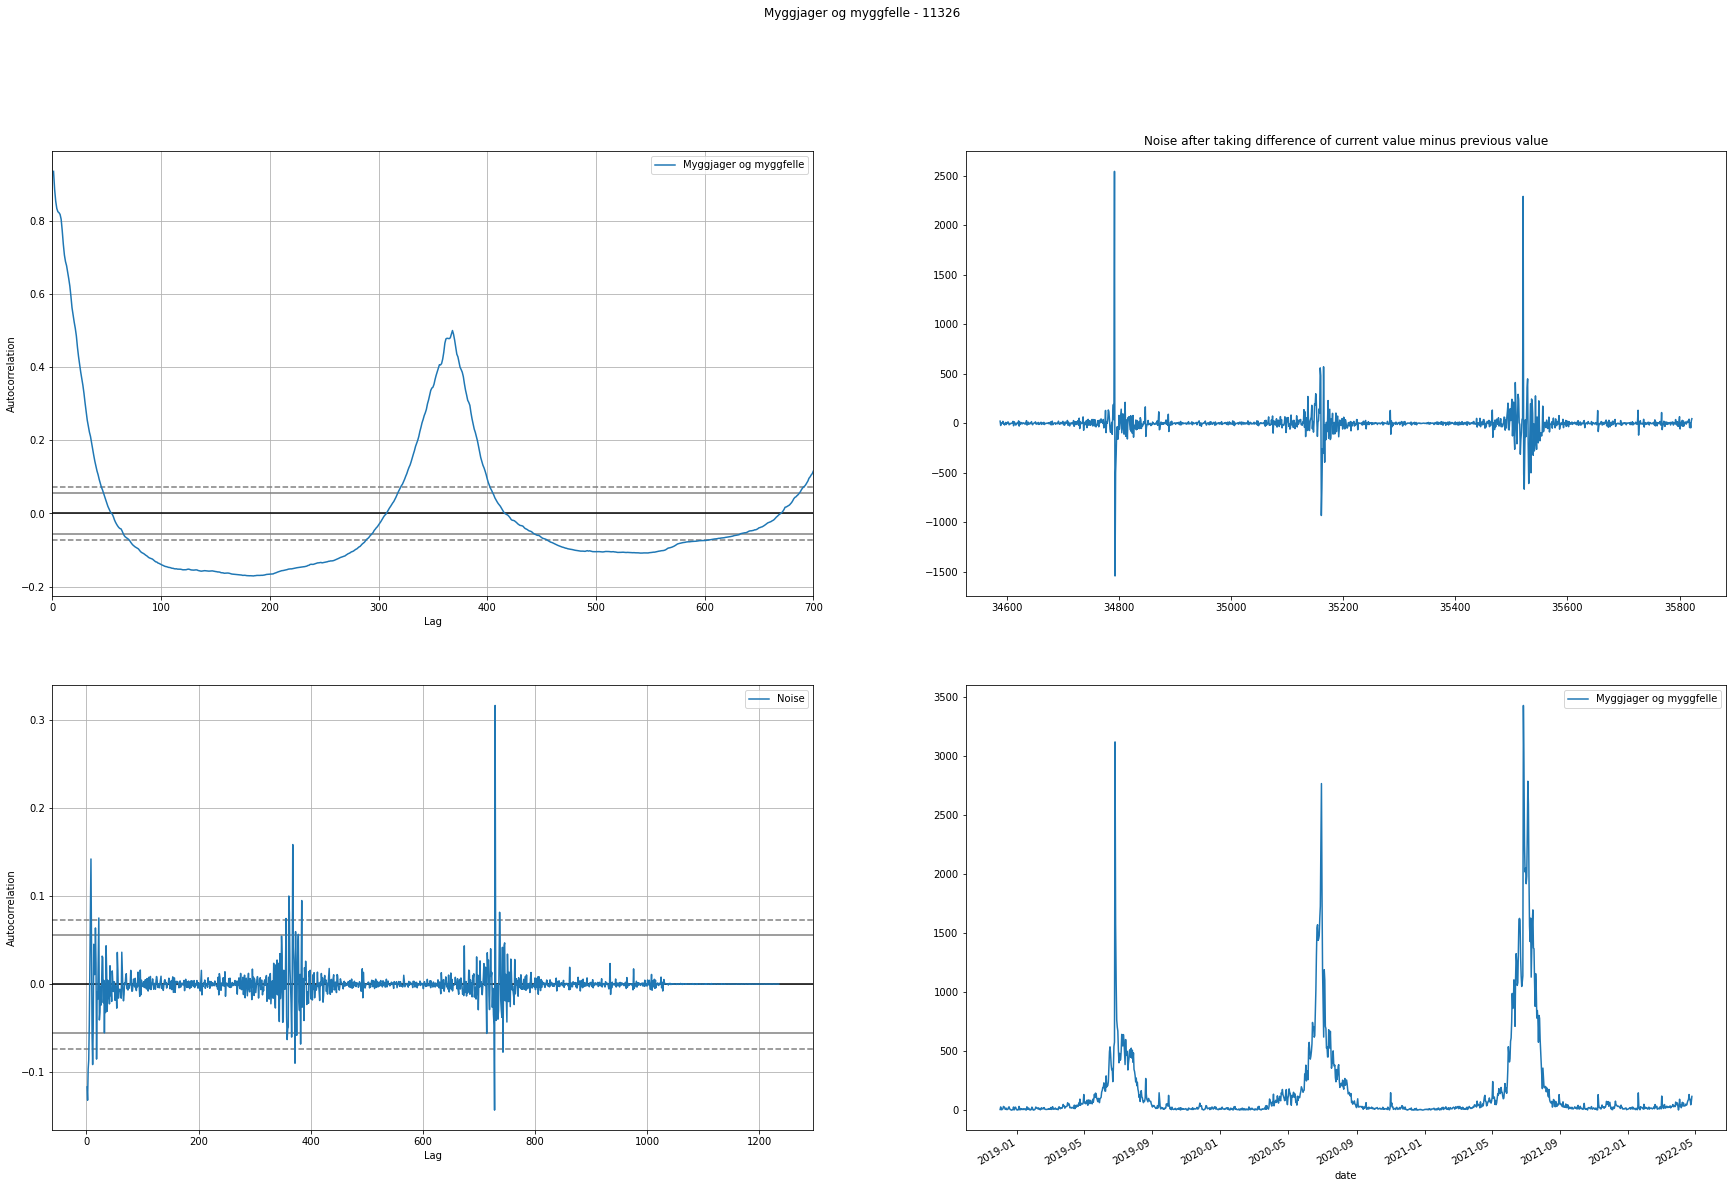

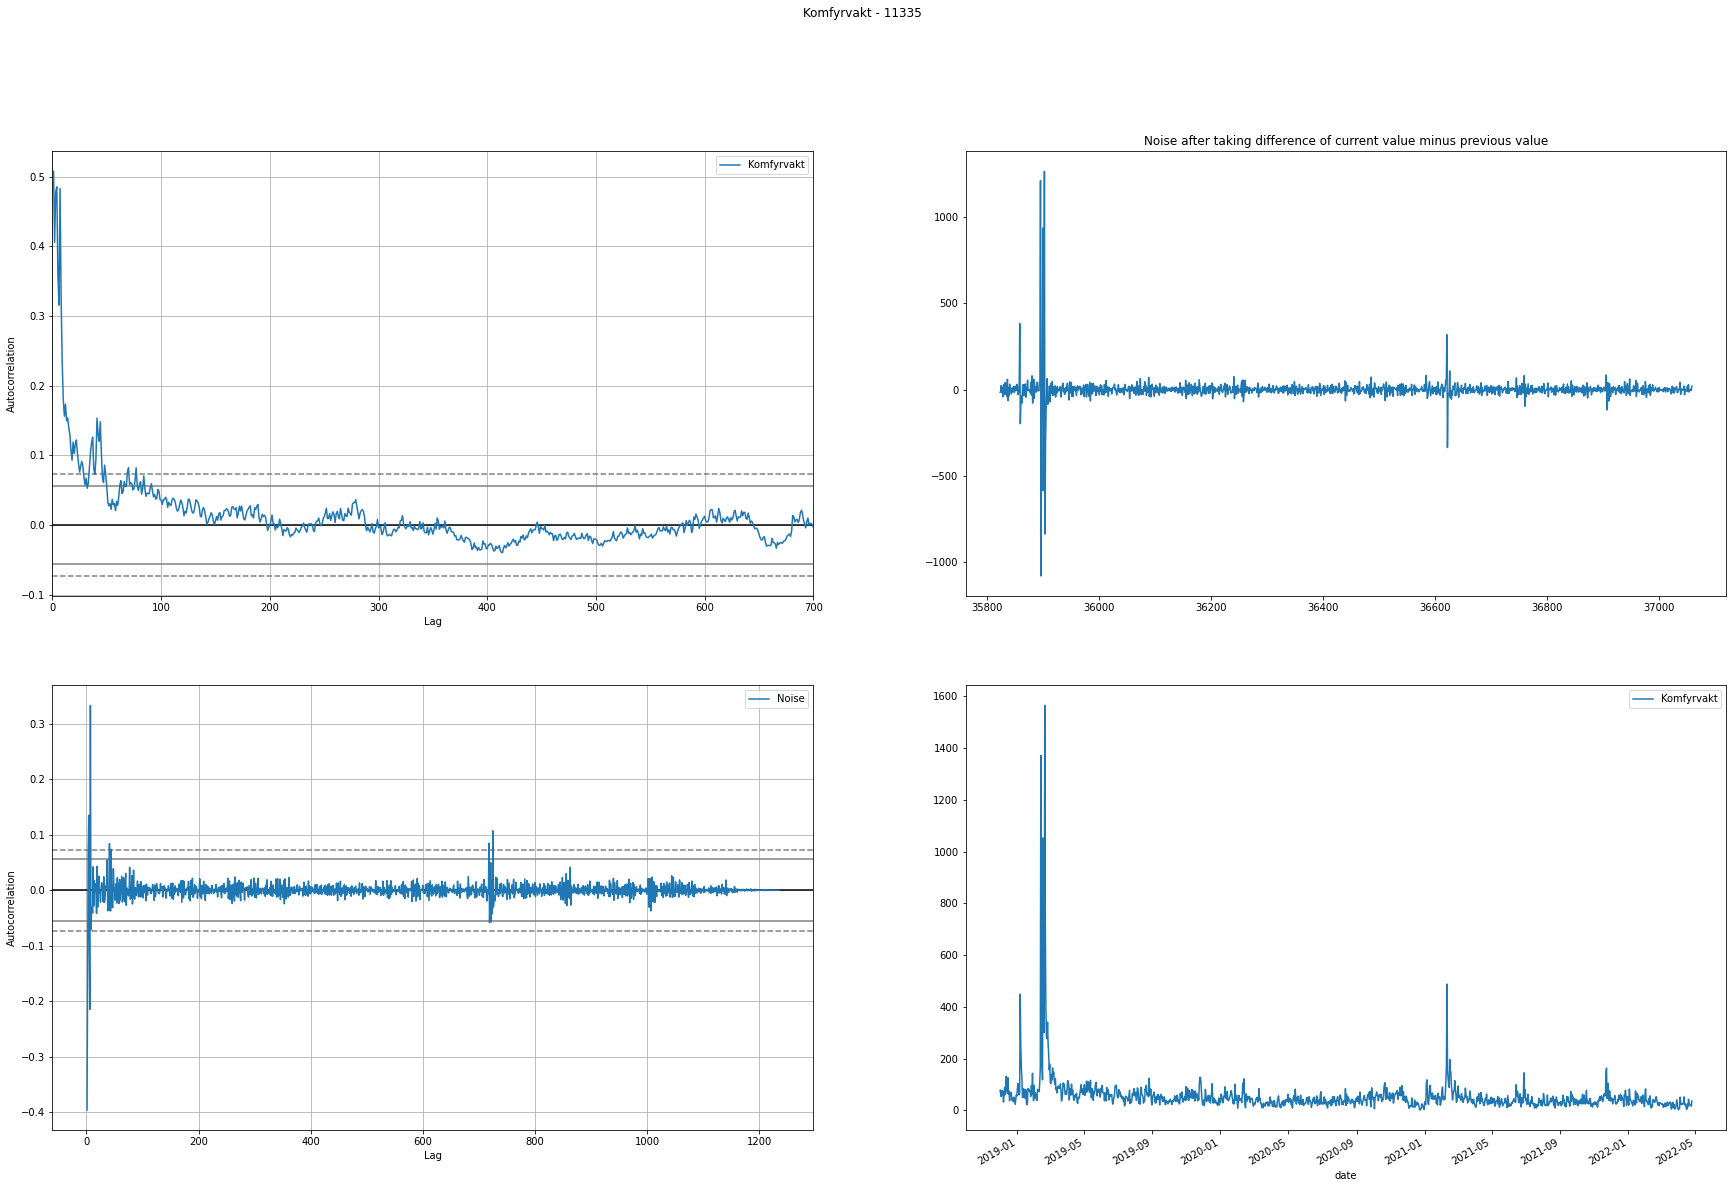

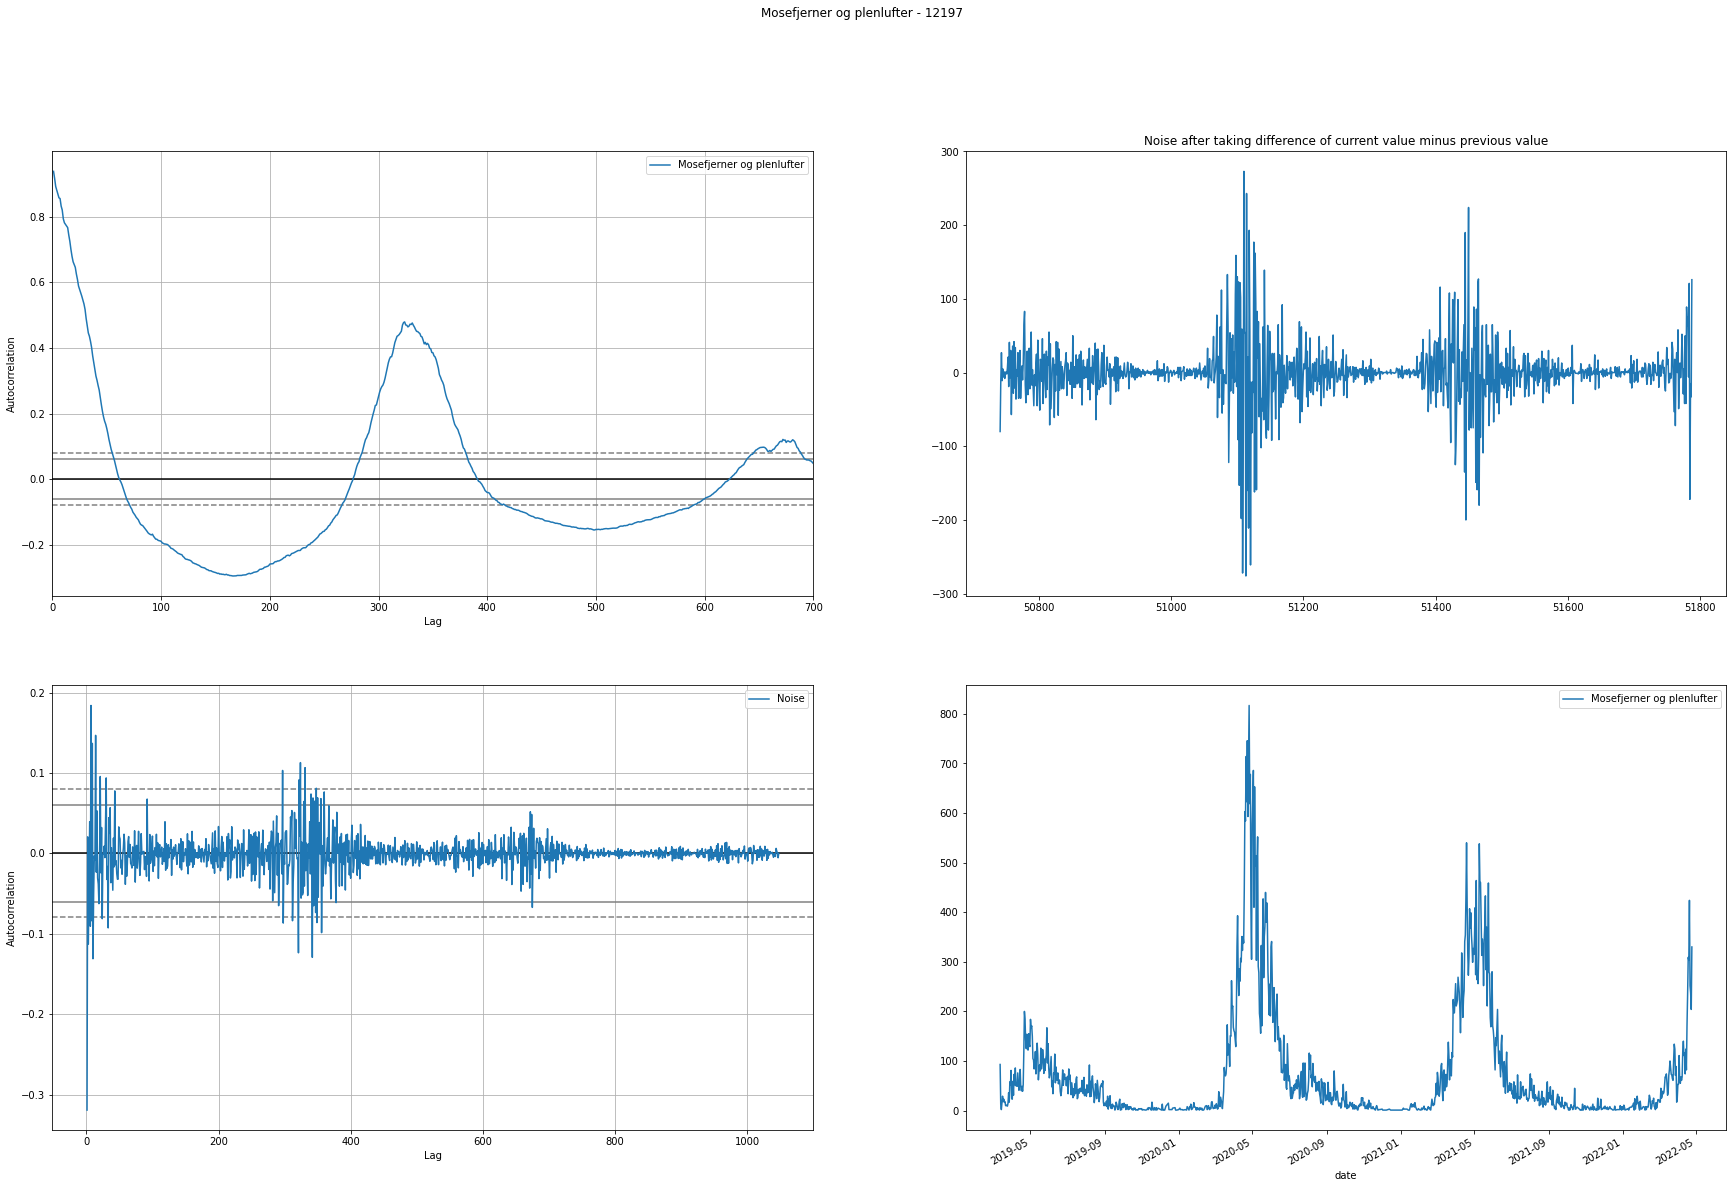

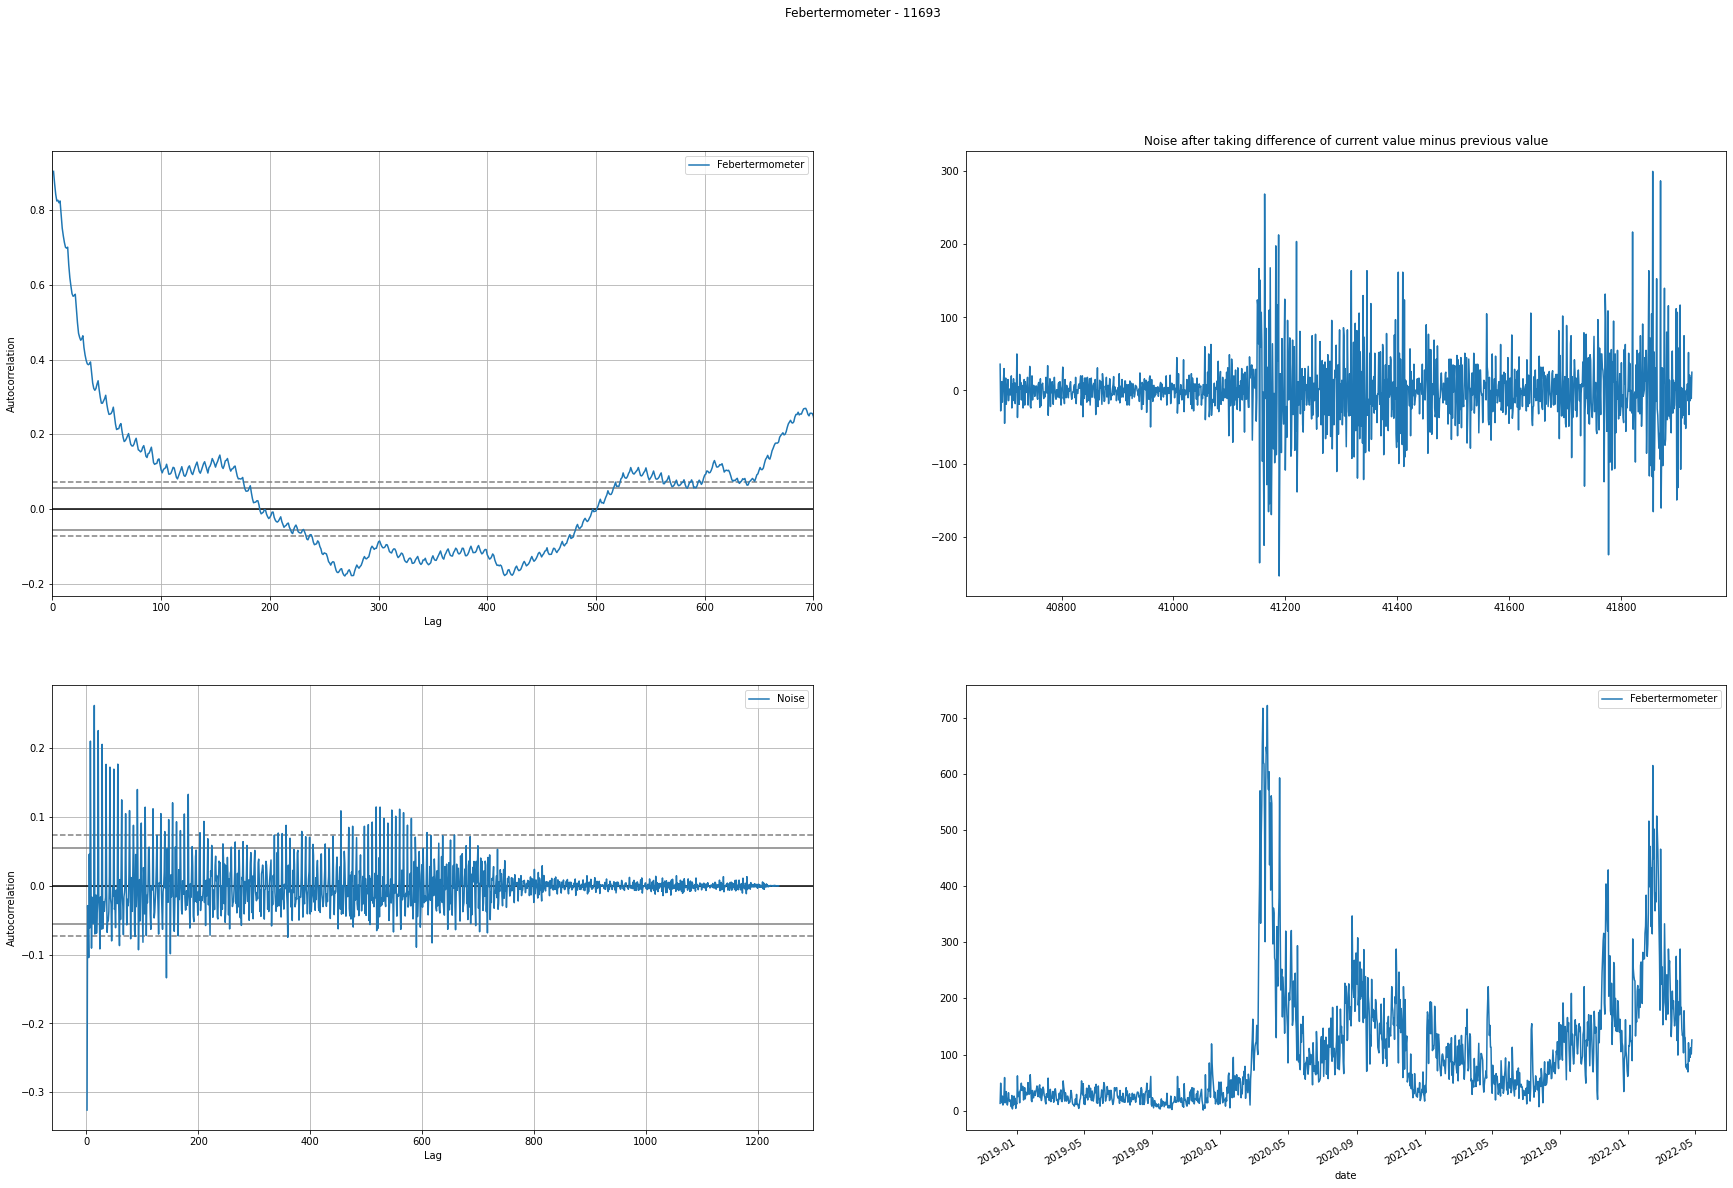

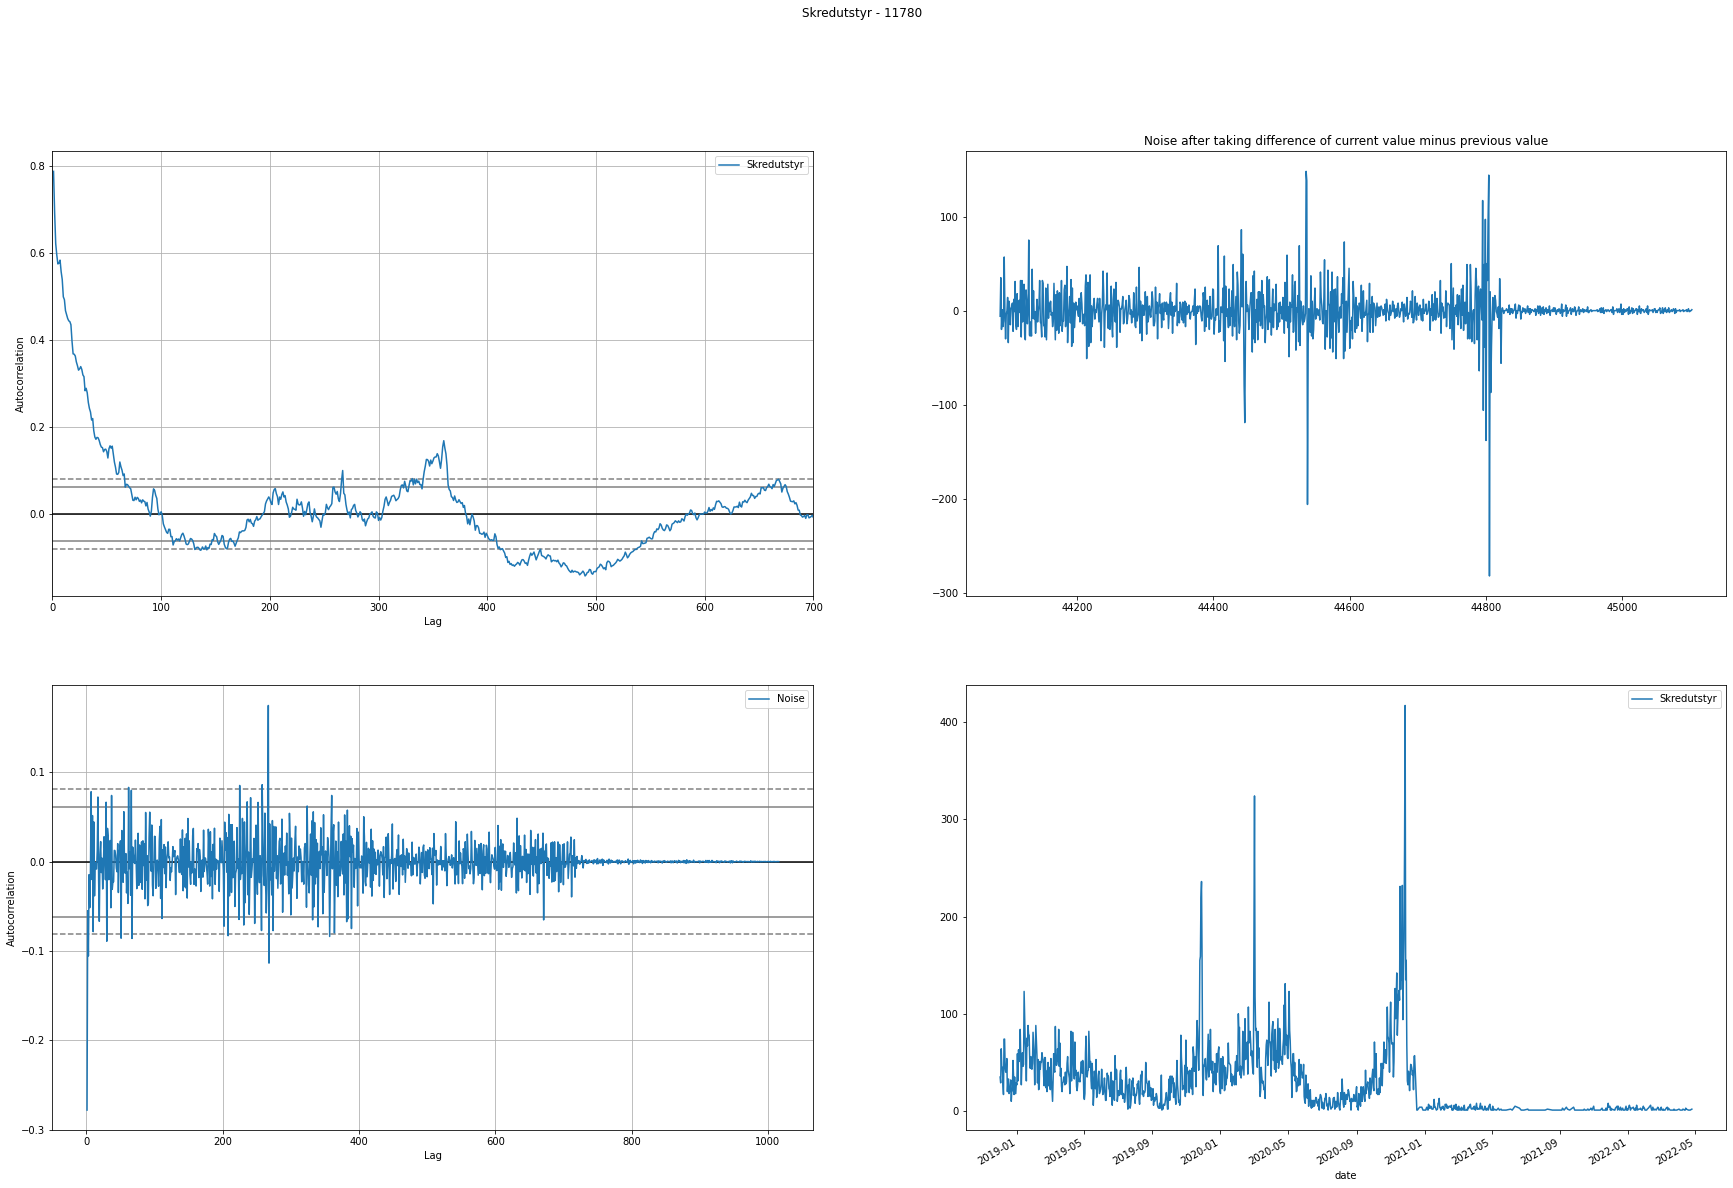

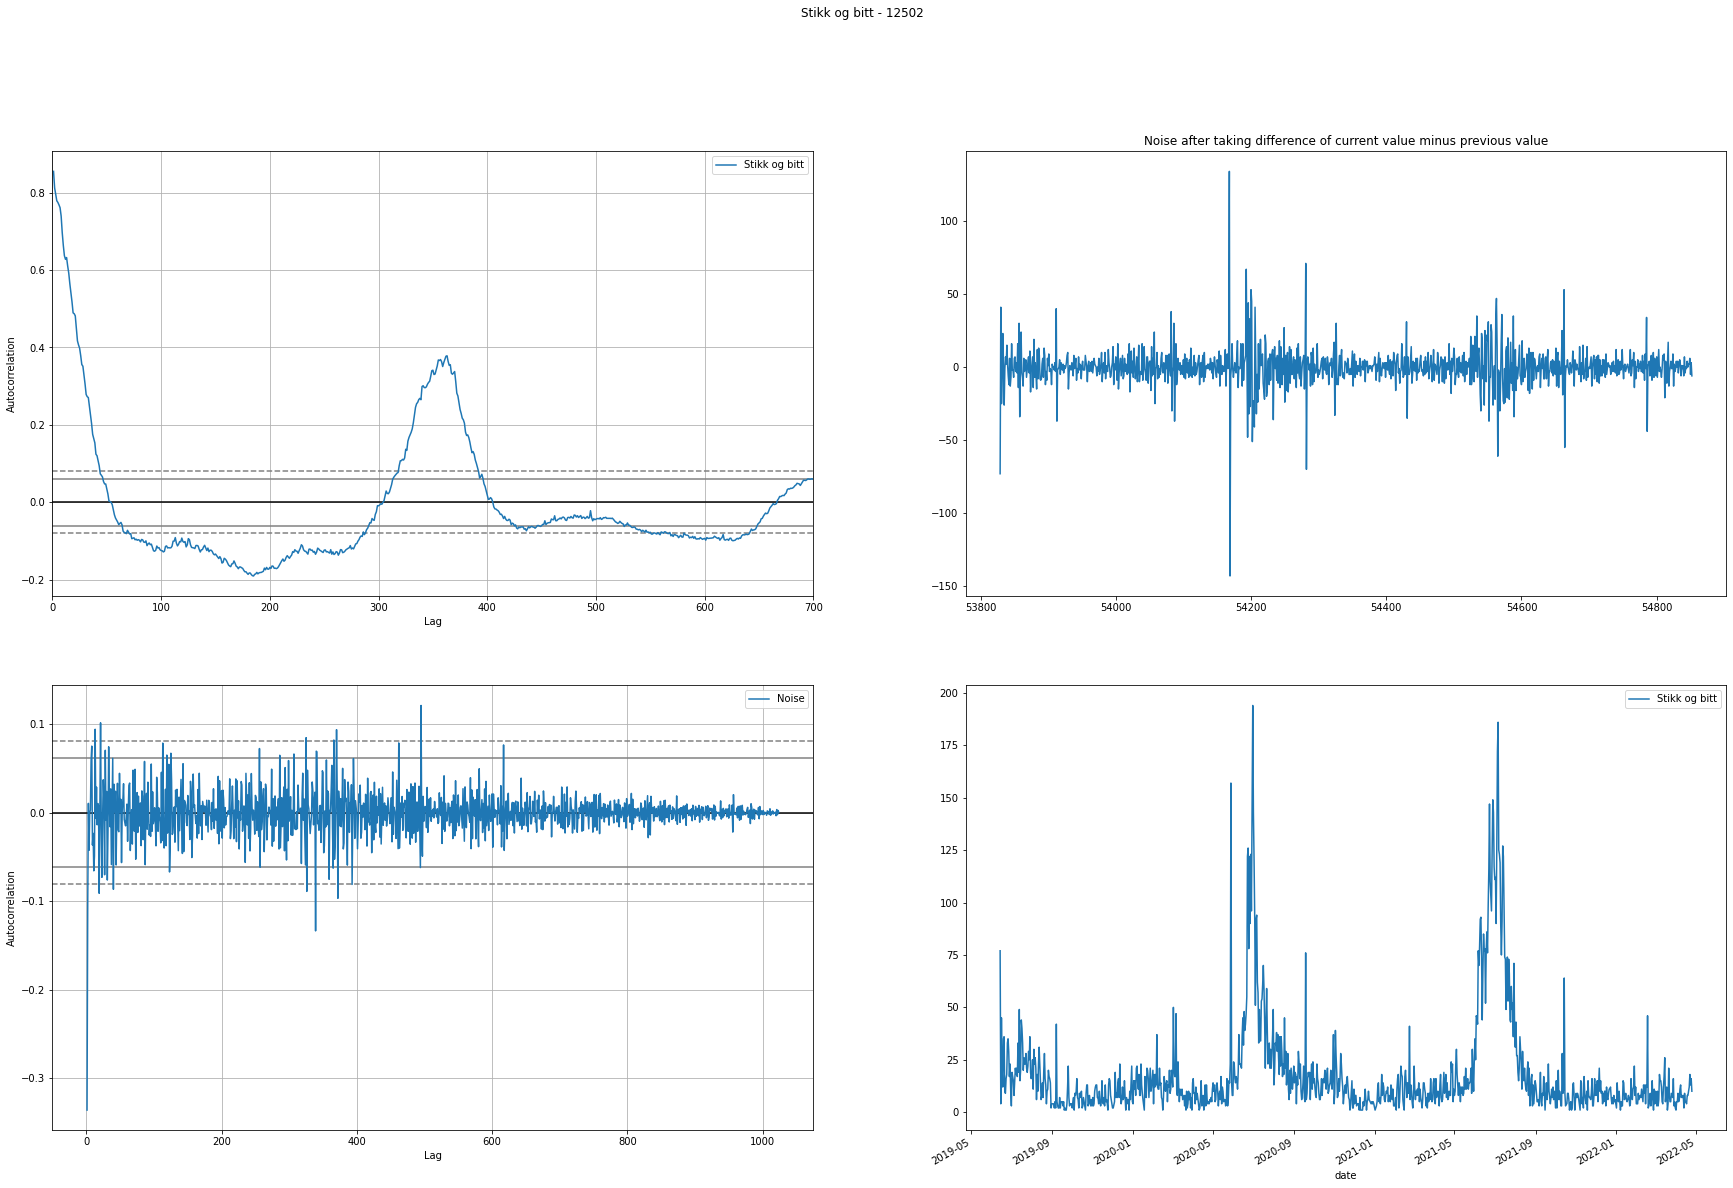

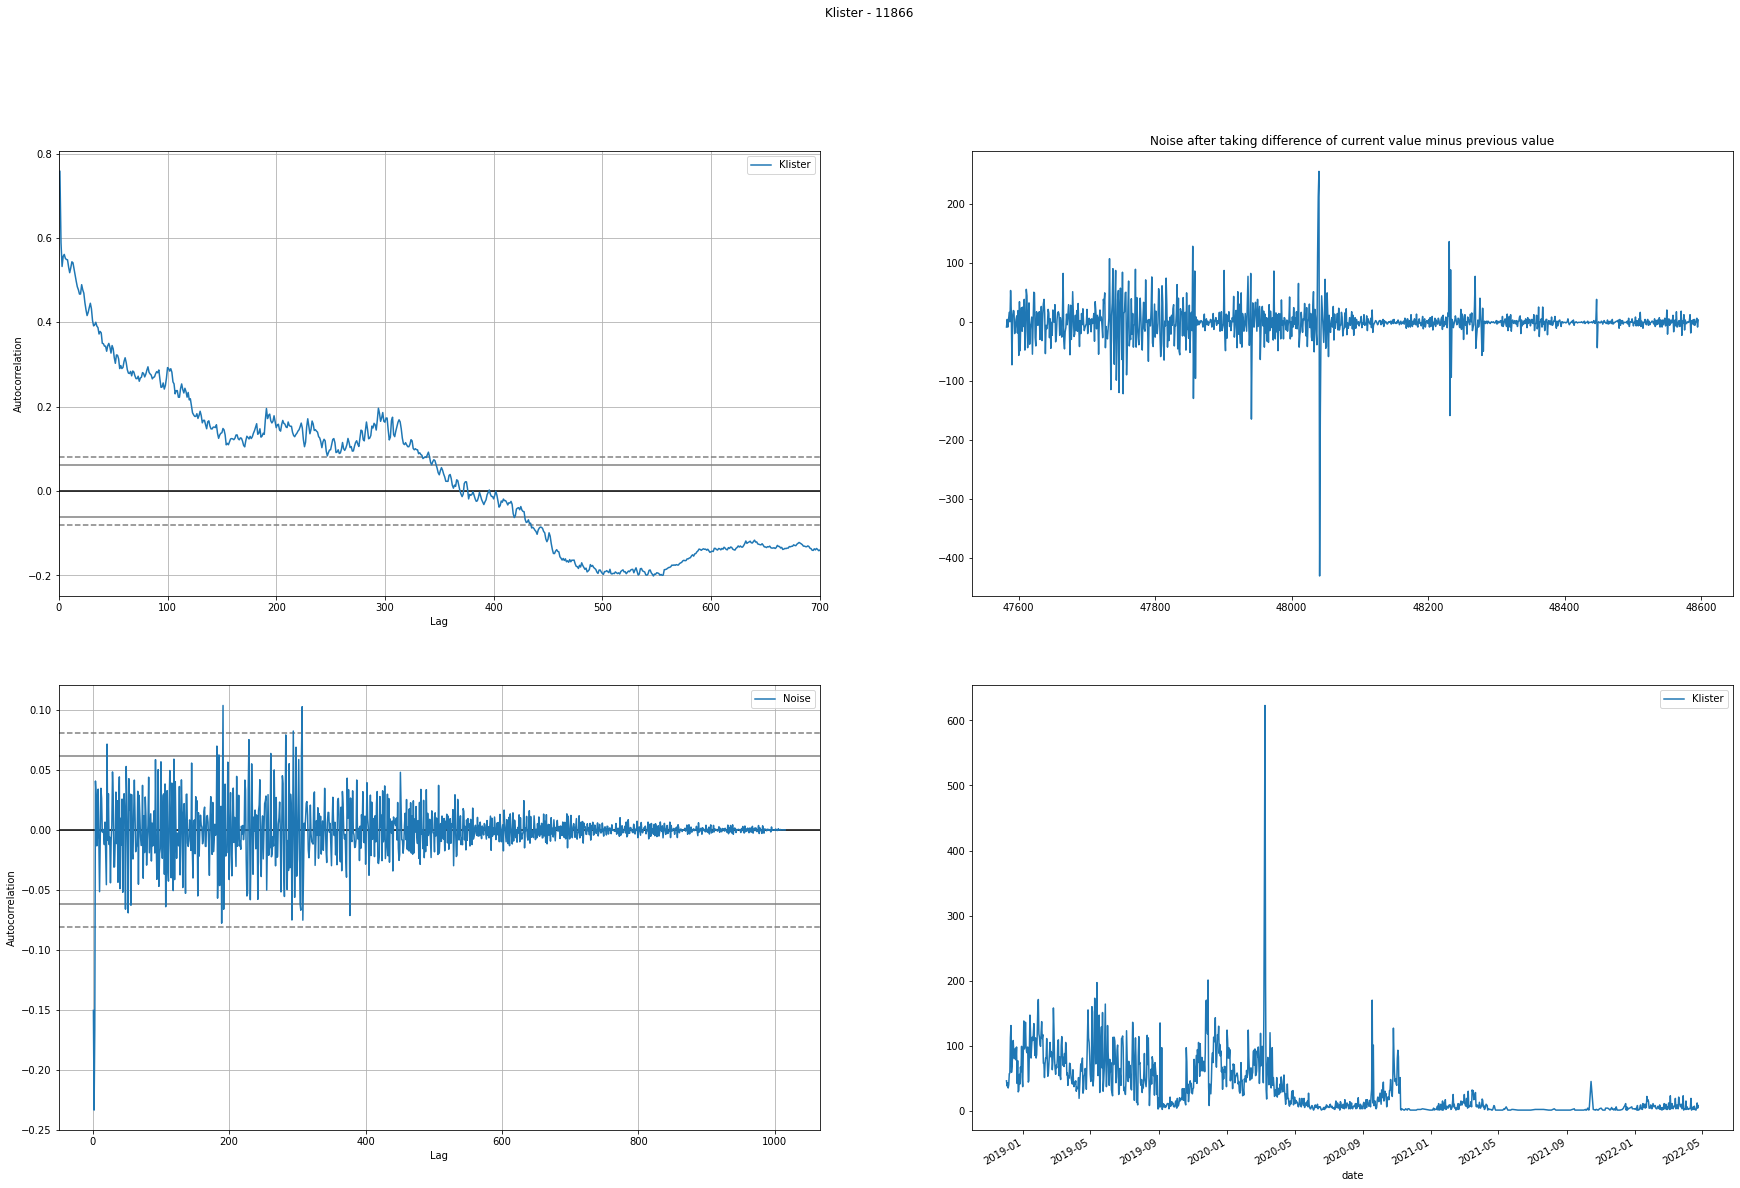

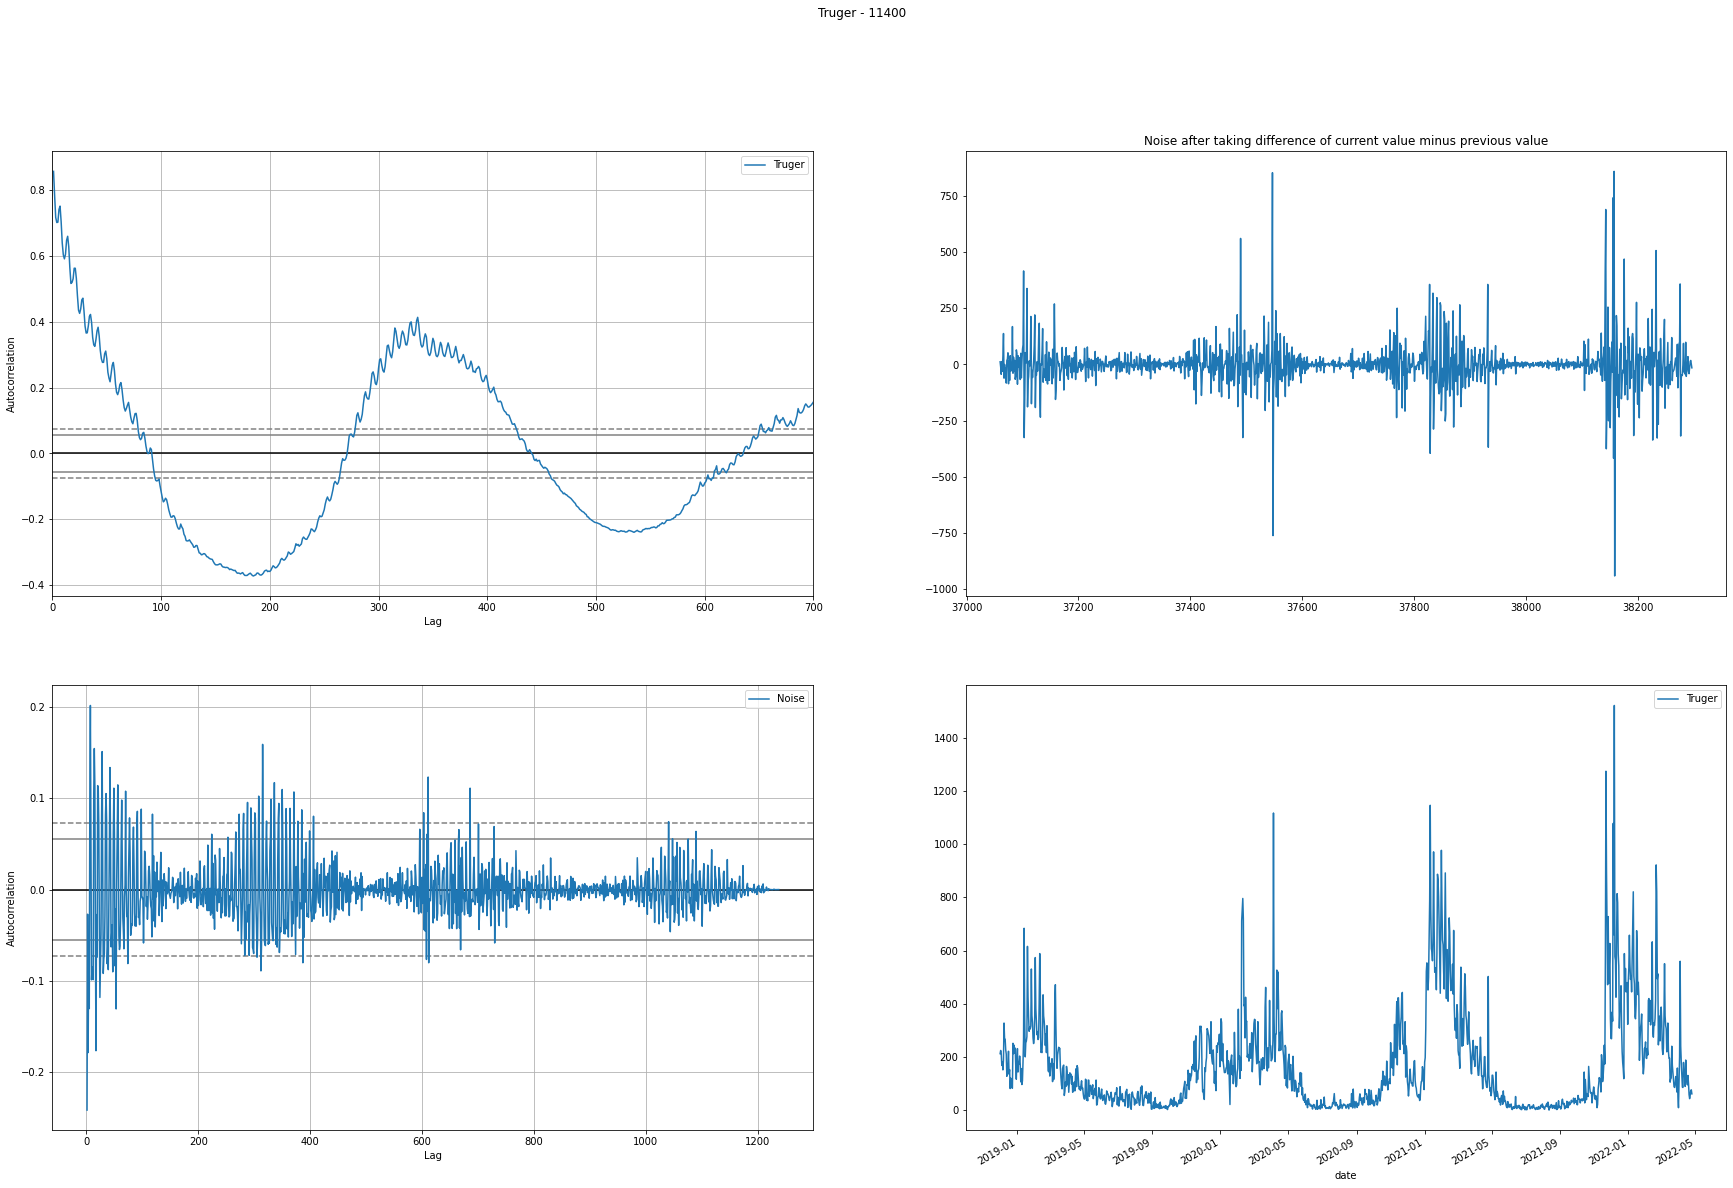

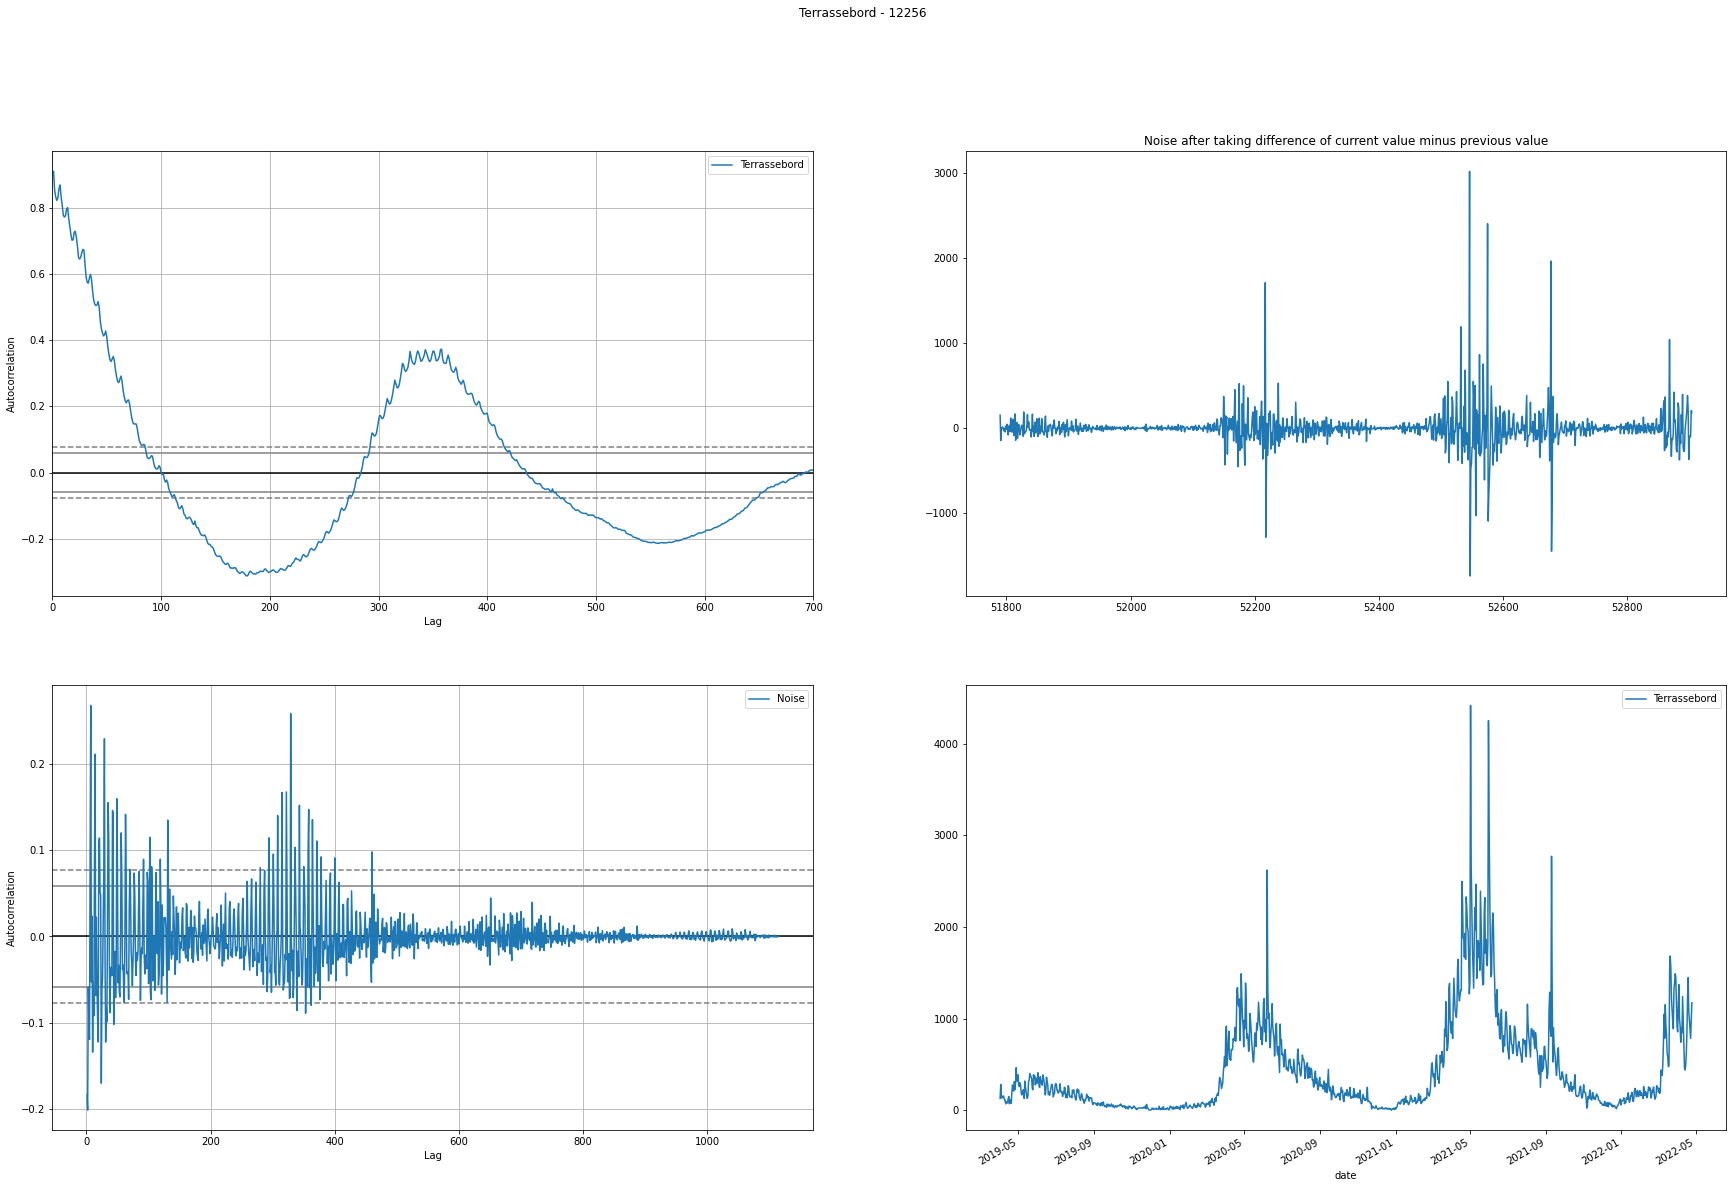

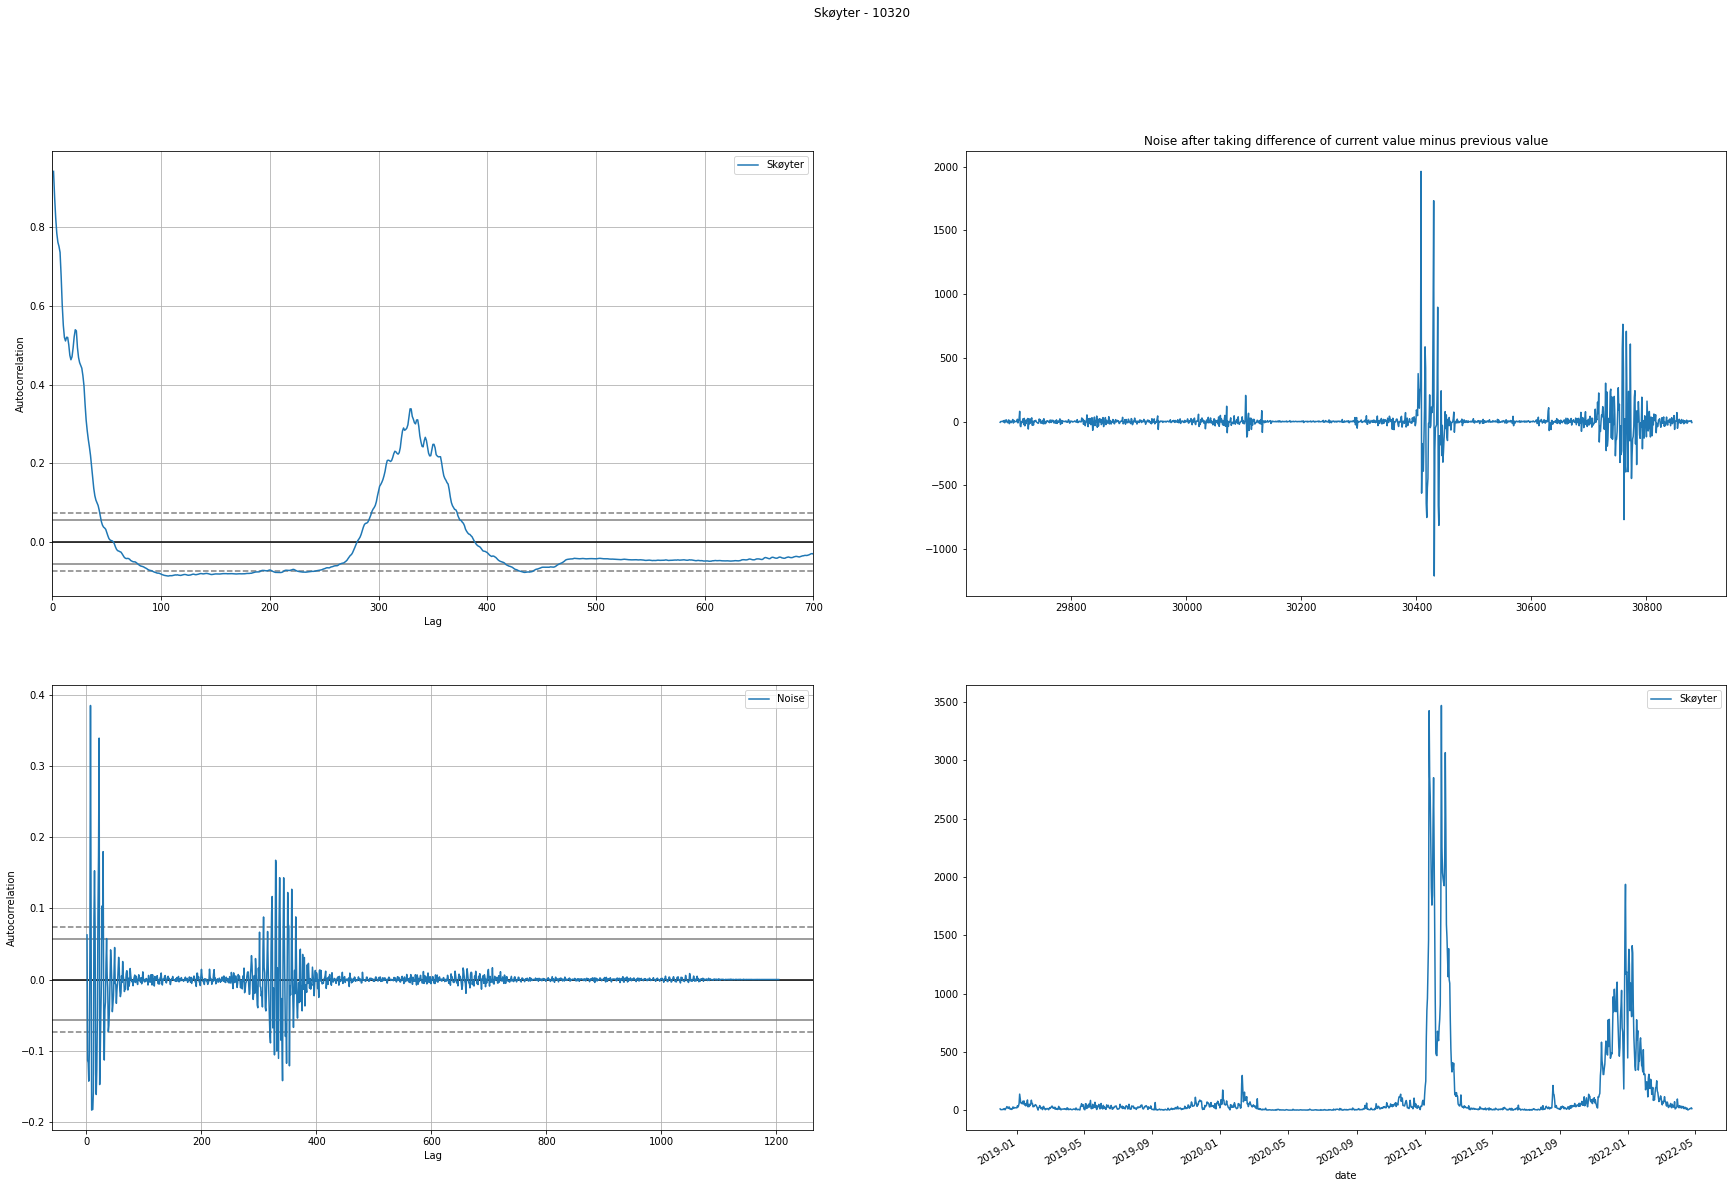

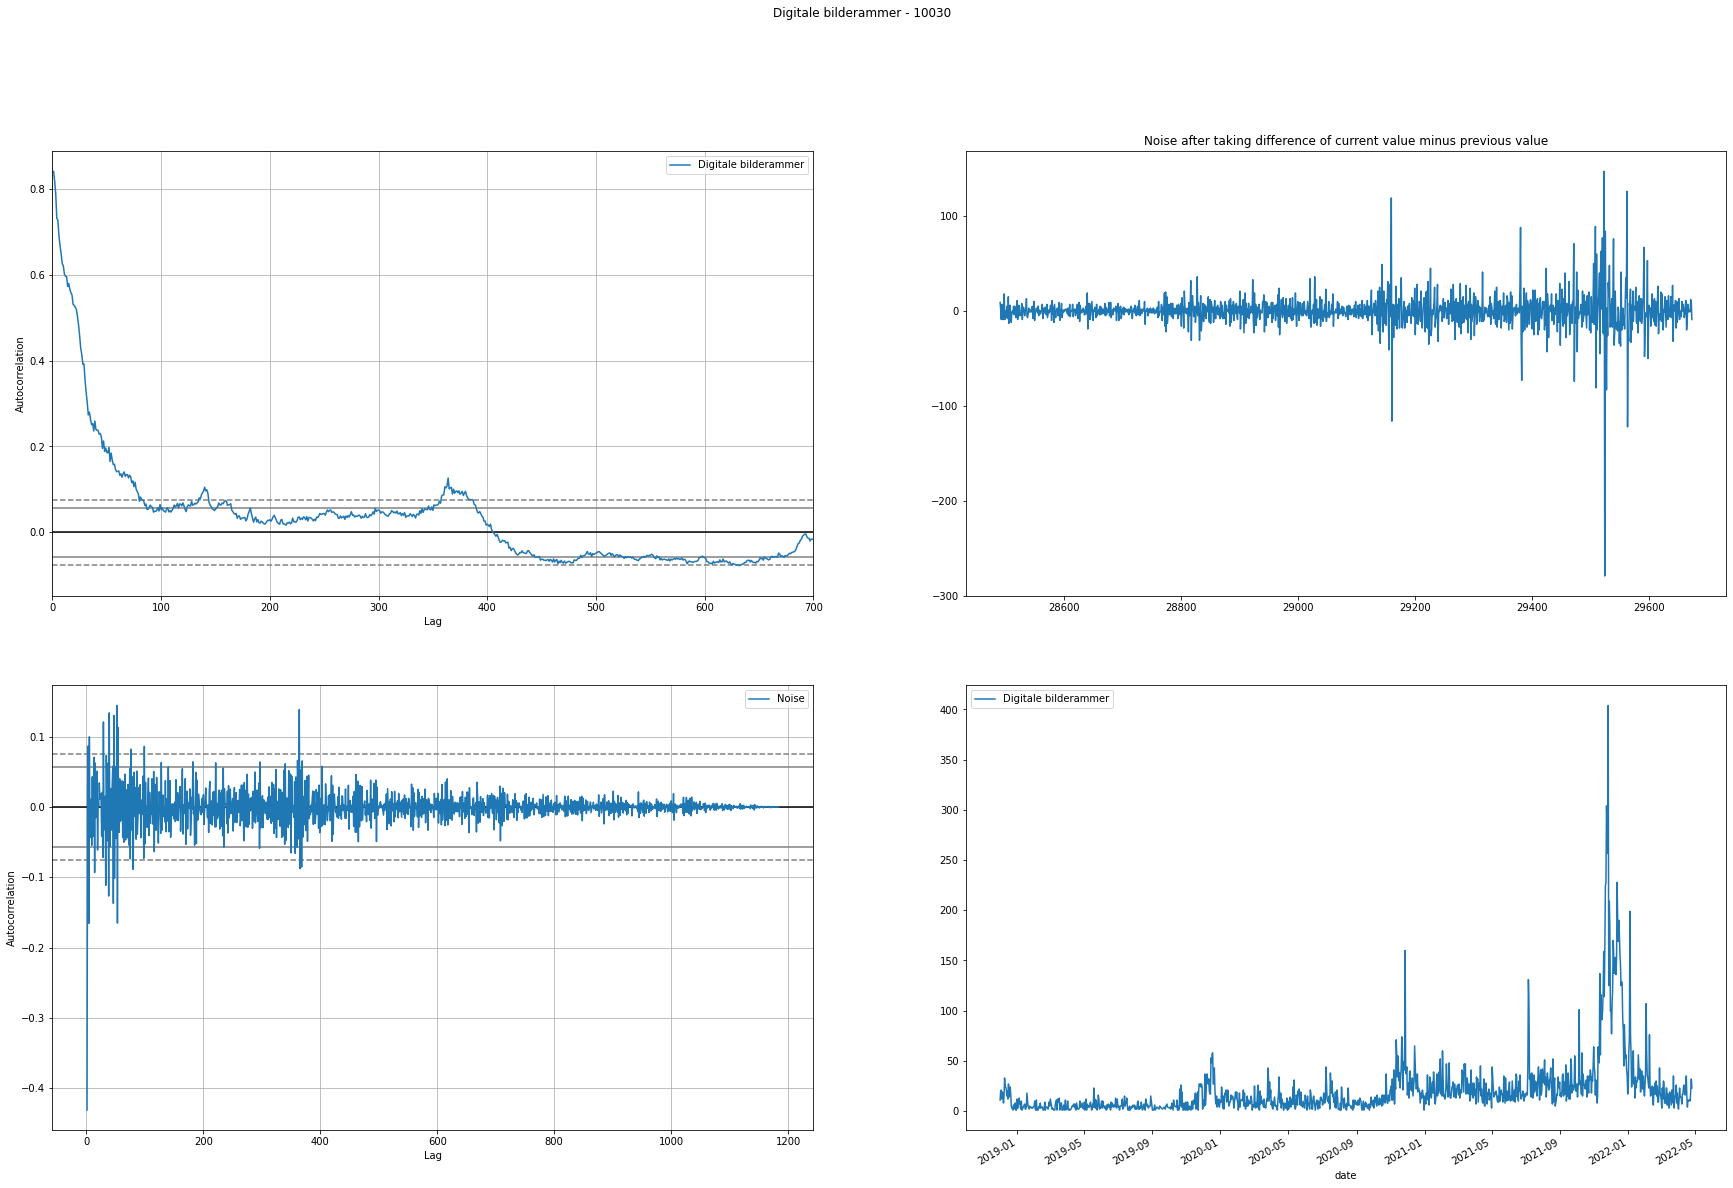

In [9]:
import numpy as np
pandas.plotting.autocorrelation_plot(data[data["cat_id"] == 2]["interest"])
for cat in corr_categories + seasonal_categories + non_corr_categories:
  cat_name = category_id_to_names_map[cat] if cat in category_id_to_names_map else cat
  filtered = data[data["cat_id"] == cat]
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
  filtered.plot(x="date", y="interest", label=cat_name, ax=axes[1, 1])
  fig.suptitle(cat_name + " - " + str(cat))
  ax = pandas.plotting.autocorrelation_plot(filtered["interest"], label=cat_name, ax=axes[0,0]).set_xlim([0, 700])
  # Plot random walk. 
  walk_diff = filtered["interest"].diff().dropna()
  diff_series = np.array(walk_diff)
  diff = []
  for i in range(1, len(diff_series)):
    value = diff_series[i] - diff_series[i-1]
    diff.append(value)
  walk_diff.plot(title="Noise after taking difference of current value minus previous value", label="Noise", ax=axes[0, 1])
  pandas.plotting.autocorrelation_plot(walk_diff, label="Noise", ax=axes[1, 0])

## Dicky-Fuller test
"
If the found slope (β) is equal to 0, the series is a random walk. If the slope is significantly different from 0, we reject the null hypothesis that the series follows a random walk.
"

We look at the p-value, which is ~0.26. Since 0.05 is the significance threshold, we fail to reject the null hypothesis that drifty_walk is a random walk, i.e., it is a random walk.

1. If ADF statistics < critical calues => Reject the null hypothesis (it is stationary)
2. if ADF statistics > critical values => failed to reject the null hypothosis

In [10]:
def df_test(df):
  filtered = df
  dicky_fuller_test = adfuller(filtered, autolag='AIC')
  print(f"catregory: {cat}, {category_id_to_names_map[cat] if cat in category_id_to_names_map else cat}")
  print(
        f"p-value: {dicky_fuller_test[1]}\n",
        f"ADF Statistic: {dicky_fuller_test[0]}\n",
  )
  for key, value in dicky_fuller_test[4].items():
    print(f"Critical value for {key} at {dicky_fuller_test[1]}: {value}")
  print("\n")
  return {
    "Category_name": category_id_to_names_map[cat] if cat in category_id_to_names_map else cat, 
    "p-value": dicky_fuller_test[1],
     "ADF Statistic": dicky_fuller_test[0],
     "Critical value for '1%':": dicky_fuller_test[4]['1%'],
     "Critical value for '5%':": dicky_fuller_test[4]['5%'],
     "Critical value for '10%':": dicky_fuller_test[4]['10%'],}

In [11]:
for cat in seasonal_categories + corr_categories:
  filtered = data[data["cat_id"] == cat]["interest"]
  df_test(filtered)

catregory: 12322, Vinterjakke
p-value: 0.0014894758675467602
 ADF Statistic: -3.985299167010872

Critical value for 1% at 0.0014894758675467602: -3.4375326734225844
Critical value for 5% at 0.0014894758675467602: -2.8647108493902986
Critical value for 10% at 0.0014894758675467602: -2.568458364370556


catregory: 11428, Vintersko
p-value: 0.010184246314207645
 ADF Statistic: -3.423472673580219

Critical value for 1% at 0.010184246314207645: -3.4357258193266365
Critical value for 5% at 0.010184246314207645: -2.863913913276725
Critical value for 10% at 0.010184246314207645: -2.5680339084067483


catregory: 11850, Langrennski
p-value: 0.004991998217246862
 ADF Statistic: -3.642893806838956

Critical value for 1% at 0.004991998217246862: -3.435739110194116
Critical value for 5% at 0.004991998217246862: -2.863919777127088
Critical value for 10% at 0.004991998217246862: -2.5680370312770515


catregory: 11852, Skisko
p-value: 0.01858761570686953
 ADF Statistic: -3.224904498880646

Critical val

Result:
None of the P-values are below 0.05, which is required to reject the null hypothosis.
None of the time series are stationary.

## Decompose time series
We can decompose each series in into its trend, seasonality and residuals (rest).
Then we can use the dicky-fuller test on the residuals to check if the series is stationary.
If the p-value is < 0.05 it is stationary.
Results: The risiduals are mostly stationary

catregory: 2, Bærbar PC
p-value: 0.0022227546164839424
 ADF Statistic: -3.875497892519278

Critical value for 1% at 0.0022227546164839424: -3.438039434877692
Critical value for 5% at 0.0022227546164839424: -2.8649342774762423
Critical value for 10% at 0.0022227546164839424: -2.5685773775887872


catregory: 6, Digitalkamera
p-value: 0.000752126730248339
 ADF Statistic: -4.165912928068649

Critical value for 1% at 0.000752126730248339: -3.4380213934599957
Critical value for 5% at 0.000752126730248339: -2.8649263237651375
Critical value for 10% at 0.000752126730248339: -2.5685731407954586


catregory: 9, Harddisk og SSD
p-value: 0.0010735524313233728
 ADF Statistic: -4.072859574906793

Critical value for 1% at 0.0010735524313233728: -3.43803040357387
Critical value for 5% at 0.0010735524313233728: -2.864930295955726
Critical value for 10% at 0.0010735524313233728: -2.568575256706284


catregory: 10, Hovedkort
p-value: 0.011777934894067501
 ADF Statistic: -3.376737013905601

Critical value

/tmp/ipykernel_13751/227163328.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5, 5))


catregory: 11852, Skisko
p-value: 0.062167196532061784
 ADF Statistic: -2.7734518013908875

Critical value for 1% at 0.062167196532061784: -3.43803040357387
Critical value for 5% at 0.062167196532061784: -2.864930295955726
Critical value for 10% at 0.062167196532061784: -2.568575256706284


catregory: 273, Varmeovn
p-value: 0.002670072656161302
 ADF Statistic: -3.8241076008713955

Critical value for 1% at 0.002670072656161302: -3.438039434877692
Critical value for 5% at 0.002670072656161302: -2.8649342774762423
Critical value for 10% at 0.002670072656161302: -2.5685773775887872


catregory: 11036, Snøfreser
p-value: 0.010085260552313137
 ADF Statistic: -3.426586084652829

Critical value for 1% at 0.010085260552313137: -3.438039434877692
Critical value for 5% at 0.010085260552313137: -2.8649342774762423
Critical value for 10% at 0.010085260552313137: -2.5685773775887872


catregory: 11213, Snøskuffe
p-value: 0.0011301834207123995
 ADF Statistic: -4.059239821926122

Critical value for 1%

<Figure size 360x360 with 0 Axes>

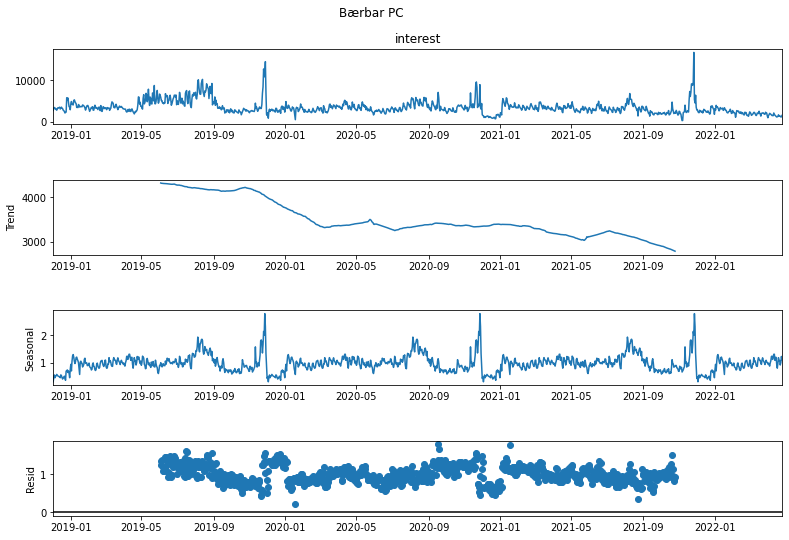

<Figure size 360x360 with 0 Axes>

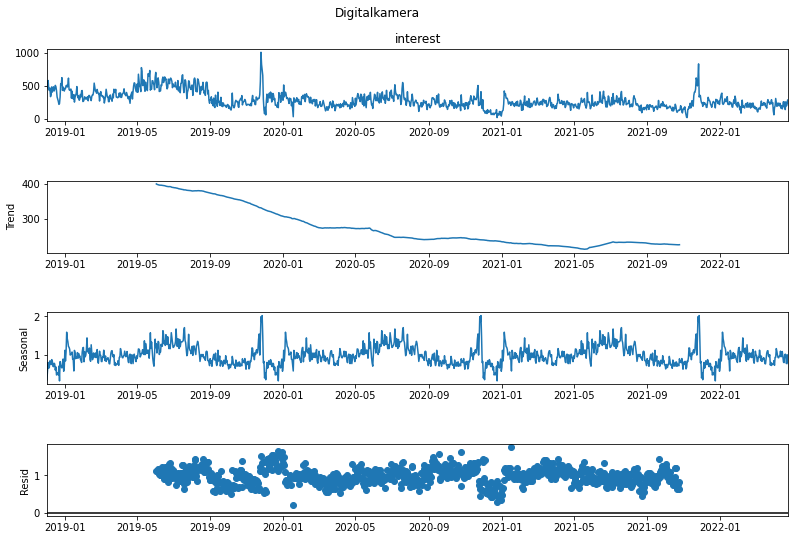

<Figure size 360x360 with 0 Axes>

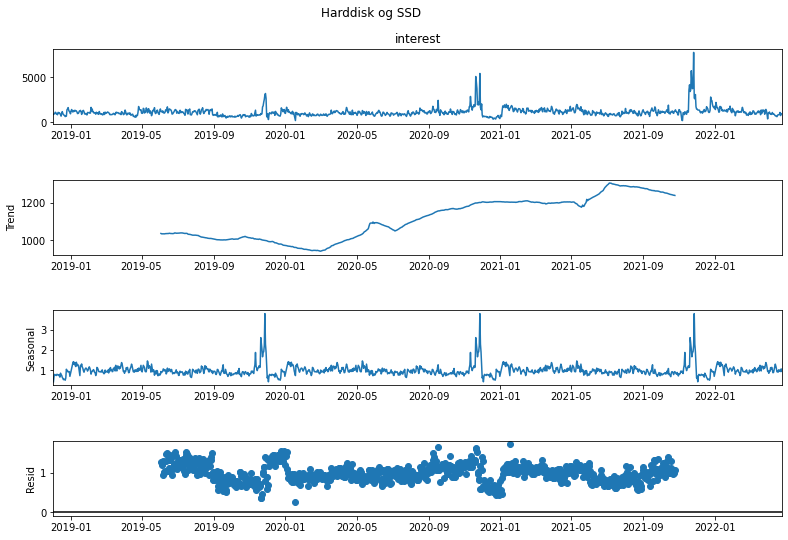

<Figure size 360x360 with 0 Axes>

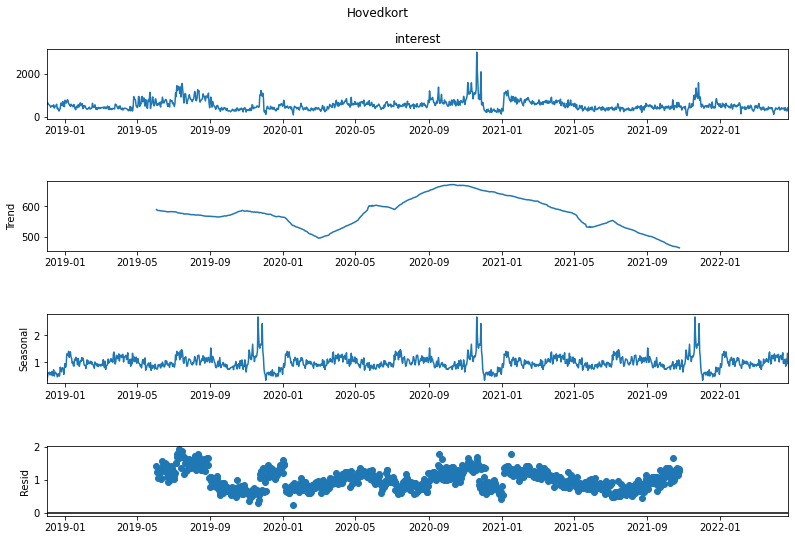

<Figure size 360x360 with 0 Axes>

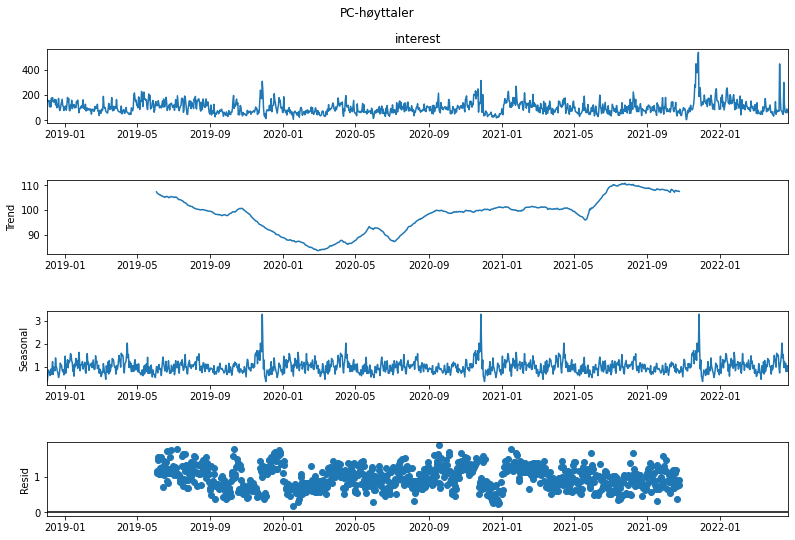

<Figure size 360x360 with 0 Axes>

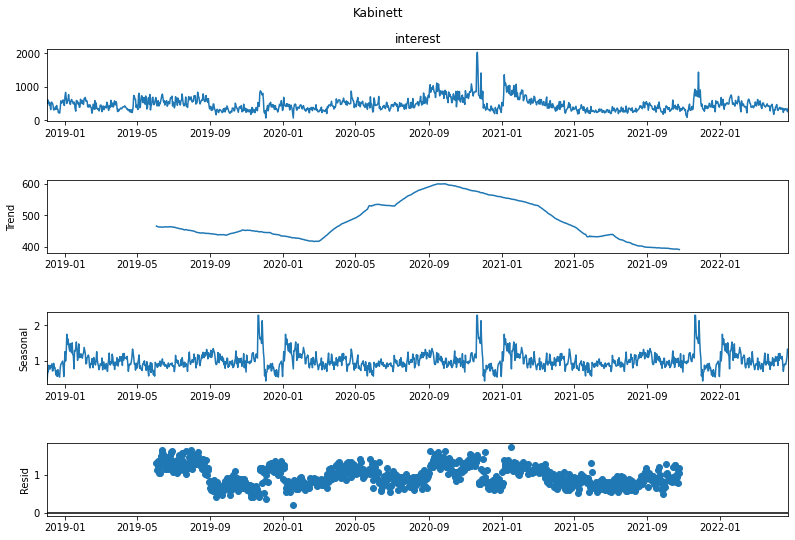

<Figure size 360x360 with 0 Axes>

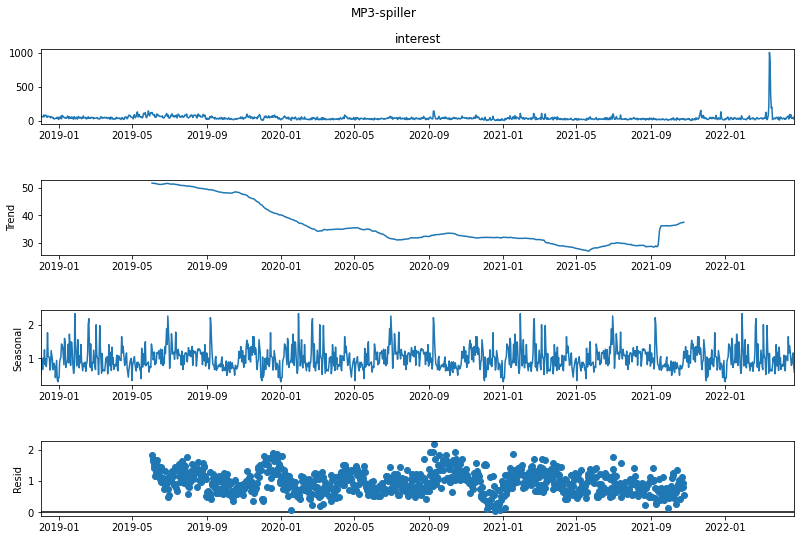

<Figure size 360x360 with 0 Axes>

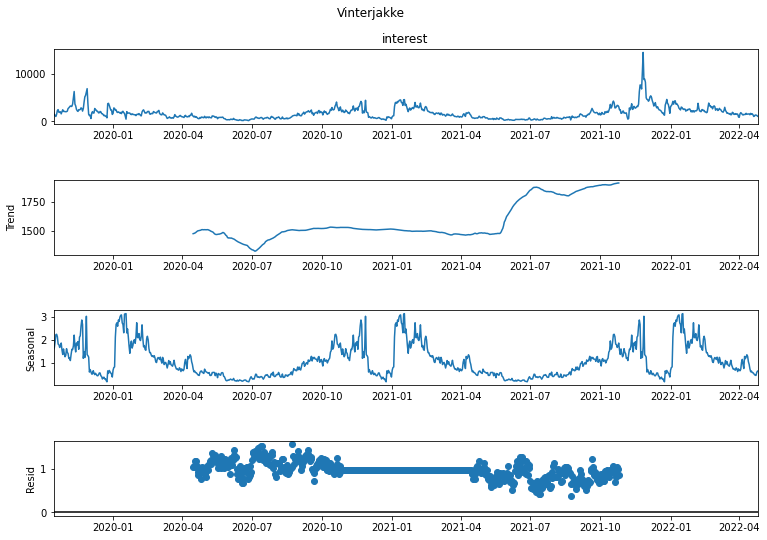

<Figure size 360x360 with 0 Axes>

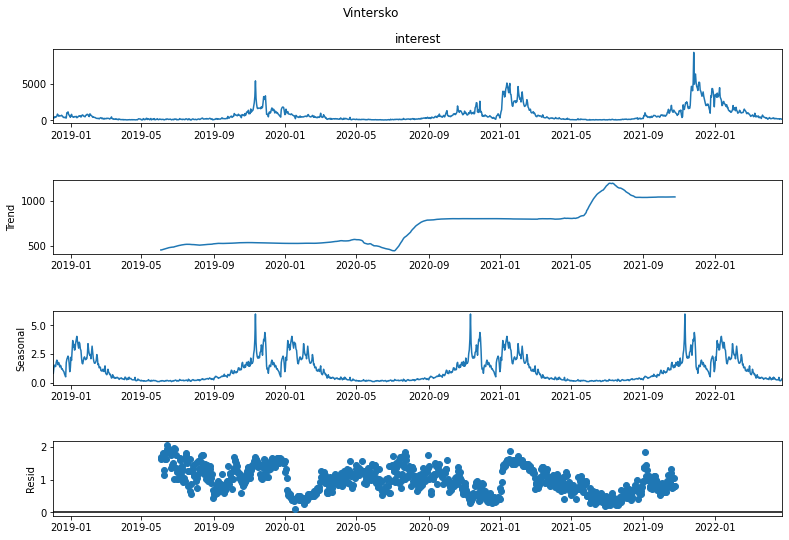

<Figure size 360x360 with 0 Axes>

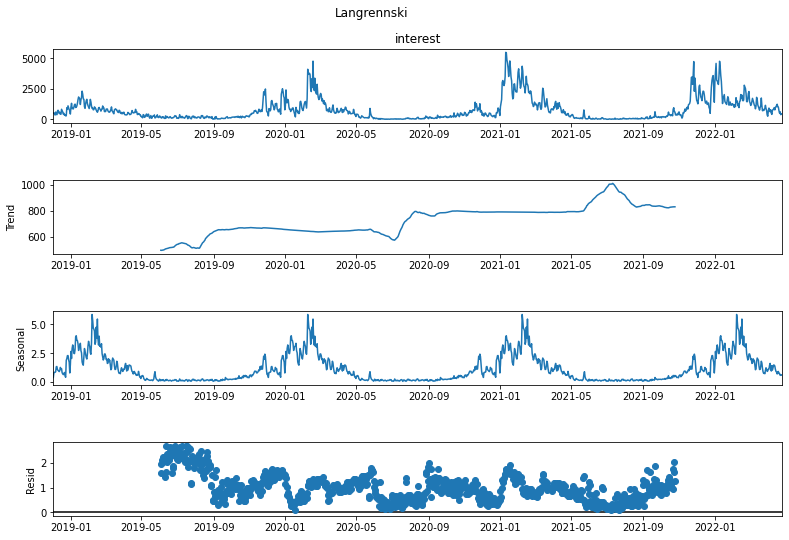

<Figure size 360x360 with 0 Axes>

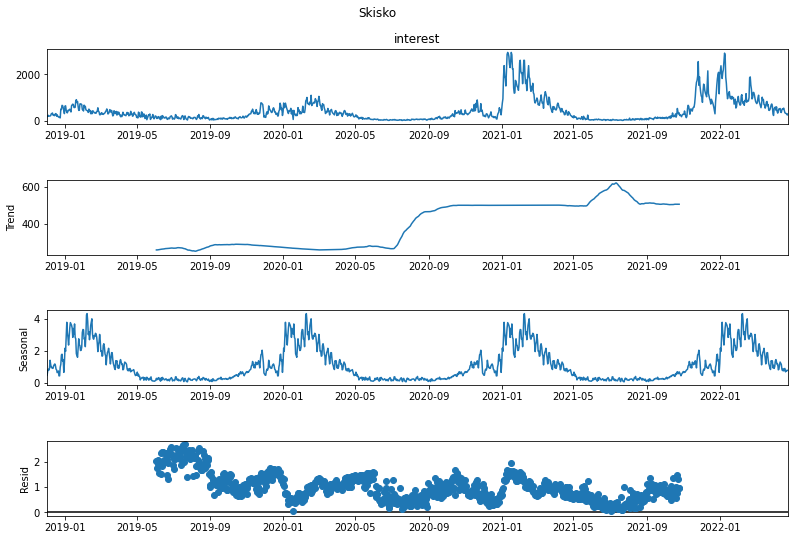

<Figure size 360x360 with 0 Axes>

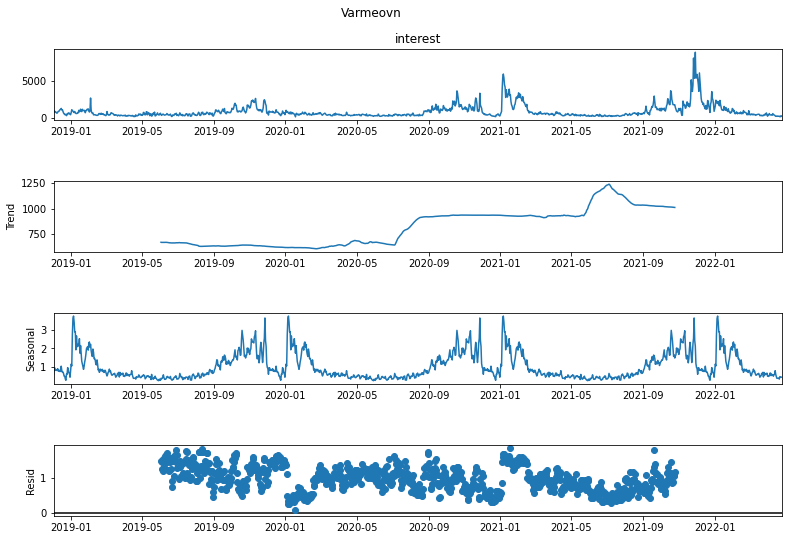

<Figure size 360x360 with 0 Axes>

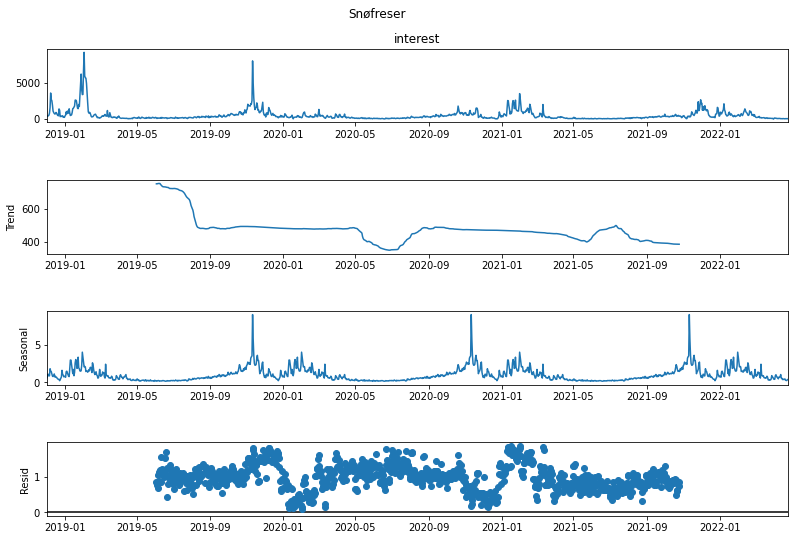

<Figure size 360x360 with 0 Axes>

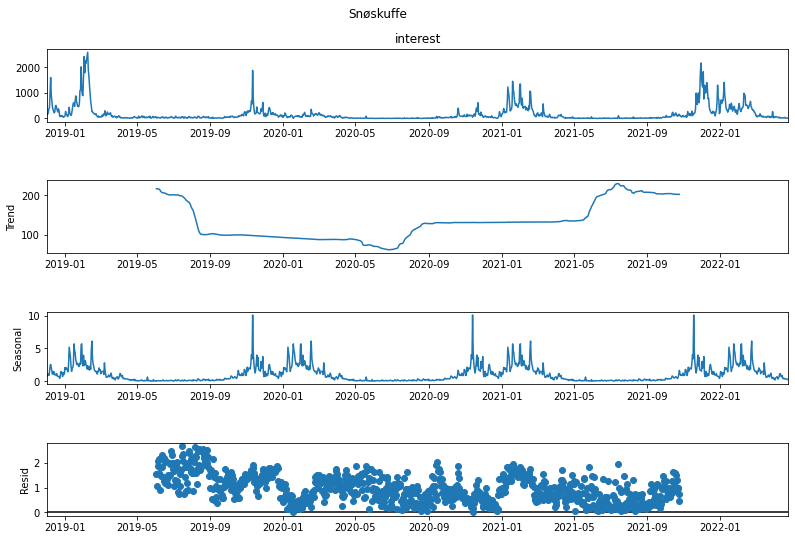

In [12]:
data_date_index = data.set_index("date", inplace=False)
df_results =  []
for cat in corr_categories + seasonal_categories :
  filtered = data_date_index[data_date_index["cat_id"] == cat]["interest"]
  cat_name = category_id_to_names_map[cat] if cat in category_id_to_names_map else cat
  decompose = seasonal_decompose(filtered, model="multiplicative", period=365)
  fig = plt.figure(figsize=(5, 5))
  fig = decompose.plot()
  fig.set_size_inches(12, 8)
  fig.suptitle(cat_name)
  fig.savefig(f"../MastersThesis/figs/code_generated/time-serie-{cat_name}_decomposed.png")

  df_result_dict = df_test(decompose.resid.dropna())
  df_results.append(df_result_dict)
df_results_dataframe = pd.DataFrame(df_results)


In [13]:
df_results_dataframe.head()
dataframe_to_latex_tabular(
    df_results_dataframe,
    caption="Dickey-Fuller test for residuals of seasonal decomposition",
    label="dickey_fuller_test_residuals",
)